Import Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Use Seaborn's context settings to make fonts larger.
import seaborn as sns
sns.set_context('talk')

generte csv for static sweep simulations
since the jobs no. are dynamic, changes to the header column are done separately

In [ ]:
raw_log_path = "/home/piyush/rp/work/logs3/"
cluster_specs = os.listdir(raw_log_path)
output_file = "static.csv"
append_to_file = False

if os.path.exists(output_file):
    append_to_file = True

with open(output_file, 'a') as output_file:
    #workaround, since can't store all simulation logs at the same time due to space issues
    if append_to_file:
        output_file.seek(0,2)
    else:
        output_file.write("cluster_spec,#v100,#p100,#k80,policy,seed,total_jobs,utilization,average_completion_time,total_completion_time\n")

    for cluster_spec in cluster_specs:
        worker_type = [worker.split("=")[0] for worker in cluster_spec.split(".")]
        worker_count = [worker.split("=")[1] for worker in cluster_spec.split(".")]
        print(worker_type)
        print(worker_count)
        

        policies = os.listdir(raw_log_path + cluster_spec + "/")
        for policy in policies:
            print(policy)
            

            seeds = os.listdir(raw_log_path + cluster_spec + "/" + policy)
            for seed in seeds:
                print(seed)
                
                for file in os.listdir(raw_log_path + cluster_spec + "/" + policy + "/" + seed):
                    num_jobs = file.split(".")[0].split("=")[1].rstrip()

                    output_file.write(cluster_spec)
                    output_file.write(",")
                    output_file.write(worker_count[0])
                    output_file.write(",")
                    output_file.write(worker_count[1])
                    output_file.write(",")
                    output_file.write(worker_count[2])
                    output_file.write(",")
                    output_file.write(policy)
                    output_file.write(",")
                    output_file.write(seed.split("=")[1])
                    output_file.write(",")
                    output_file.write(num_jobs)
                    output_file.write(",")
                    
                    with open(raw_log_path + cluster_spec + "/" + policy + "/" + seed + "/" + file, 'r') as log_file:
                        lines = log_file.readlines()
                        index = len(lines)

                        #cluster utilization
                        index = index - 2
                        cluster_utilization = lines[index].rstrip()
                        print(cluster_utilization)
                        output_file.write(cluster_utilization.split(":")[1])
                        output_file.write(",")

                        #Average job completion time
                        index = index - 2
                        avg_job_completion_time = lines[index].rstrip()
                        print(avg_job_completion_time)
                        output_file.write(avg_job_completion_time.split(":")[1])
                        output_file.write(",")

                        #total duration for all jobs
                        index -= int(num_jobs)
                        total_job_completion_time = lines[index - 2].rstrip()
                        print(total_job_completion_time)
                        output_file.write(total_job_completion_time.split(":")[1])
                        output_file.write(",")

                        index = index - 1

                        #job completion times
                        for i in range(int(num_jobs)):
                            index += 1
                            individual_job_completion_time = lines[index].rstrip()                            
                            output_file.write(individual_job_completion_time.split(":")[1])
                            if i != (int(num_jobs) - 1):
                                output_file.write(",")
                            print(individual_job_completion_time)
                        
                        output_file.write("\n")

Generate csv for continuous sweep simulations
since the jobs no. are dynamic, changes to the header column are done separately

In [ ]:
raw_log_path = "/home/piyush/rp/work/logs2/raw_logs/"
cluster_specs = os.listdir(raw_log_path)
output_file = "continuous.csv"
append_to_file = False

if os.path.exists(output_file):
    append_to_file = True

with open(output_file, 'a') as output_file:
    # workaround, since can't store all simulation logs at the same time due to space issues
    if append_to_file:
        output_file.seek(0,2)
    else:
        output_file.write("cluster_spec,#v100,#p100,#k80,policy,seed,lambda,utilization,average_completion_time,total_completion_time,window_duration\n")

    for cluster_spec in cluster_specs:
        worker_type = [worker.split("=")[0] for worker in cluster_spec.split(".")]
        worker_count = [worker.split("=")[1] for worker in cluster_spec.split(".")]
        print(worker_type)
        print(worker_count)
        

        policies = os.listdir(raw_log_path + cluster_spec + "/")
        for policy in policies:
            print(policy)
            

            seeds = os.listdir(raw_log_path + cluster_spec + "/" + policy)
            for seed in seeds:
                print(seed)
                
                for file in os.listdir(raw_log_path + cluster_spec + "/" + policy + "/" + seed):
                    lam = file.split(".")[0].split("=")[1].rstrip()

                    output_file.write(cluster_spec)
                    output_file.write(",")
                    output_file.write(worker_count[0])
                    output_file.write(",")
                    output_file.write(worker_count[1])
                    output_file.write(",")
                    output_file.write(worker_count[2])
                    output_file.write(",")
                    output_file.write(policy)
                    output_file.write(",")
                    output_file.write(seed.split("=")[1])
                    output_file.write(",")
                    output_file.write(lam)
                    output_file.write(",")
                    
                    with open(raw_log_path + cluster_spec + "/" + policy + "/" + seed + "/" + file, 'r') as log_file:
                        lines = log_file.readlines()
                        index = len(lines)

                        #cluster utilization
                        index = index - 1
                        cluster_utilization = lines[index].rstrip()
                        print(cluster_utilization)
                        output_file.write(cluster_utilization.split(":")[1])
                        output_file.write(",")

                        #Average job completion time
                        index = index - 2
                        avg_job_completion_time = lines[index].rstrip()
                        print(avg_job_completion_time)
                        output_file.write(avg_job_completion_time.split(":")[1])
                        output_file.write(",")

                        #total duration for all jobs
                        index -= 501
                        total_job_completion_time = lines[index - 2].rstrip()
                        print(total_job_completion_time)
                        output_file.write(total_job_completion_time.split(":")[1])
                        output_file.write(",")

                        window_duration = lines[index - 3].rstrip()
                        output_file.write(window_duration.split(":")[1])
                        output_file.write(",")
                        print(window_duration)

                        #job completion times
                        for i in range(int(500)):
                            index += 1
                            individual_job_completion_time = lines[index].rstrip()                            
                            output_file.write(individual_job_completion_time.split(":")[1])
                            output_file.write(",")
                            print(individual_job_completion_time)
                        
                        output_file.write("\n")

create a pandas data frame for continuous trace data

In [ ]:
csv_path = '/home/piyush/rp/work/analysis/continuous_updated.csv'
df_continuous = pd.read_csv(csv_path)

how does the cluster utilization vary with lambda 

In [ ]:
for cluster_spec in df_continuous["cluster_spec"].unique():
    for policy in df_continuous["policy"].unique():
        for seed in df_continuous["seed"].unique():
            result = df_continuous.query(f'cluster_spec == "{cluster_spec}" & policy == "{policy}" & seed == {seed}')
            result = result.sort_values("lambda", ascending=False)

            fig, ax = plt.subplots(figsize=(30,10))
            bar_width = 0.2

            x = np.arange(len(result["lambda"].unique()))
            y = [float(r) for r in result["utilization"]]

            ax.bar(x, y, width=bar_width,label=result["lambda"].unique())
            ax.set_xticks(x)
            ax.set_xticklabels(result["lambda"].unique())
            ax.legend(loc ="upper right")

            ax.set_xlabel('Lambda', labelpad=15)
            ax.set_ylabel('Cluster Utilization', labelpad=15)
            ax.set_title(f'Cluster Specification : {cluster_spec}, Policy : {policy}, Seed : {seed}', pad=15)
            
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.spines['left'].set_visible(False)
            ax.spines['bottom'].set_color('#DDDDDD')
            ax.tick_params(bottom=False, left=False)
            ax.set_axisbelow(True)
            
            ax.yaxis.grid(True, color='#EEEEEE')
            ax.xaxis.grid(False)

            # For each bar in the chart, add a text label.
            for bar in ax.patches:
            # The text annotation for each bar should be its height.
                bar_value = bar.get_height()
                # Format the text with commas to separate thousands. You can do
                # any type of formatting here though.
                text = f'{bar_value:,}'
                # This will give the middle of each bar on the x-axis.
                text_x = bar.get_x() + bar.get_width() / 2
                # get_y() is where the bar starts so we add the height to it.
                text_y = bar.get_y() + bar_value
                # If we want the text to be the same color as the bar, we can
                # get the color like so:
                bar_color = bar.get_facecolor()
                # If you want a consistent color, you can just set it as a constant, e.g. #222222
                ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,
                        size=12)

corrected csv files with removed incomplete experiments
how does utilization vary with lambda values

In [2]:
csv_path = '/home/piyush/rp/work/analysis/continuous_updated2.csv'
df_continuous2 = pd.read_csv(csv_path)

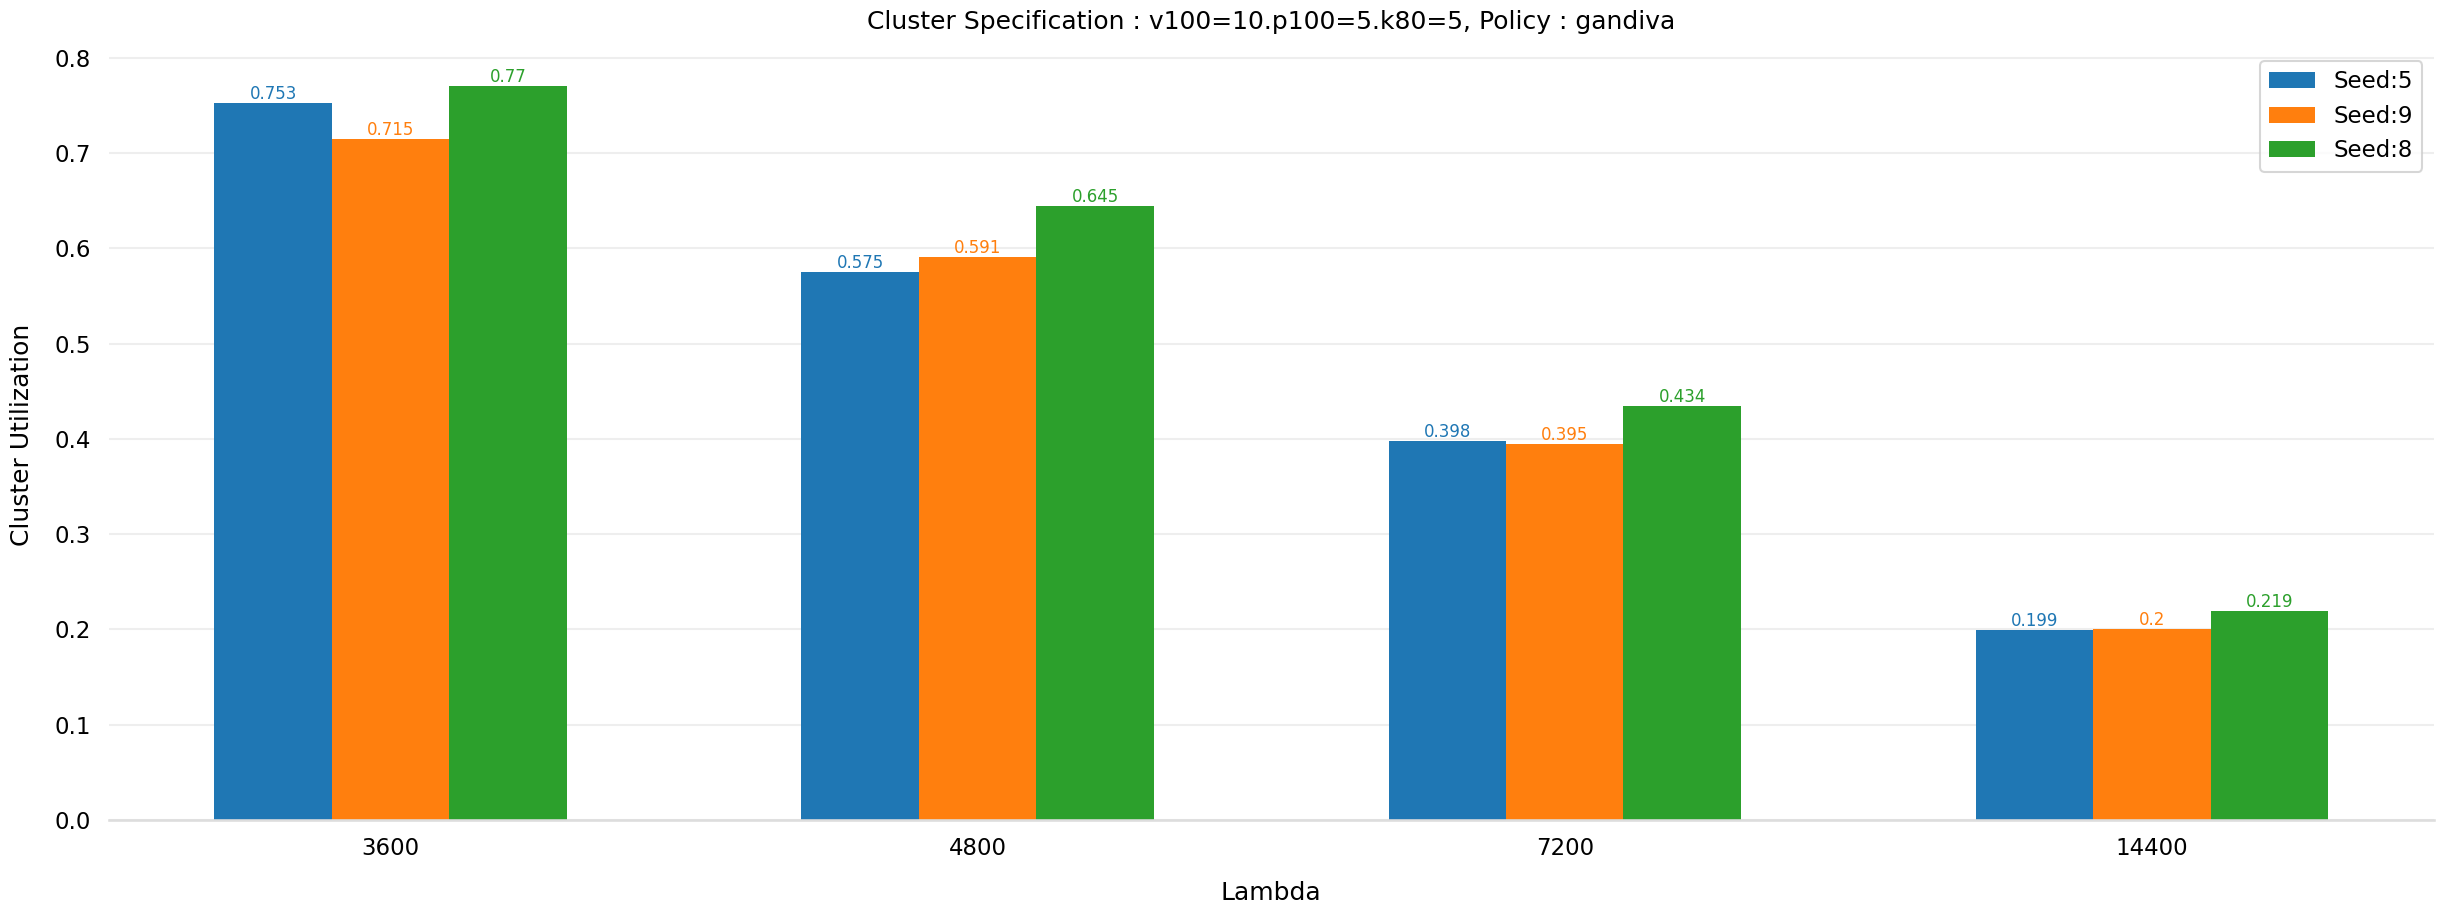

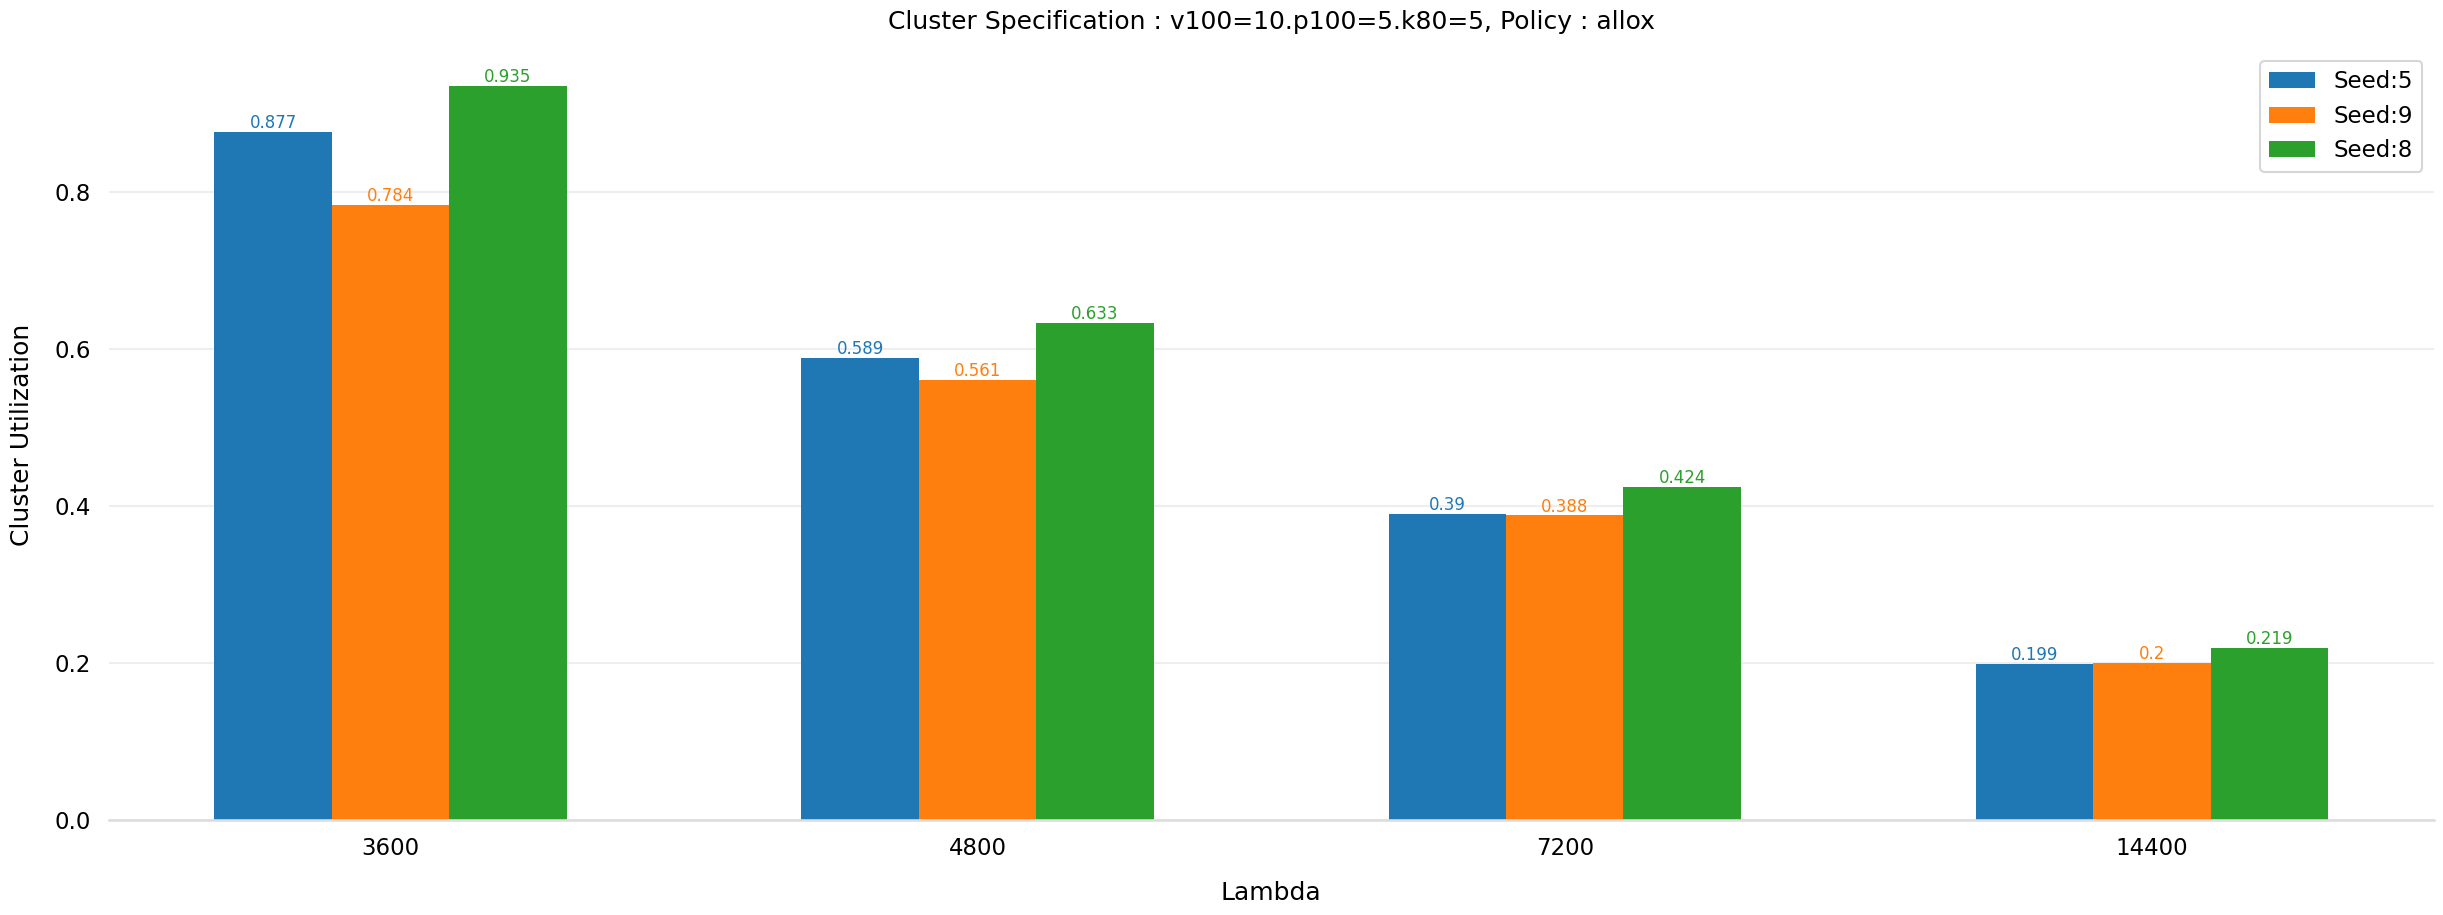

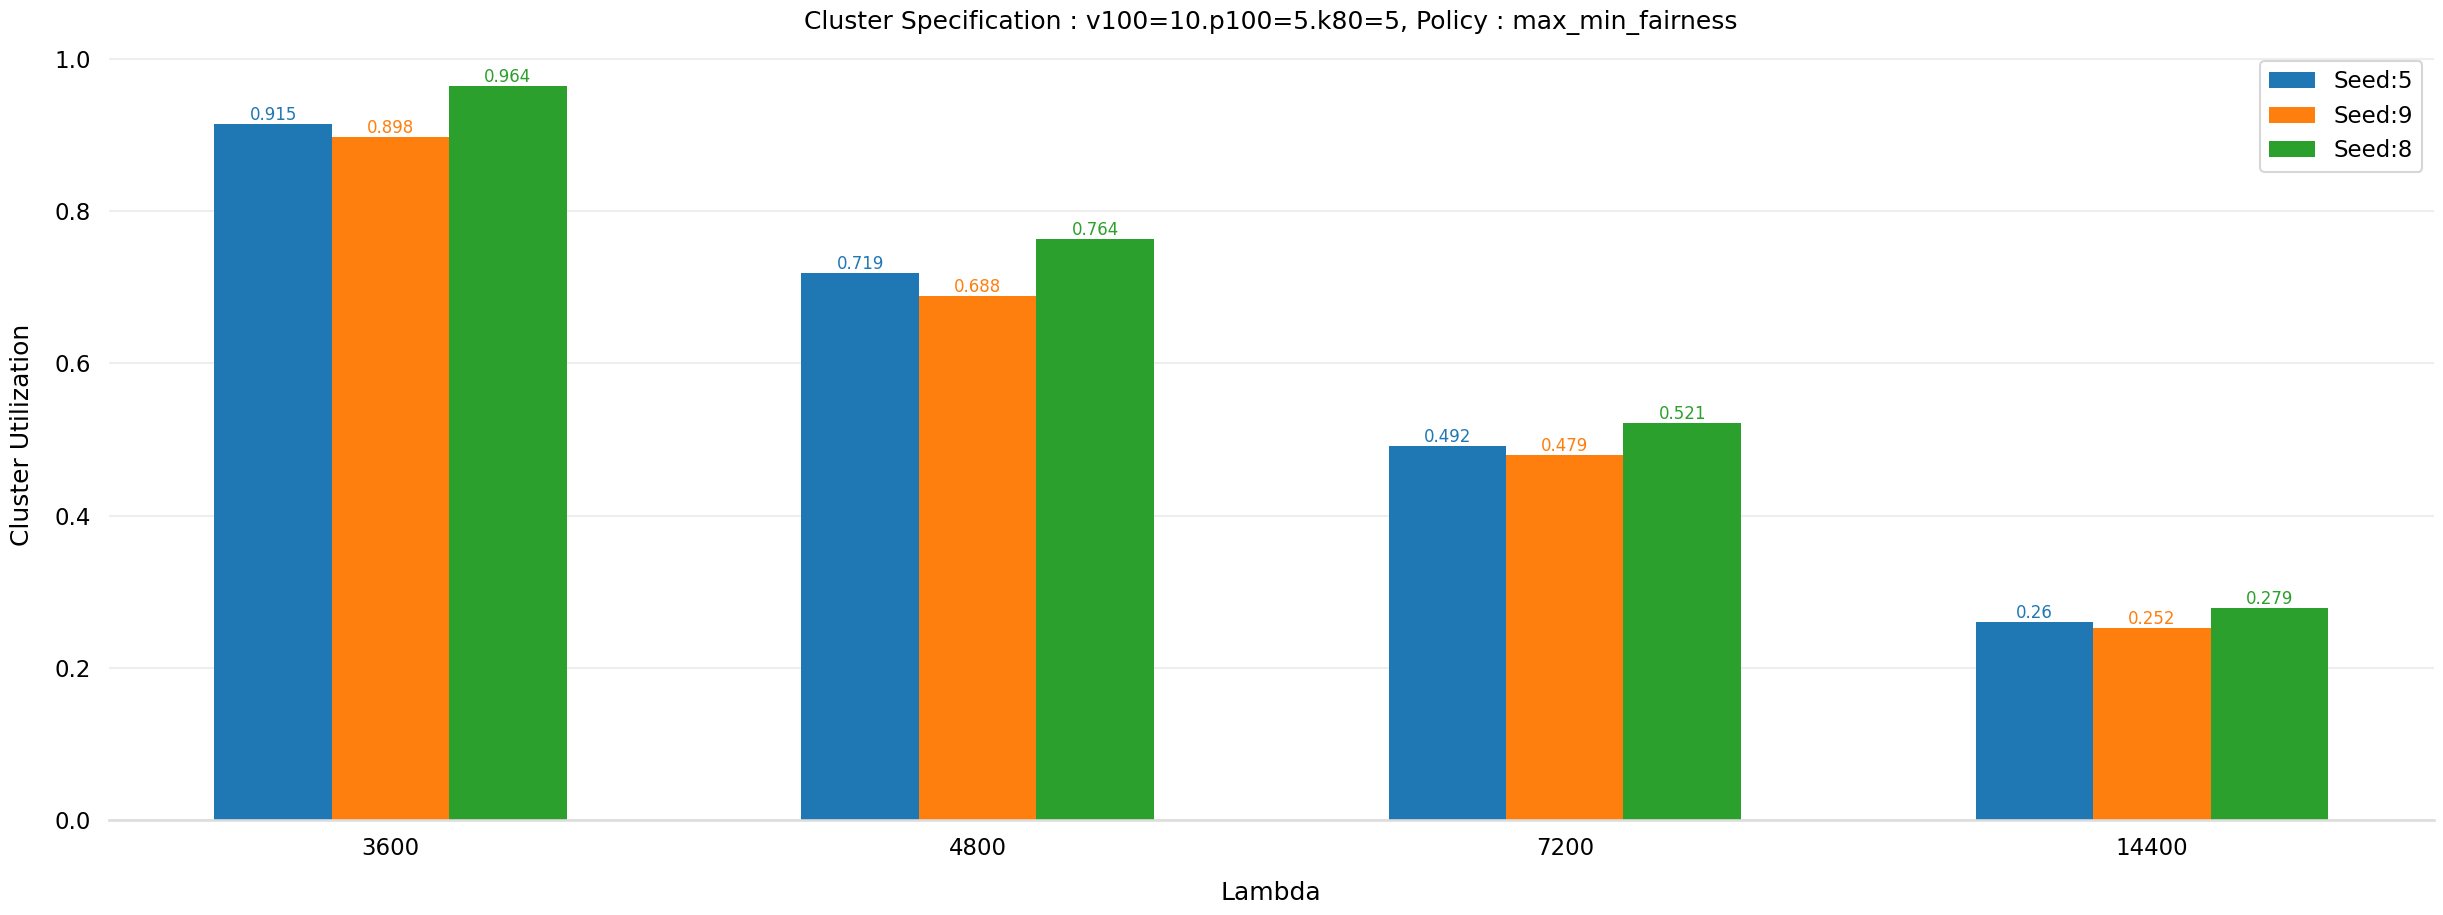

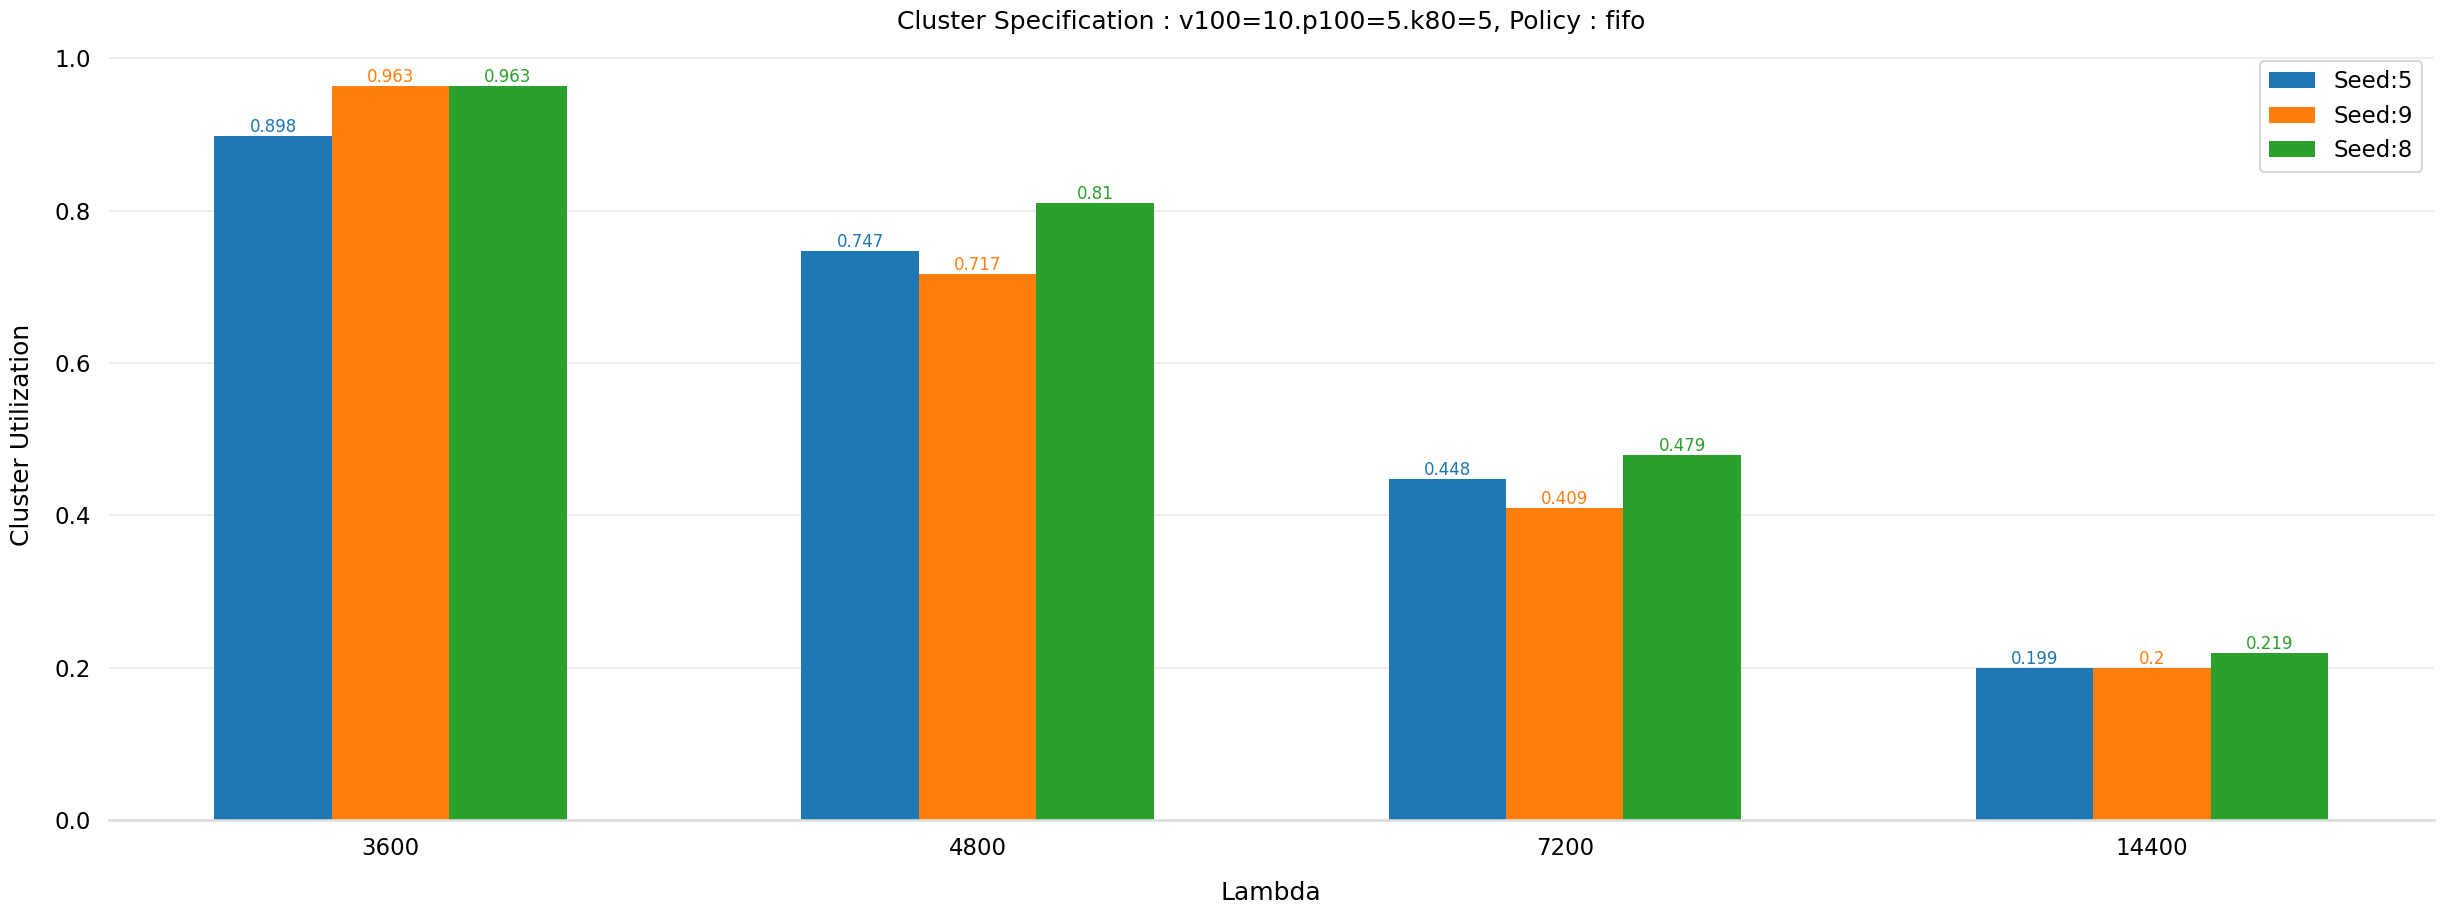

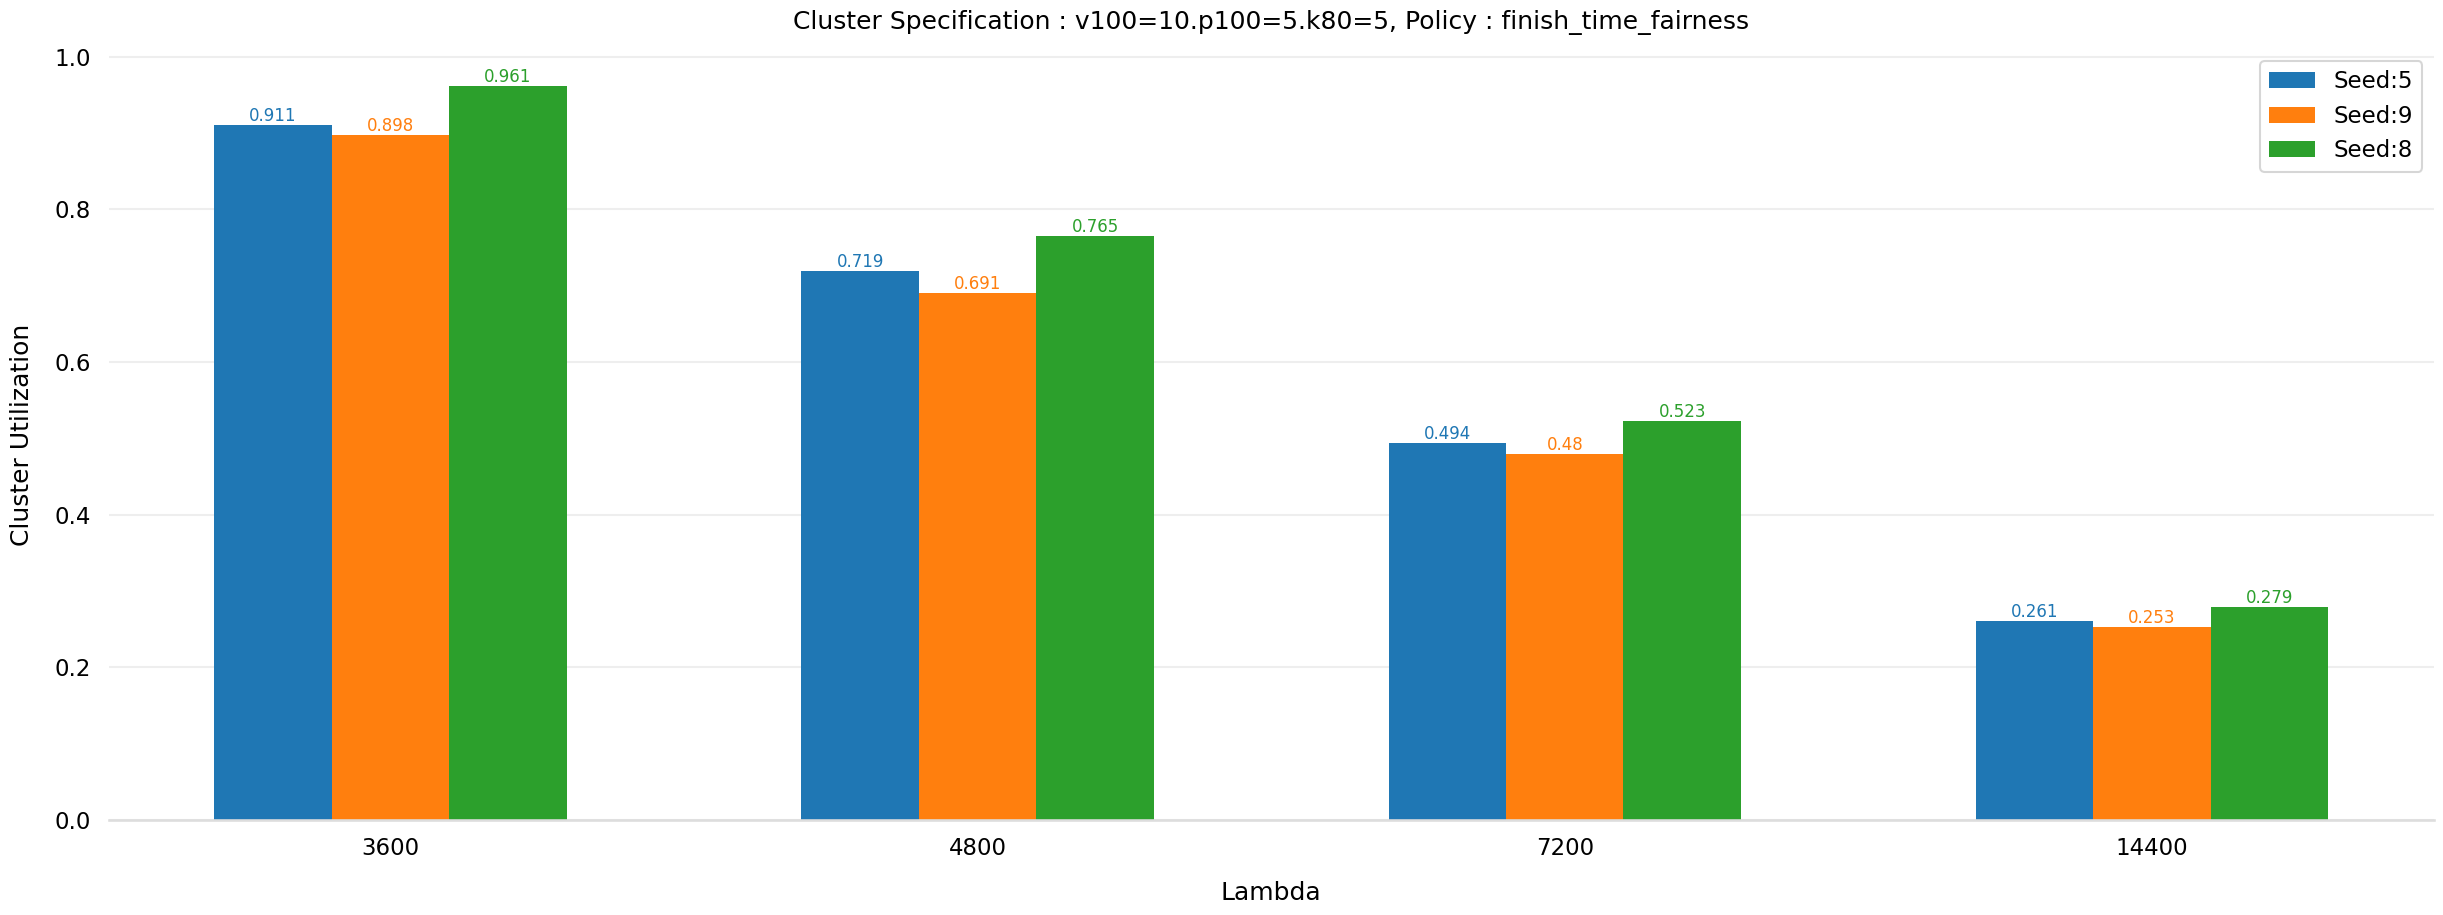

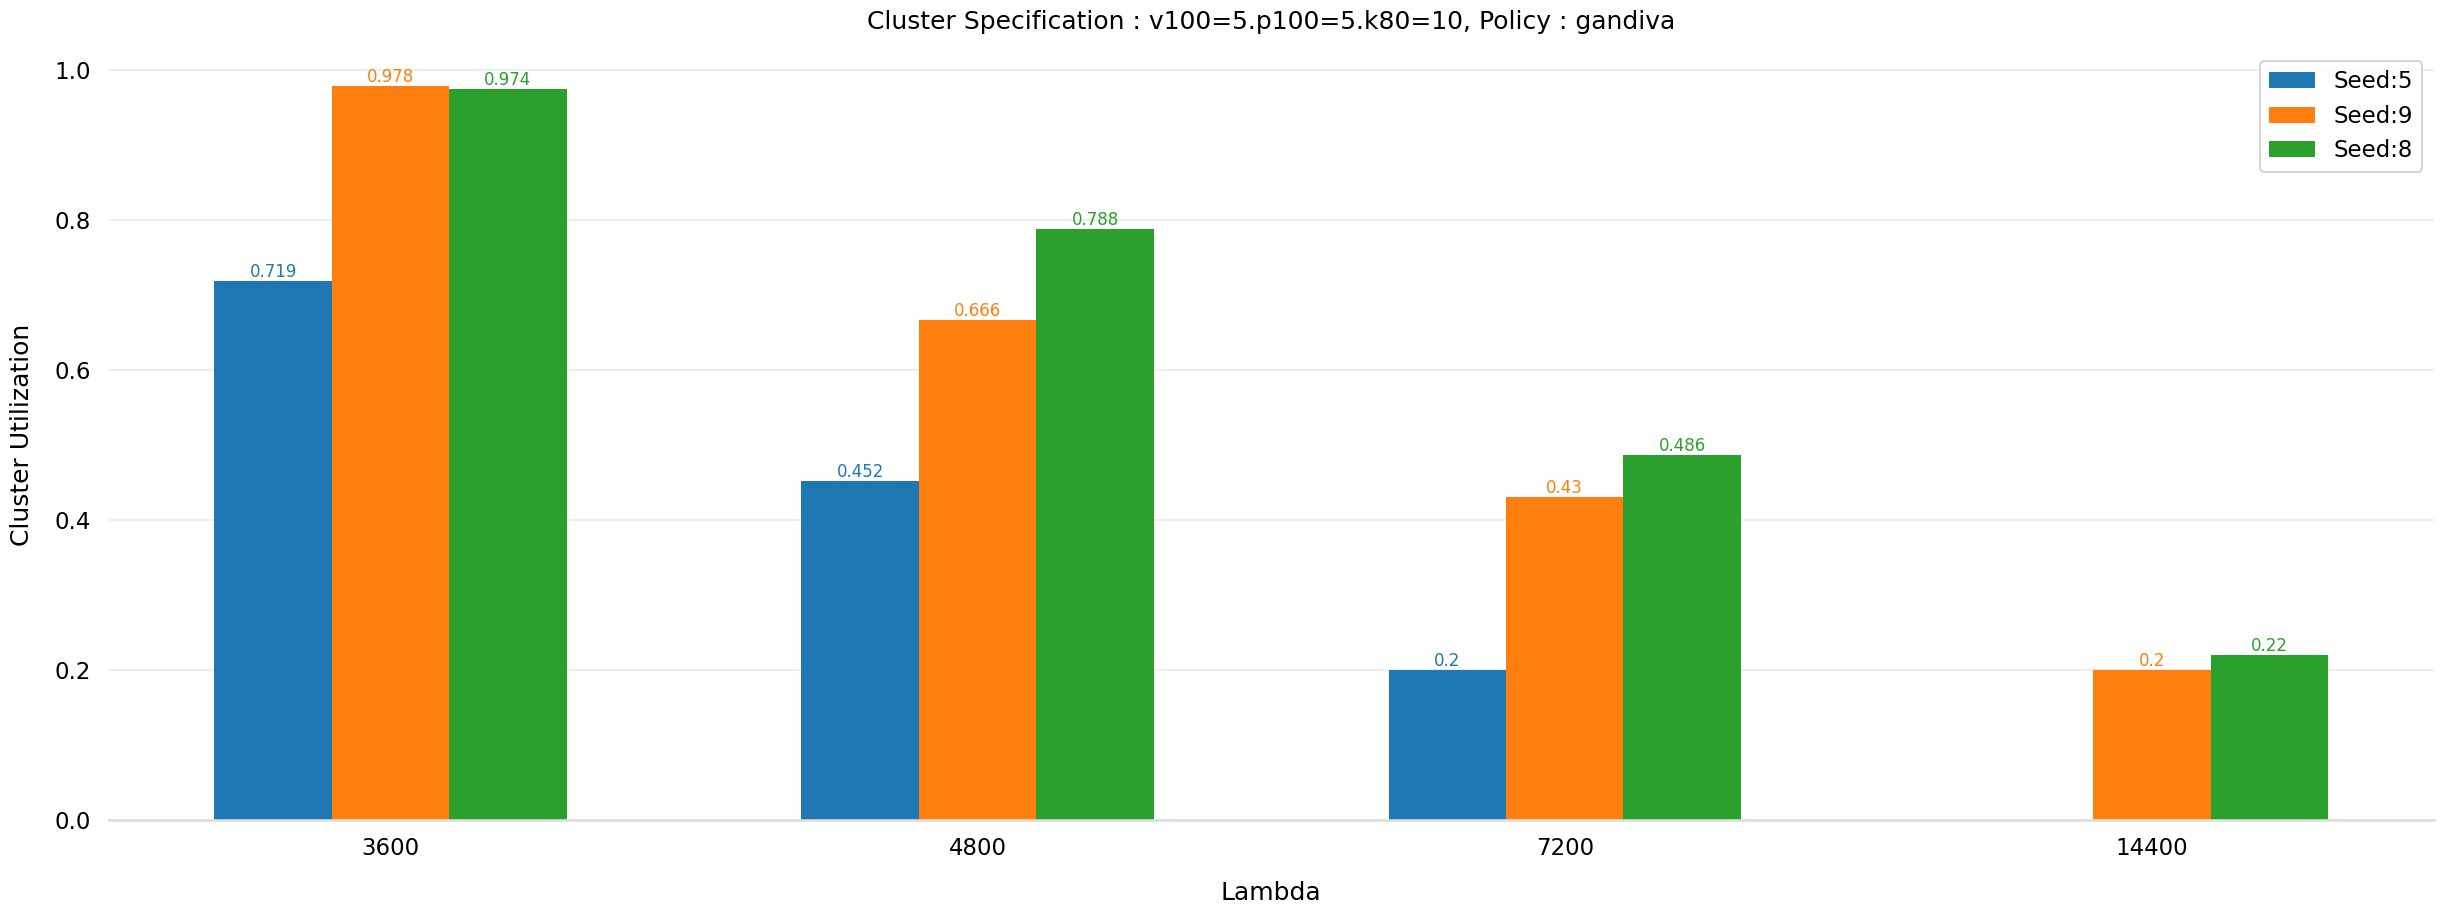

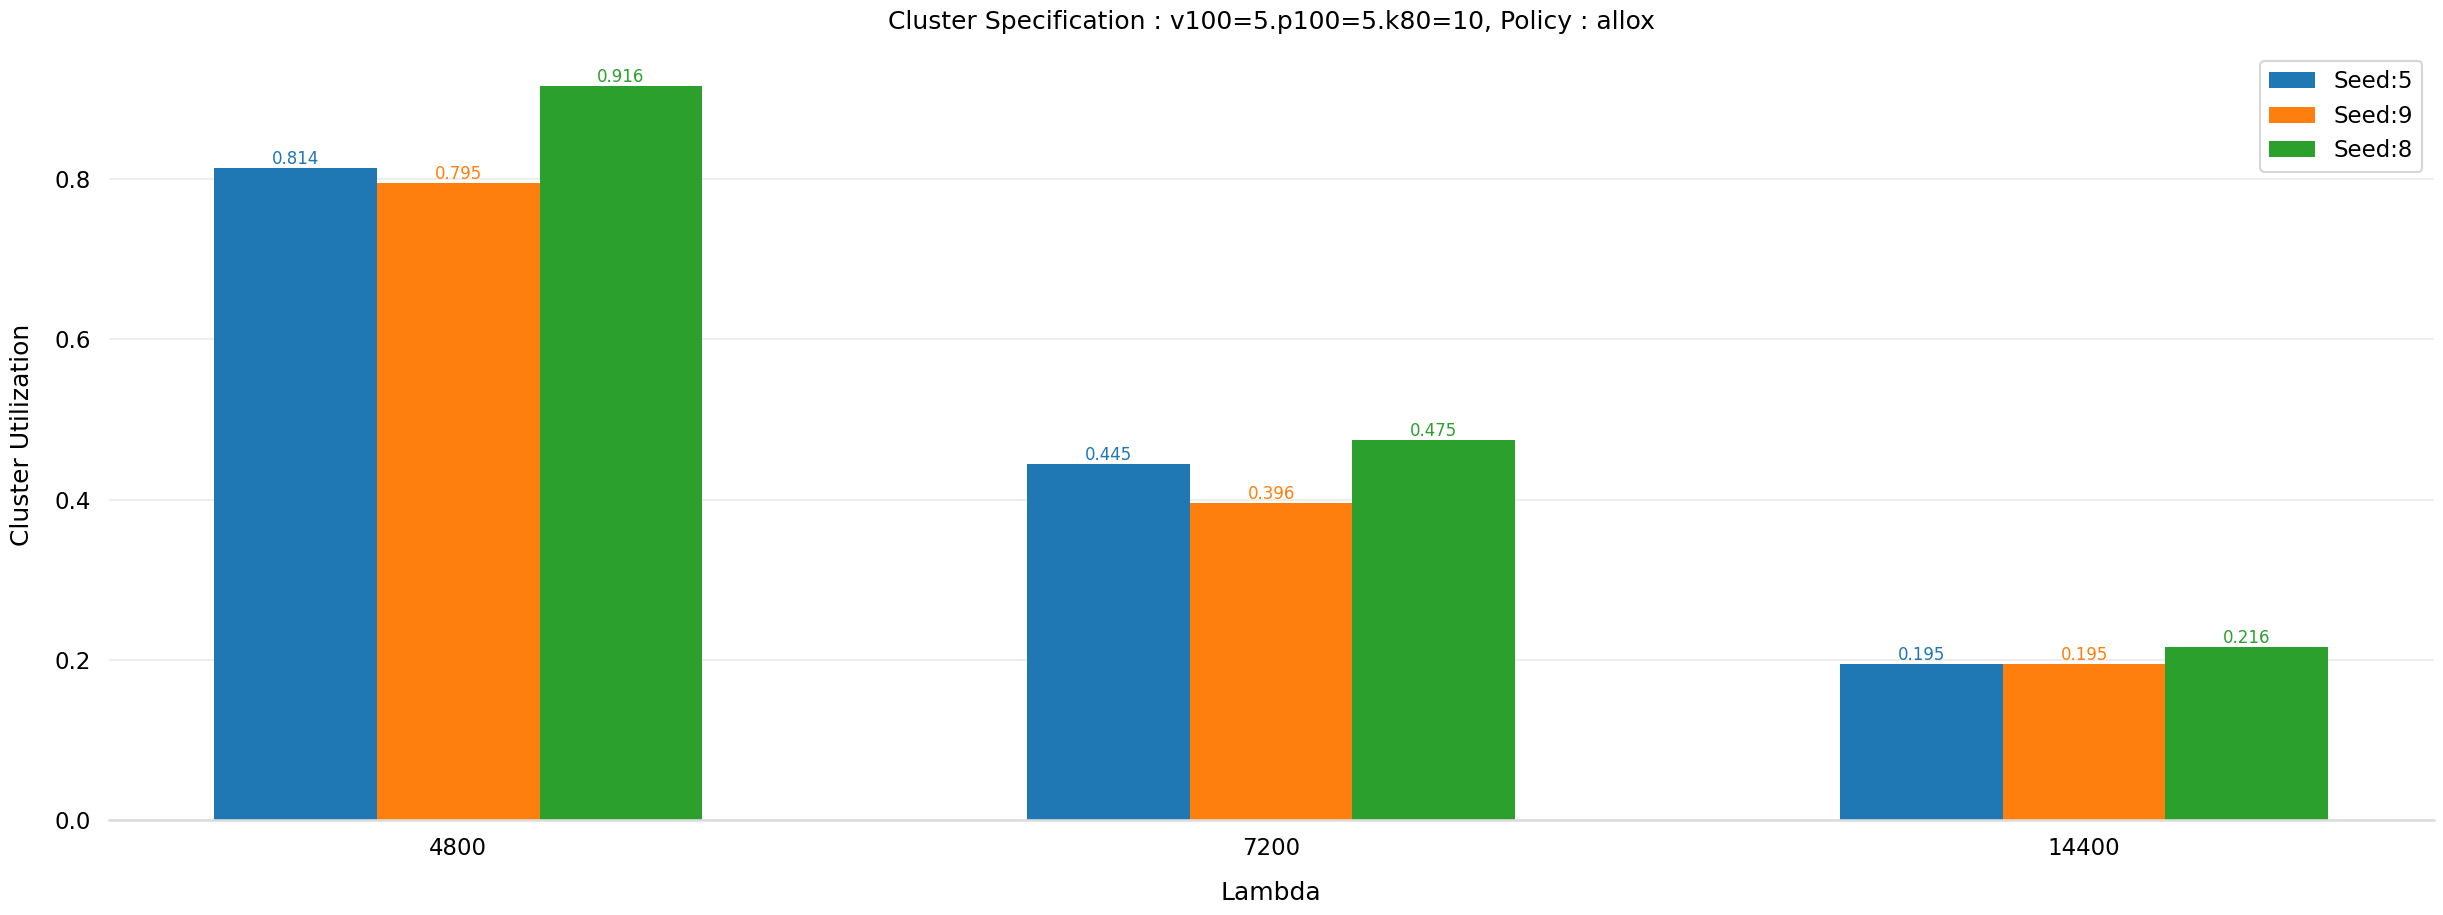

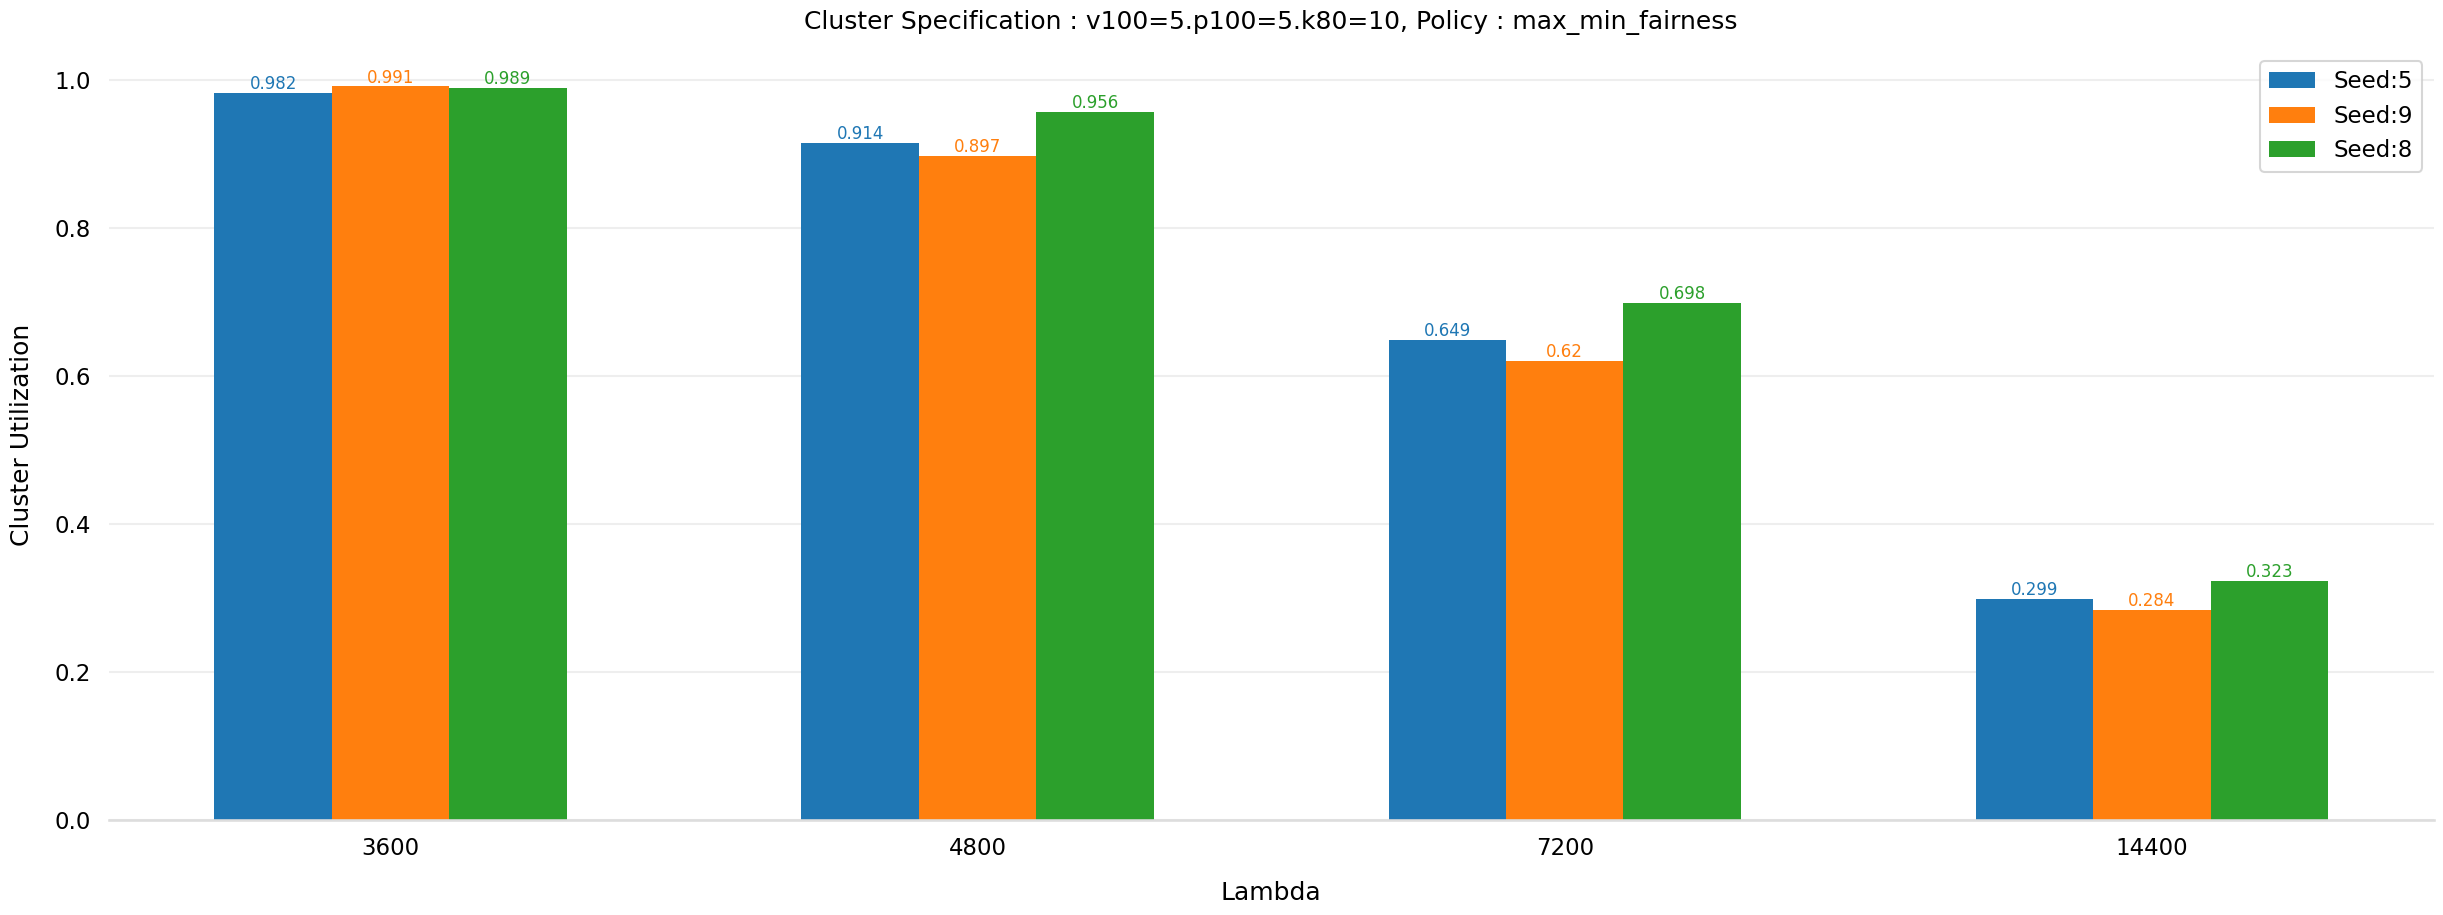

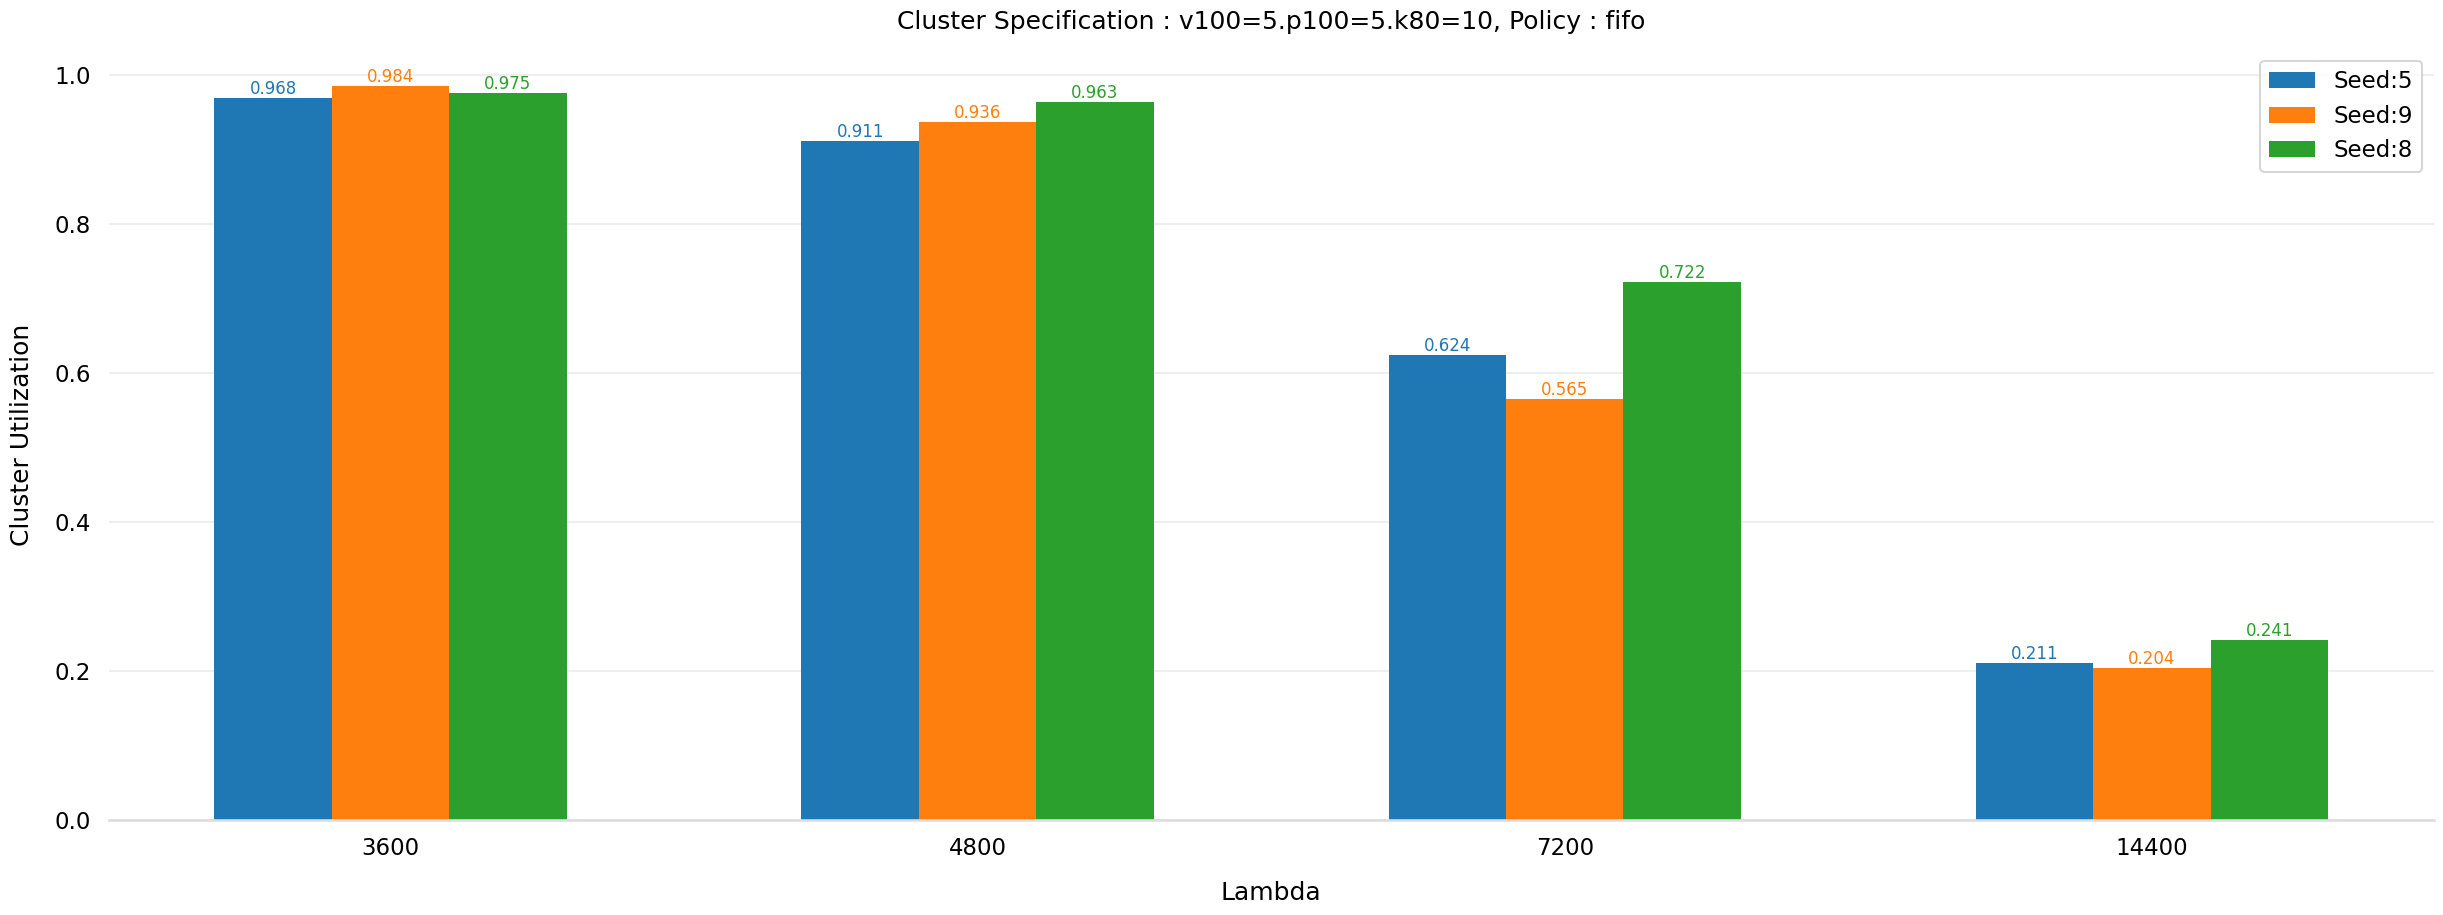

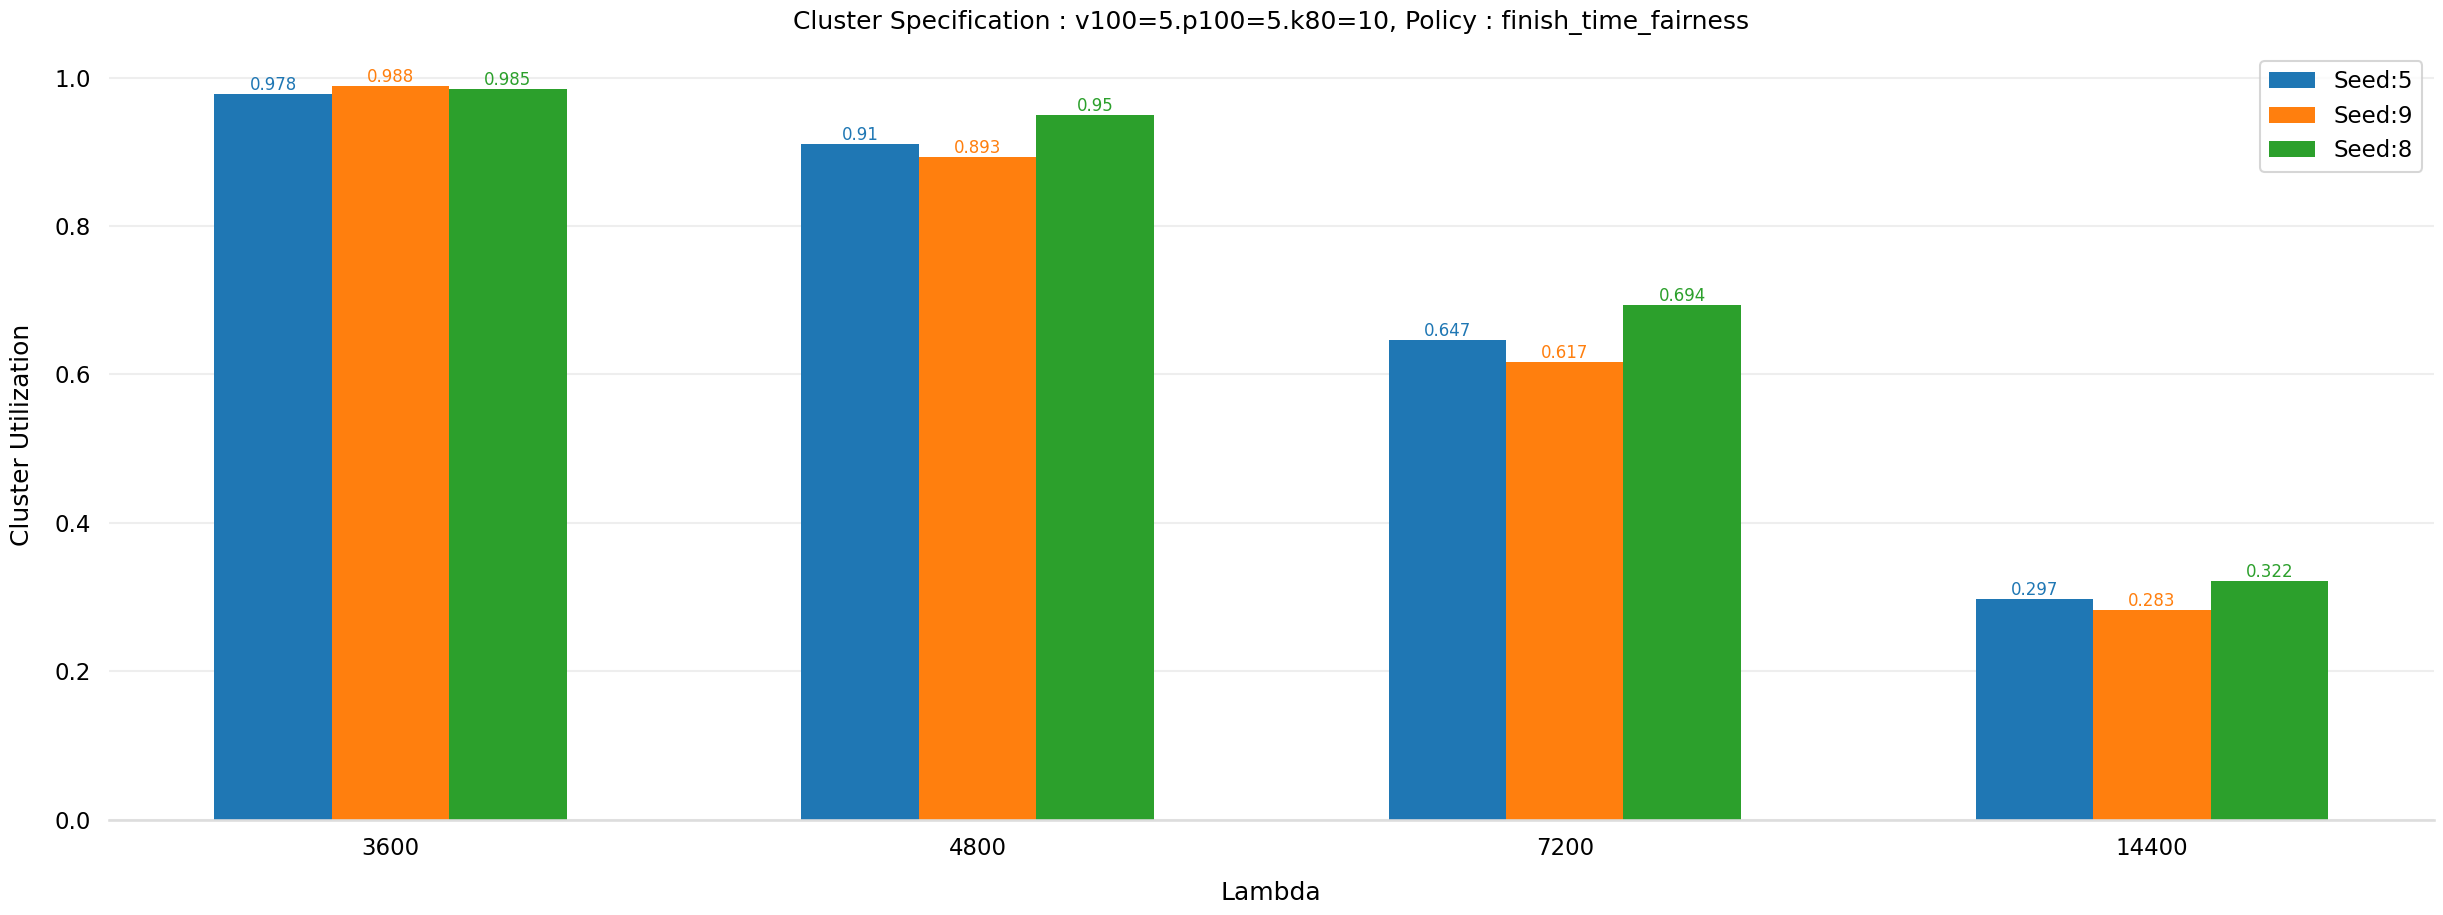

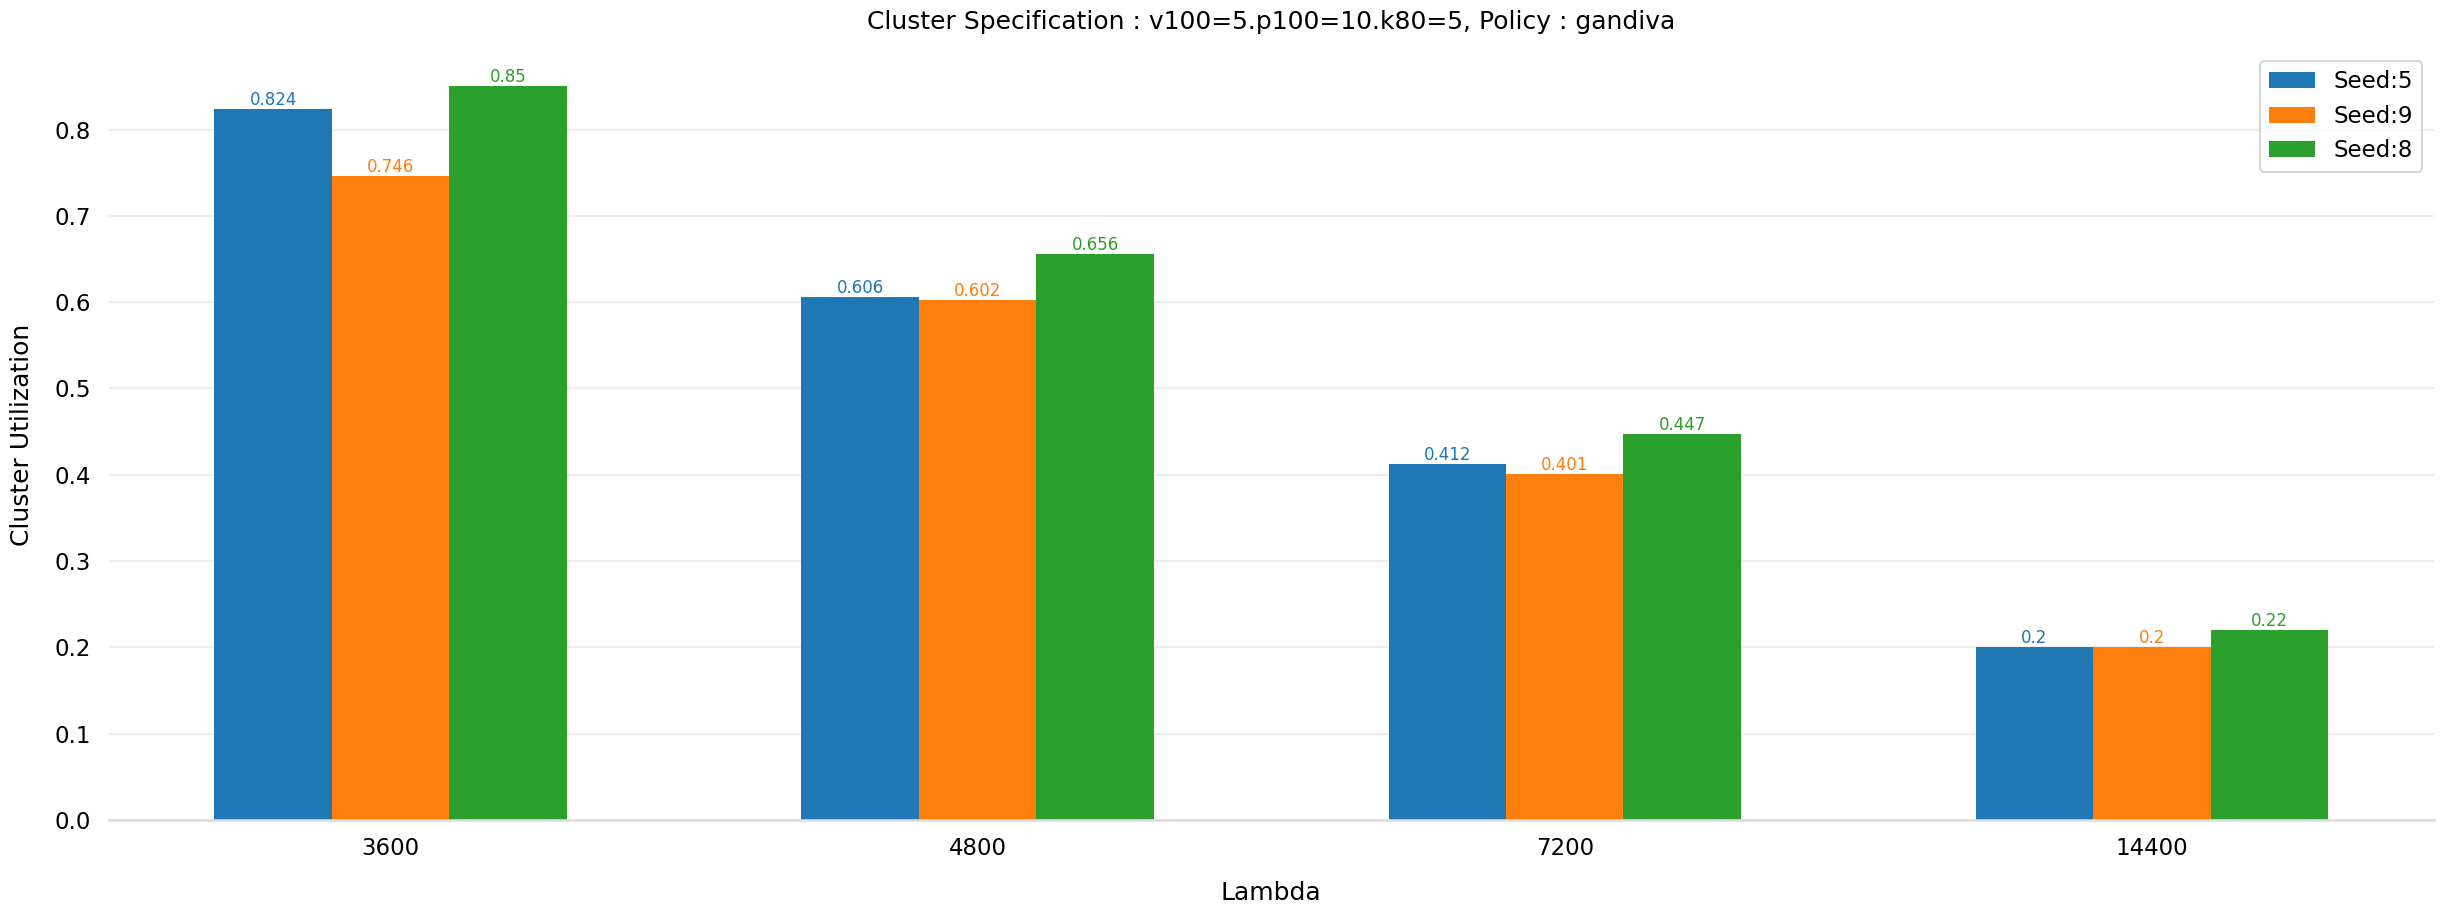

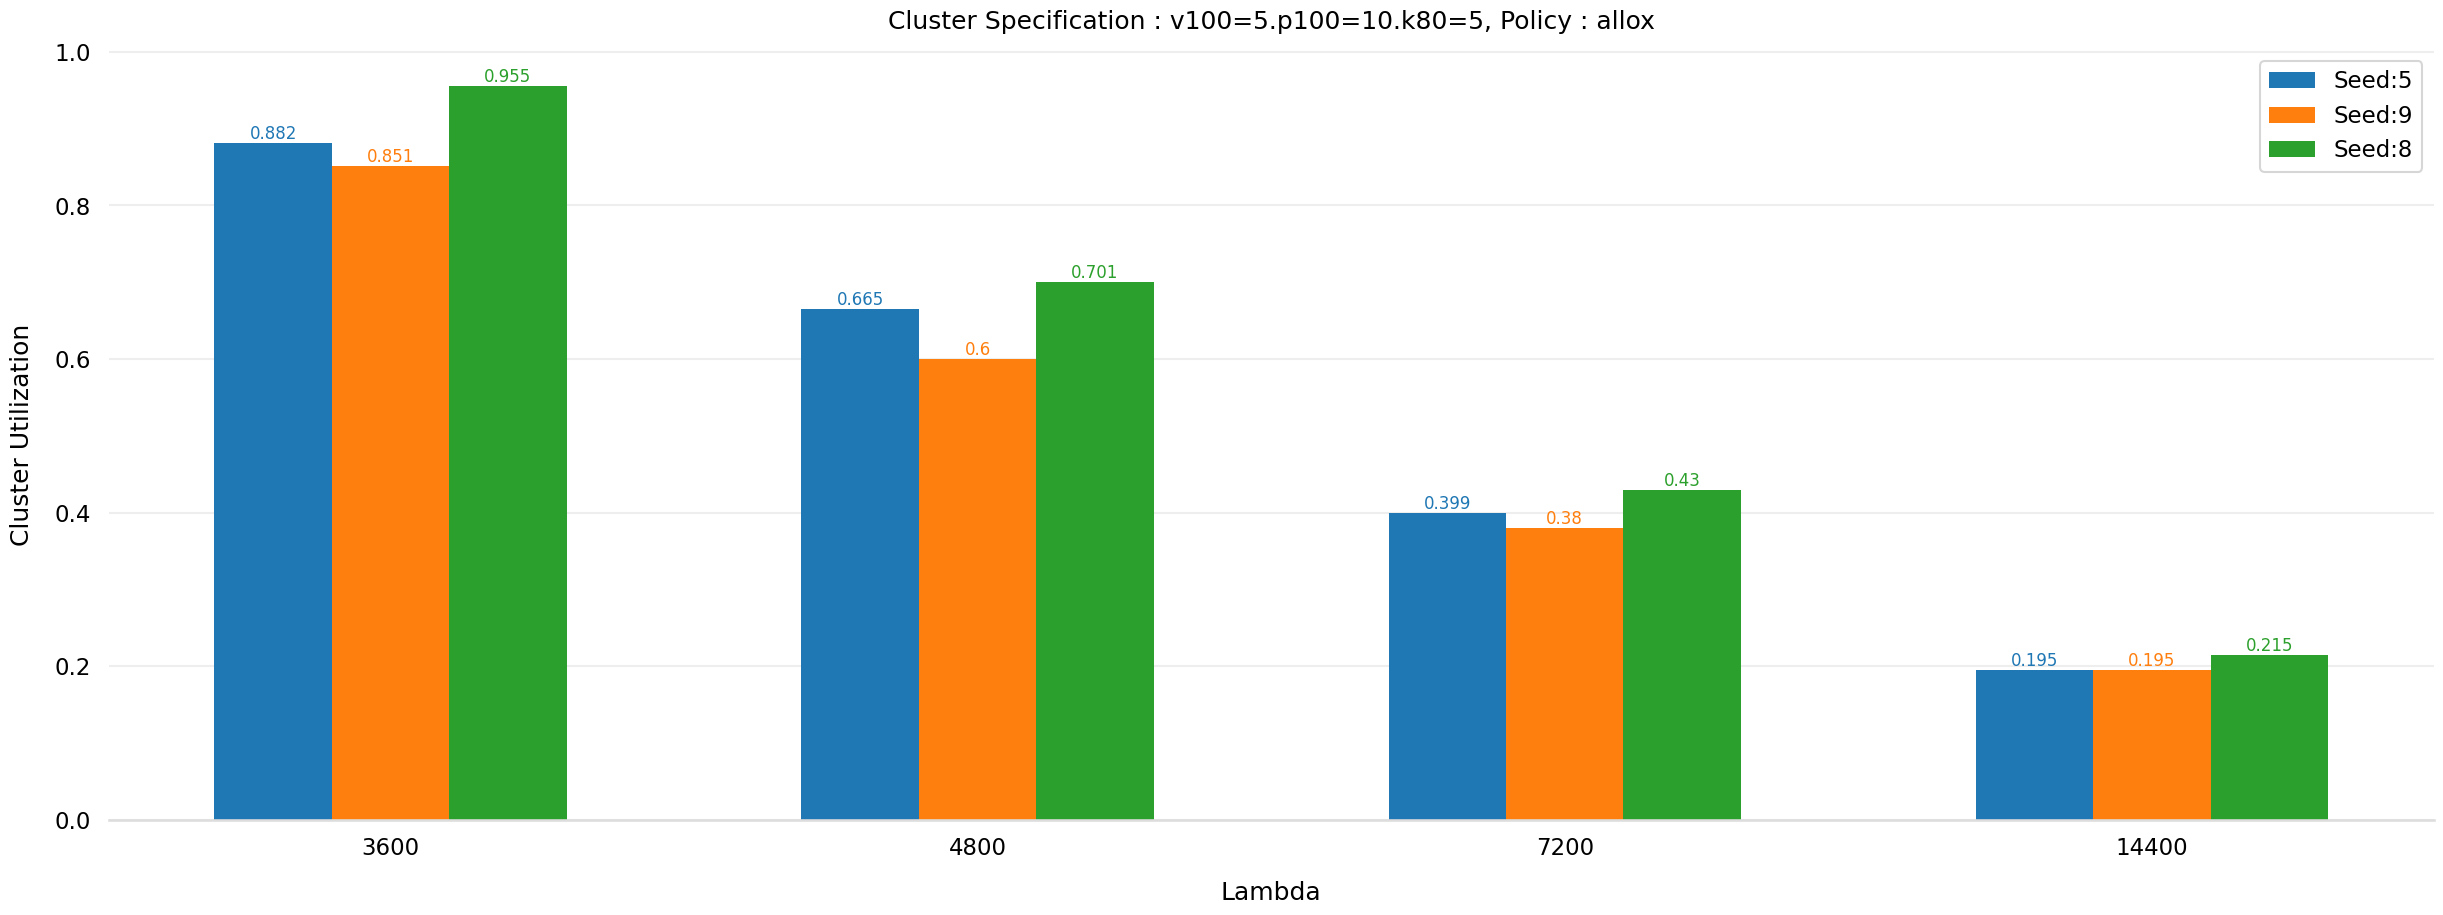

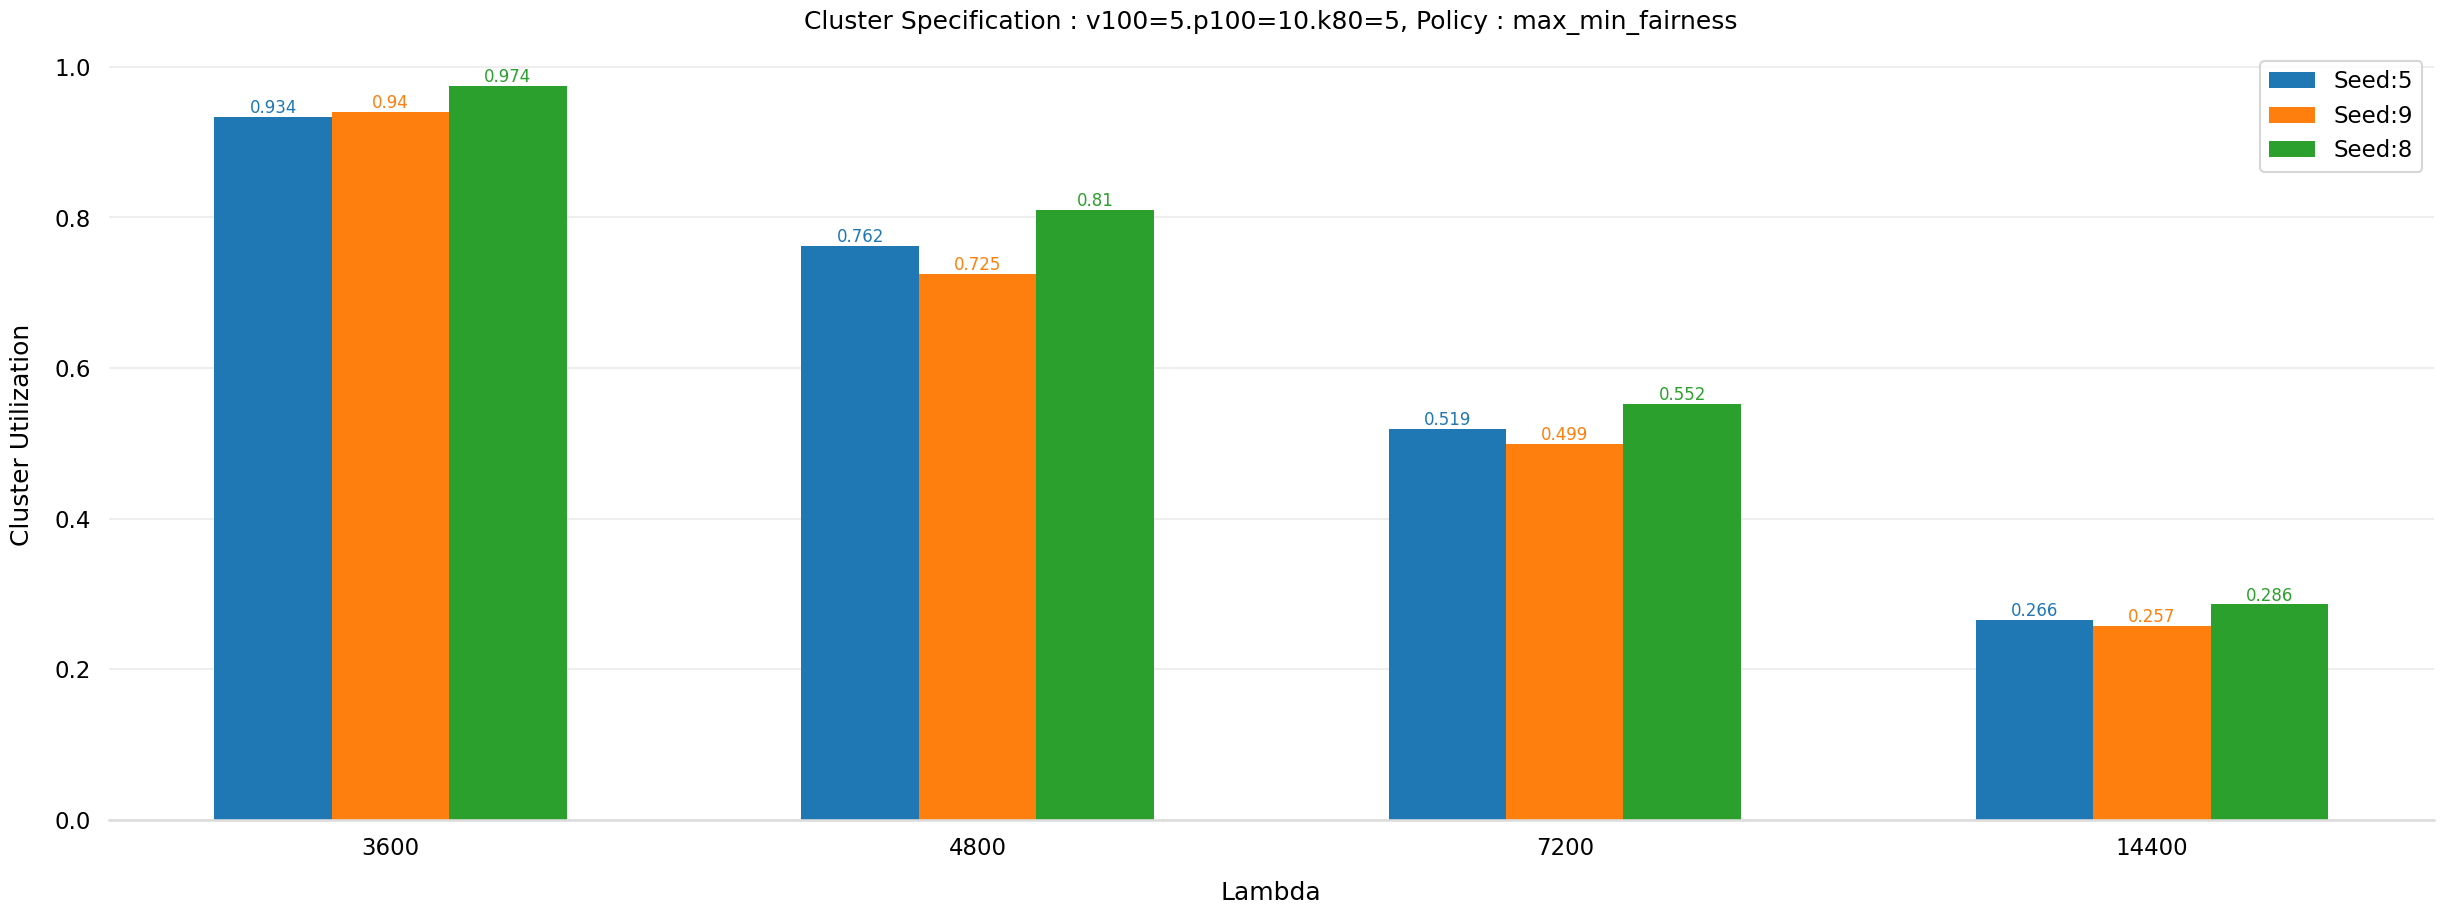

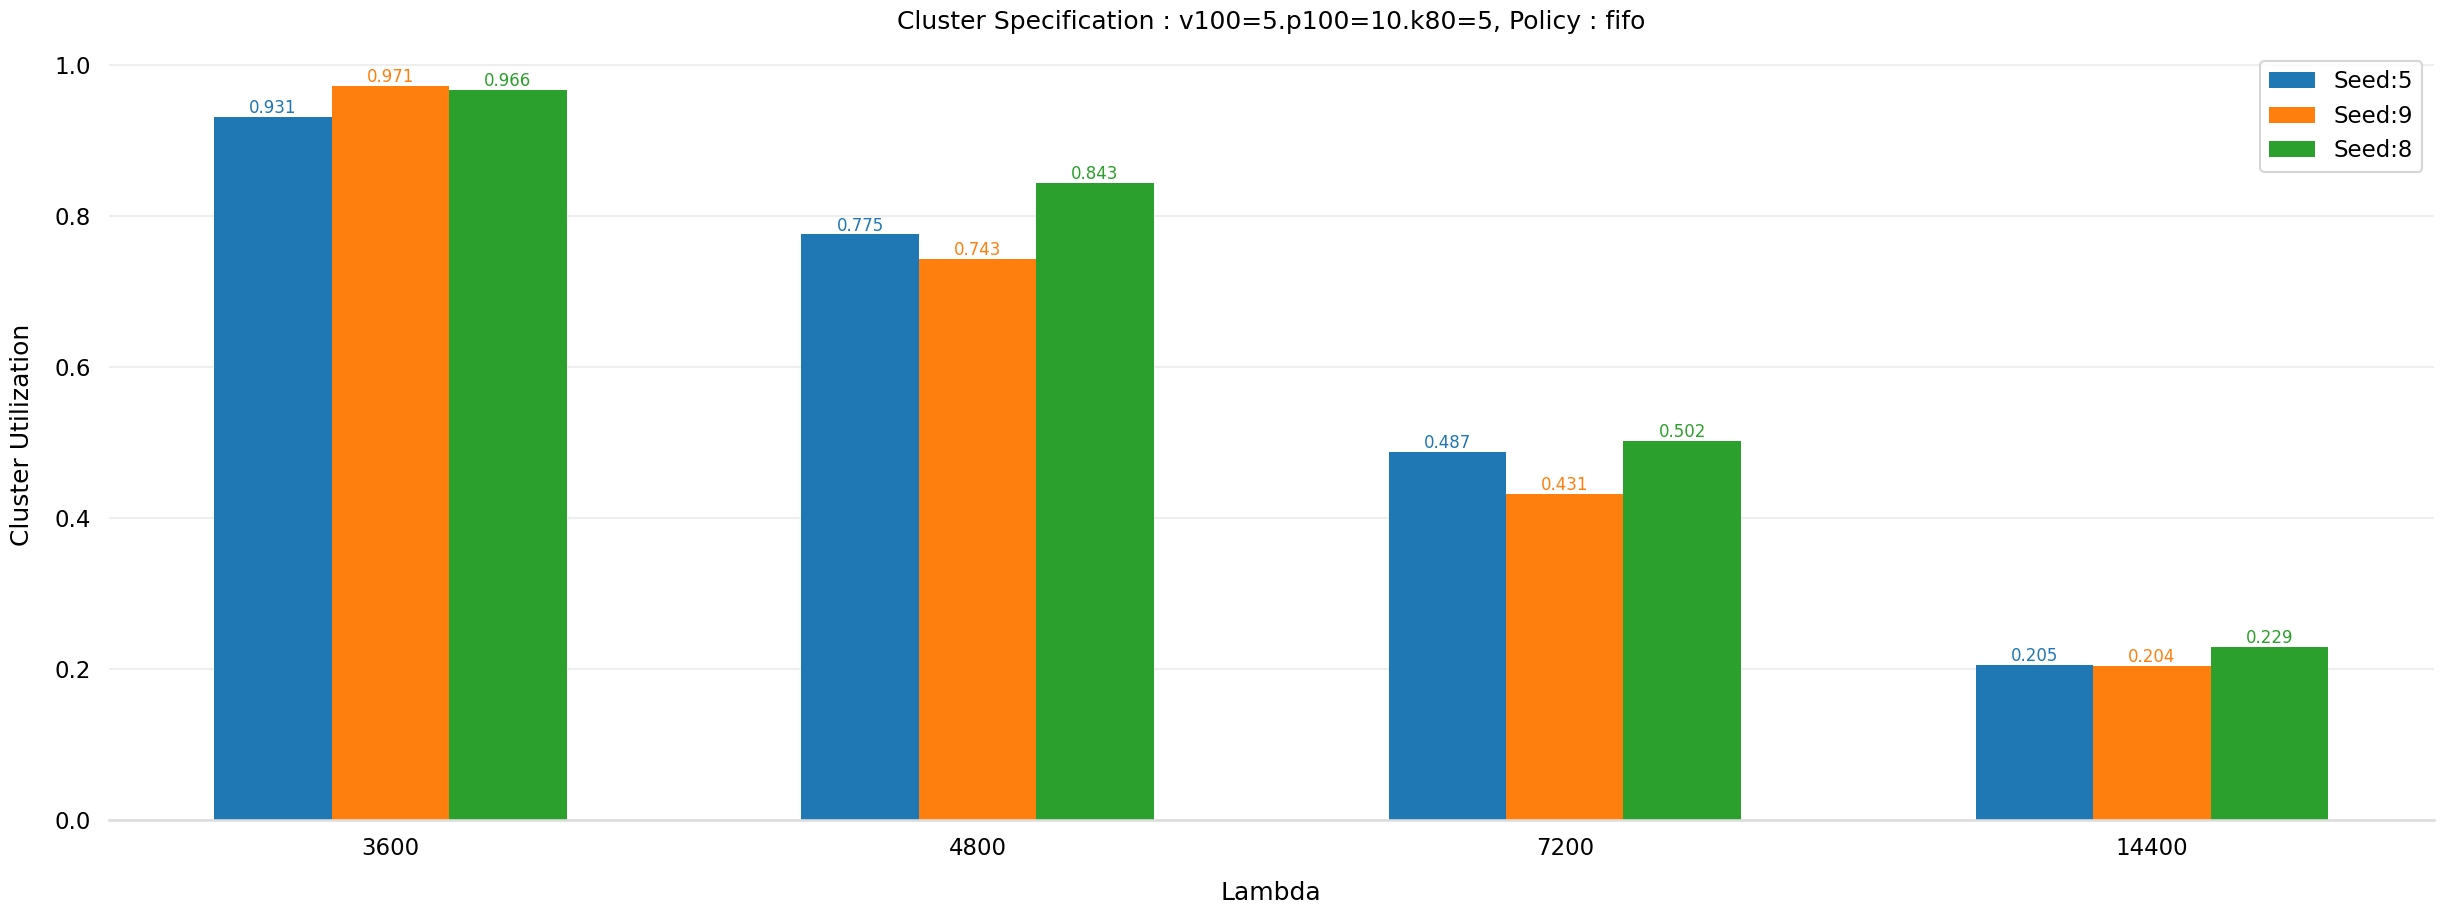

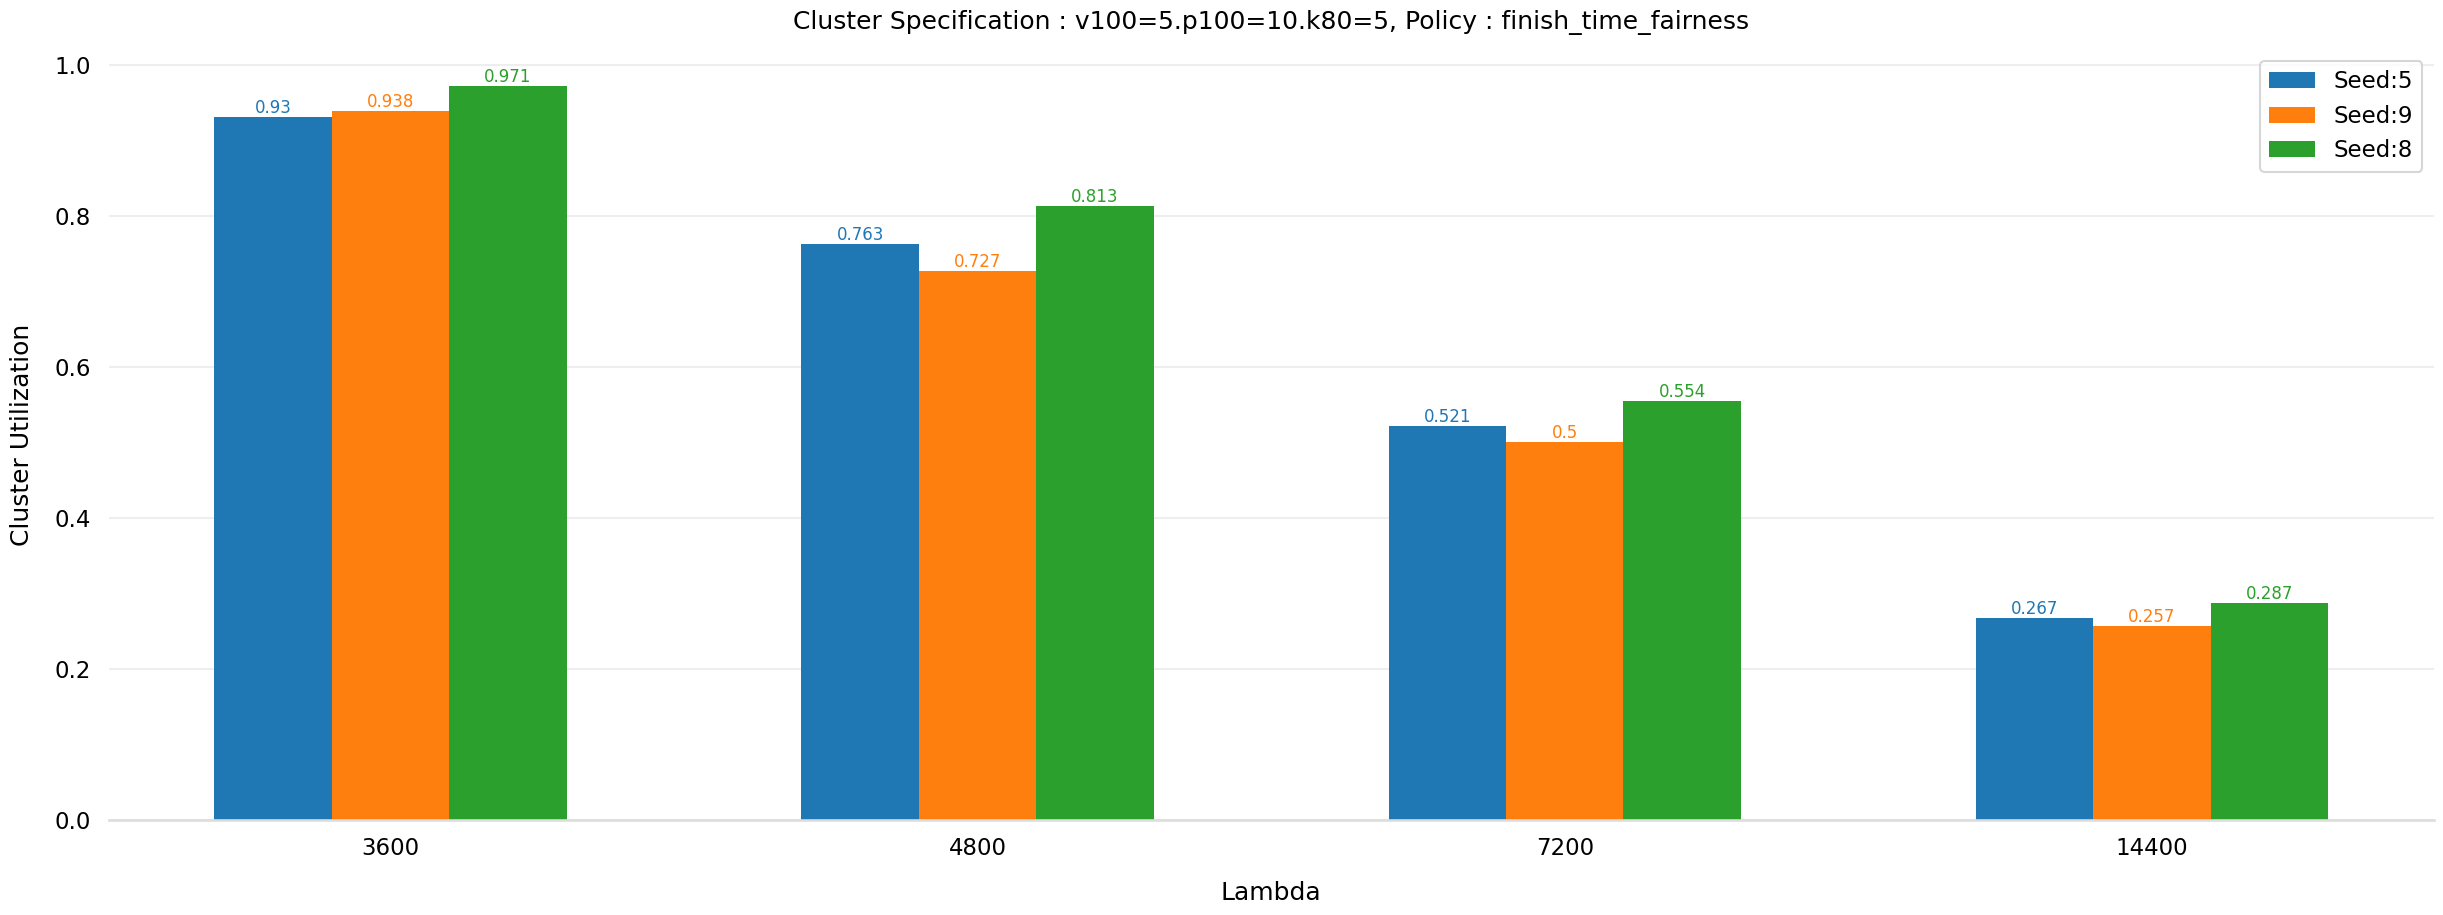

In [3]:
for cluster_spec in df_continuous2["cluster_spec"].unique():
    for policy in df_continuous2["policy"].unique():
        result_int = df_continuous2.query(f'cluster_spec == "{cluster_spec}" & policy == "{policy}"')
        
        no_graphs = len(result_int["seed"].unique())
        
        fig, ax = plt.subplots(figsize=(30,10))
        bar_width = 0.2
        
        for idx, seed in enumerate(result_int["seed"].unique()):
            result = result_int.query(f'seed == {seed}')
            result = result.sort_values("lambda")            

            x = np.arange(len(result["lambda"].unique()))
            y = [float(r) for r in result["utilization"]]

            ax.bar(x + (bar_width * idx), y, width=bar_width,label=f'Seed:{seed}')
            ax.set_xticks(x + (no_graphs - 1) * (bar_width / 2))
            ax.set_xticklabels(result["lambda"].unique())

        ax.legend(loc ="upper right")

        ax.set_xlabel('Lambda', labelpad=15)
        ax.set_ylabel('Cluster Utilization', labelpad=15)
        ax.set_title(f'Cluster Specification : {cluster_spec}, Policy : {policy}', pad=15)
        
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['bottom'].set_color('#DDDDDD')
        ax.tick_params(bottom=False, left=False)
        ax.set_axisbelow(True)
        
        ax.yaxis.grid(True, color='#EEEEEE')
        ax.xaxis.grid(False)

        # For each bar in the chart, add a text label.
        for bar in ax.patches:
        # The text annotation for each bar should be its height.
            bar_value = bar.get_height()
            # Format the text with commas to separate thousands. You can do
            # any type of formatting here though.
            text = f'{bar_value:,}'
            # This will give the middle of each bar on the x-axis.
            text_x = bar.get_x() + bar.get_width() / 2
            # get_y() is where the bar starts so we add the height to it.
            text_y = bar.get_y() + bar_value
            # If we want the text to be the same color as the bar, we can
            # get the color like so:
            bar_color = bar.get_facecolor()
            # If you want a consistent color, you can just set it as a constant, e.g. #222222
            ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,
                    size=12)

how does average completition time vary with lambda

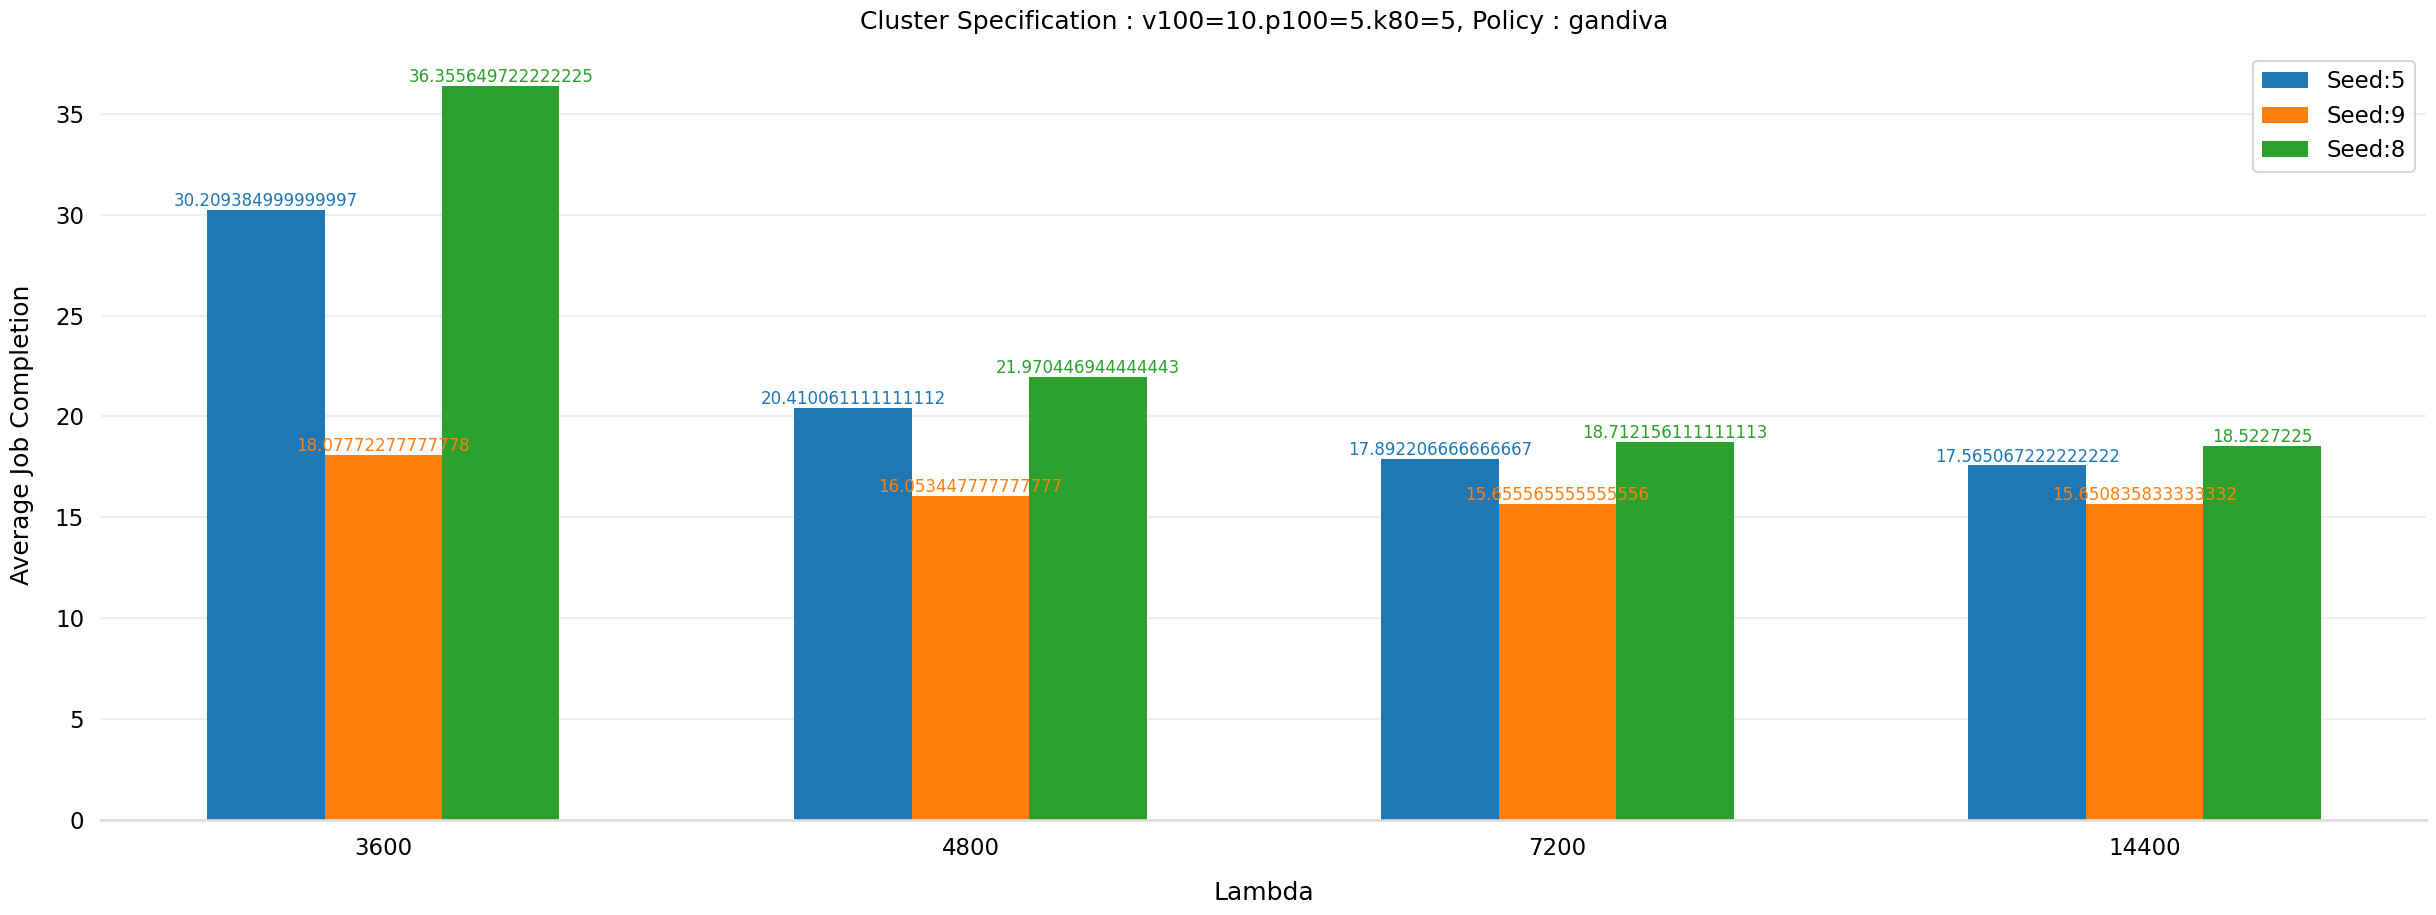

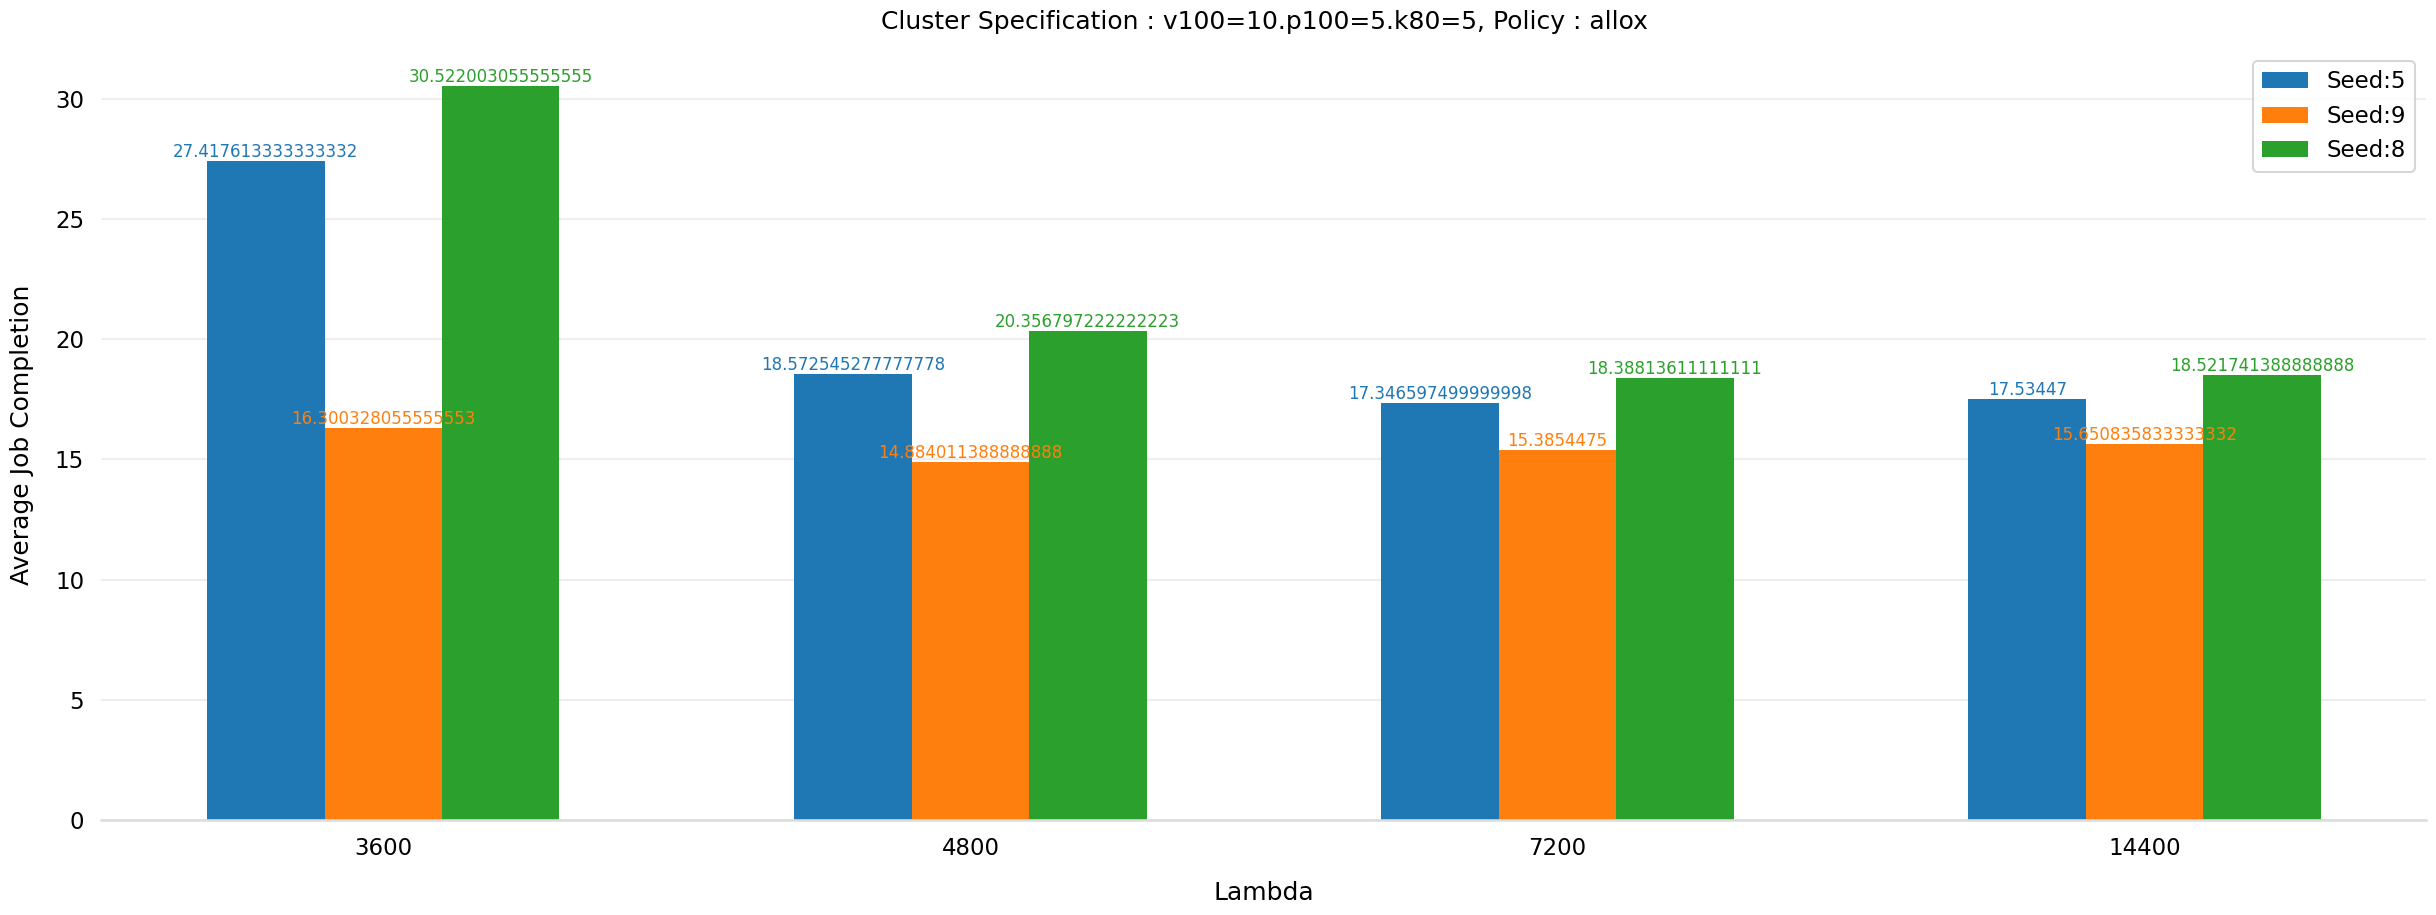

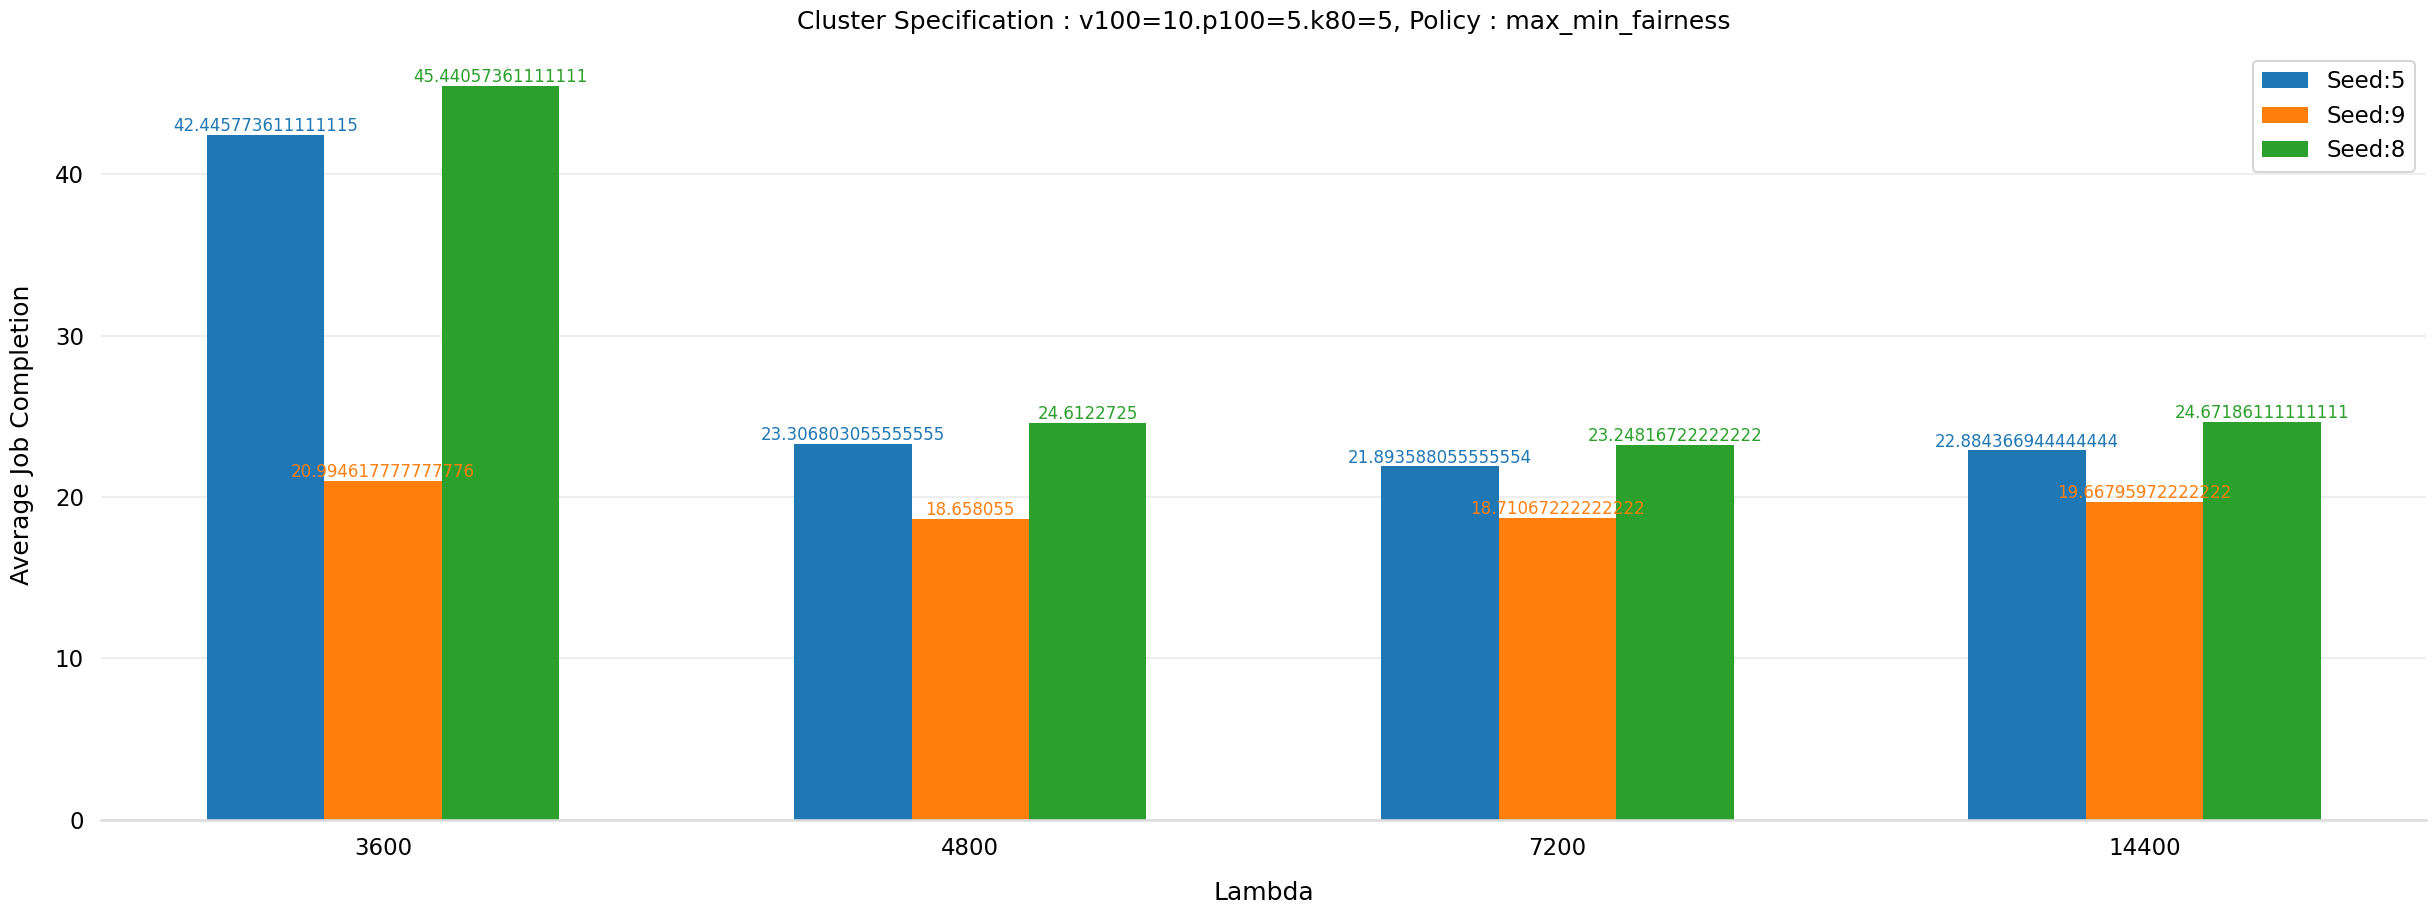

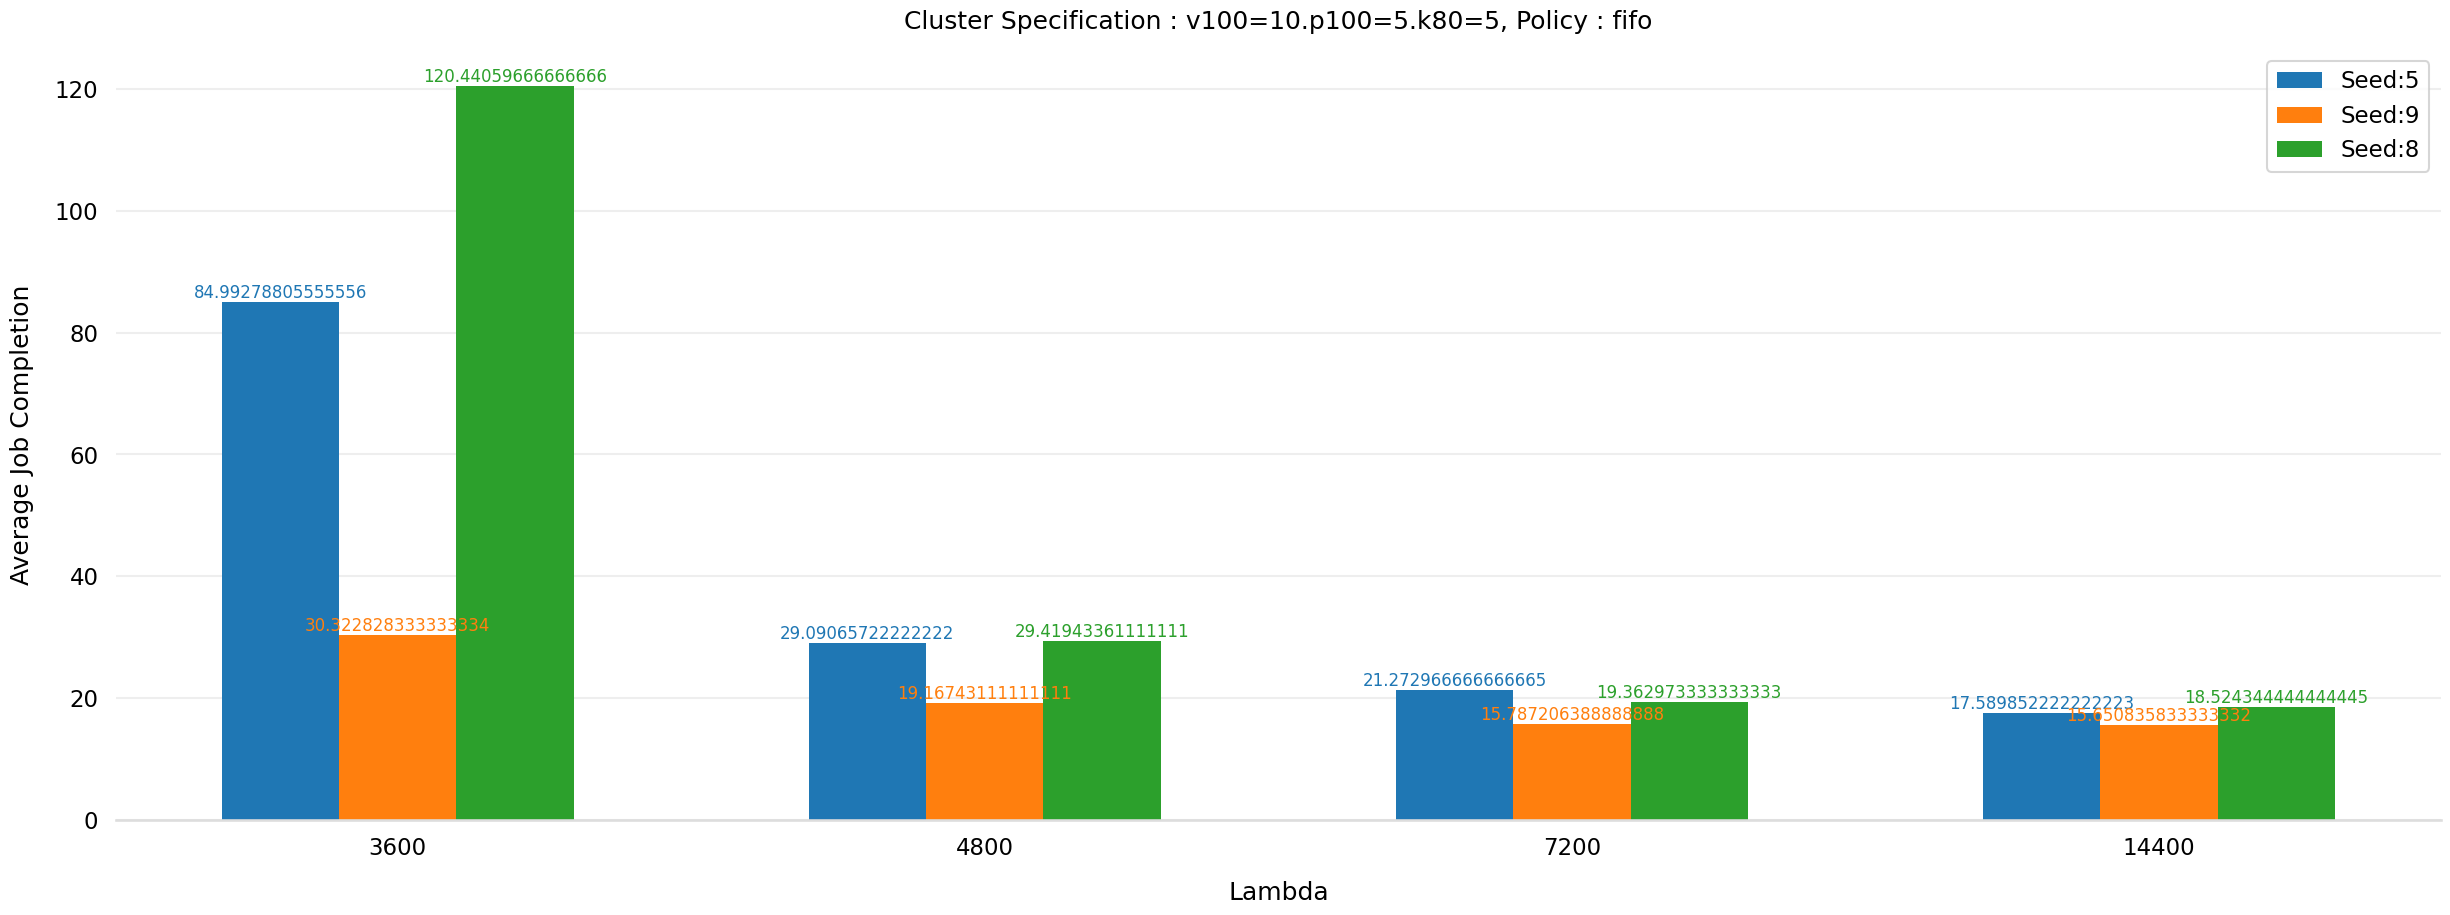

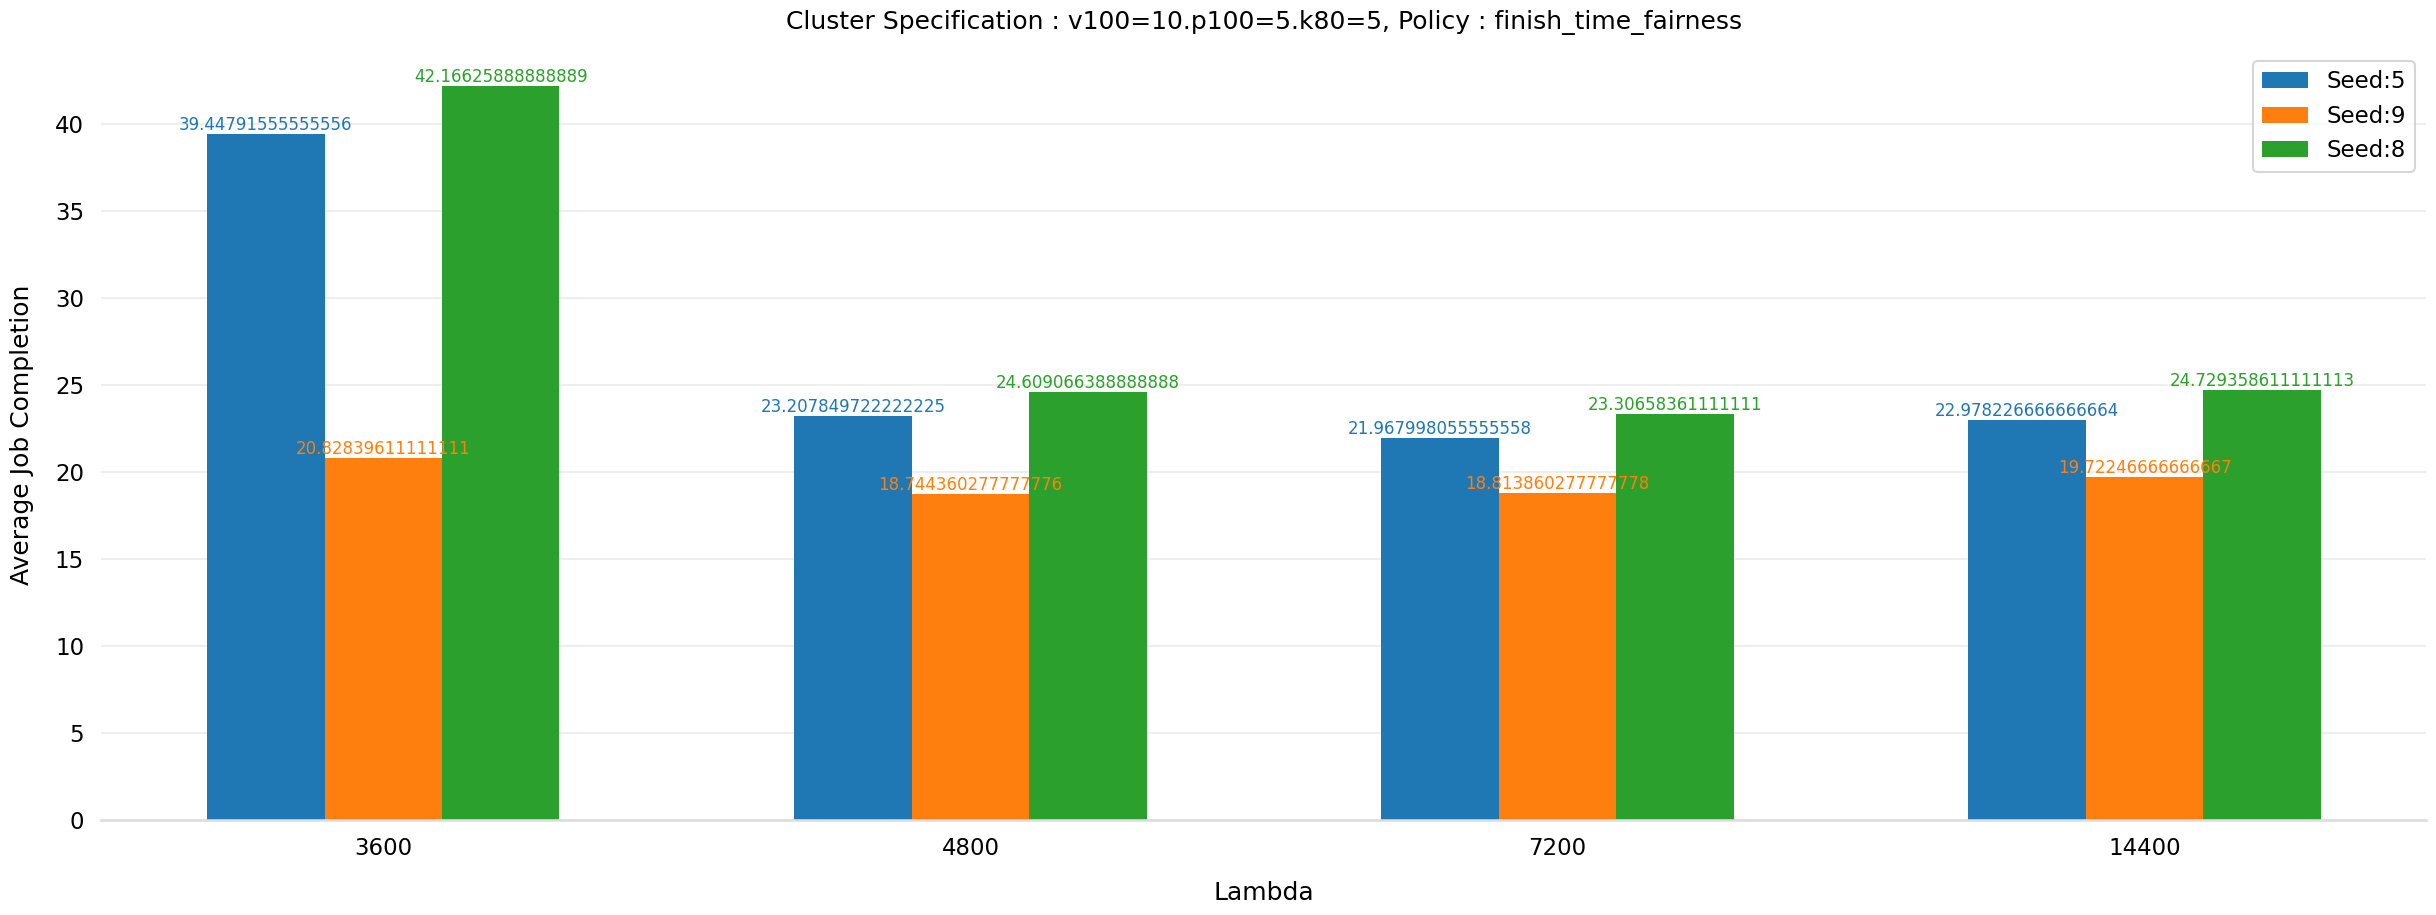

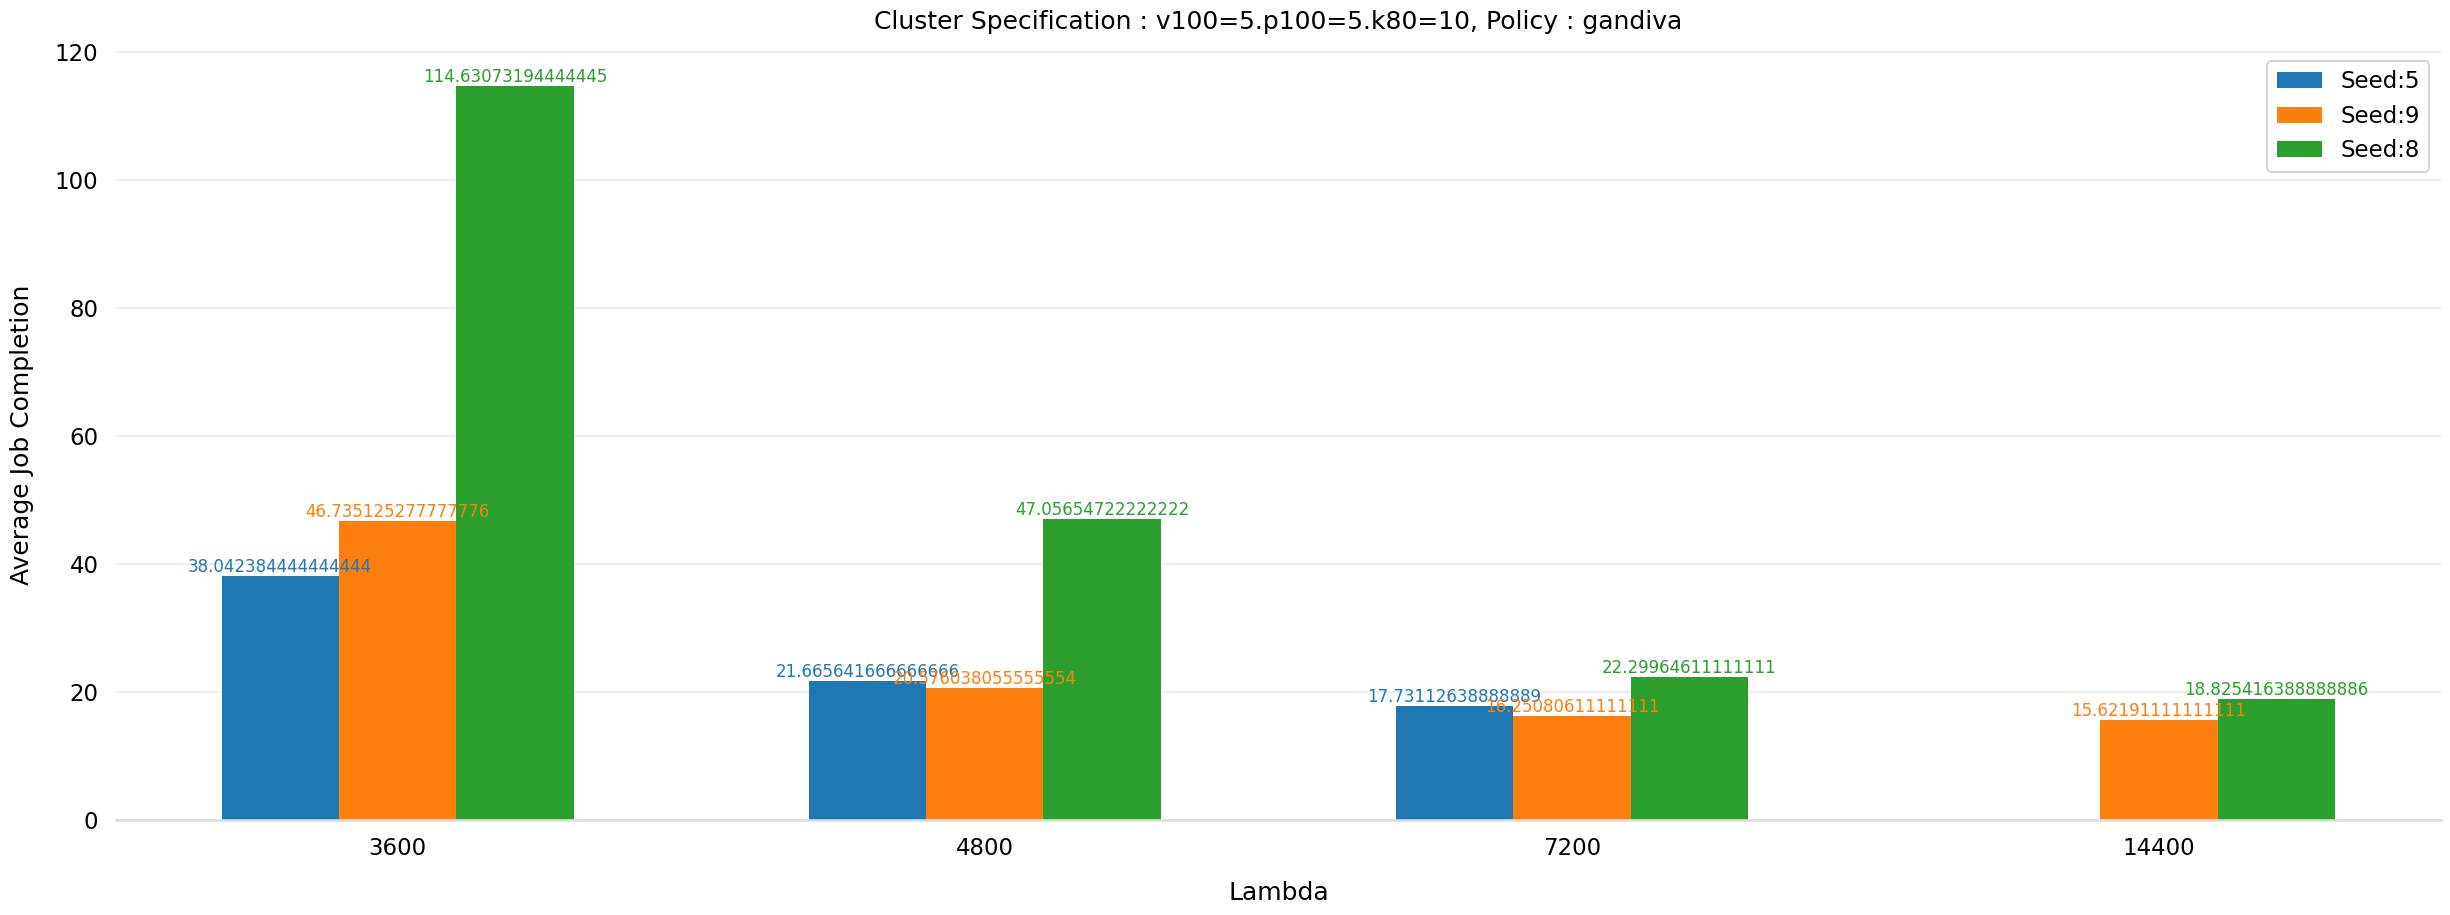

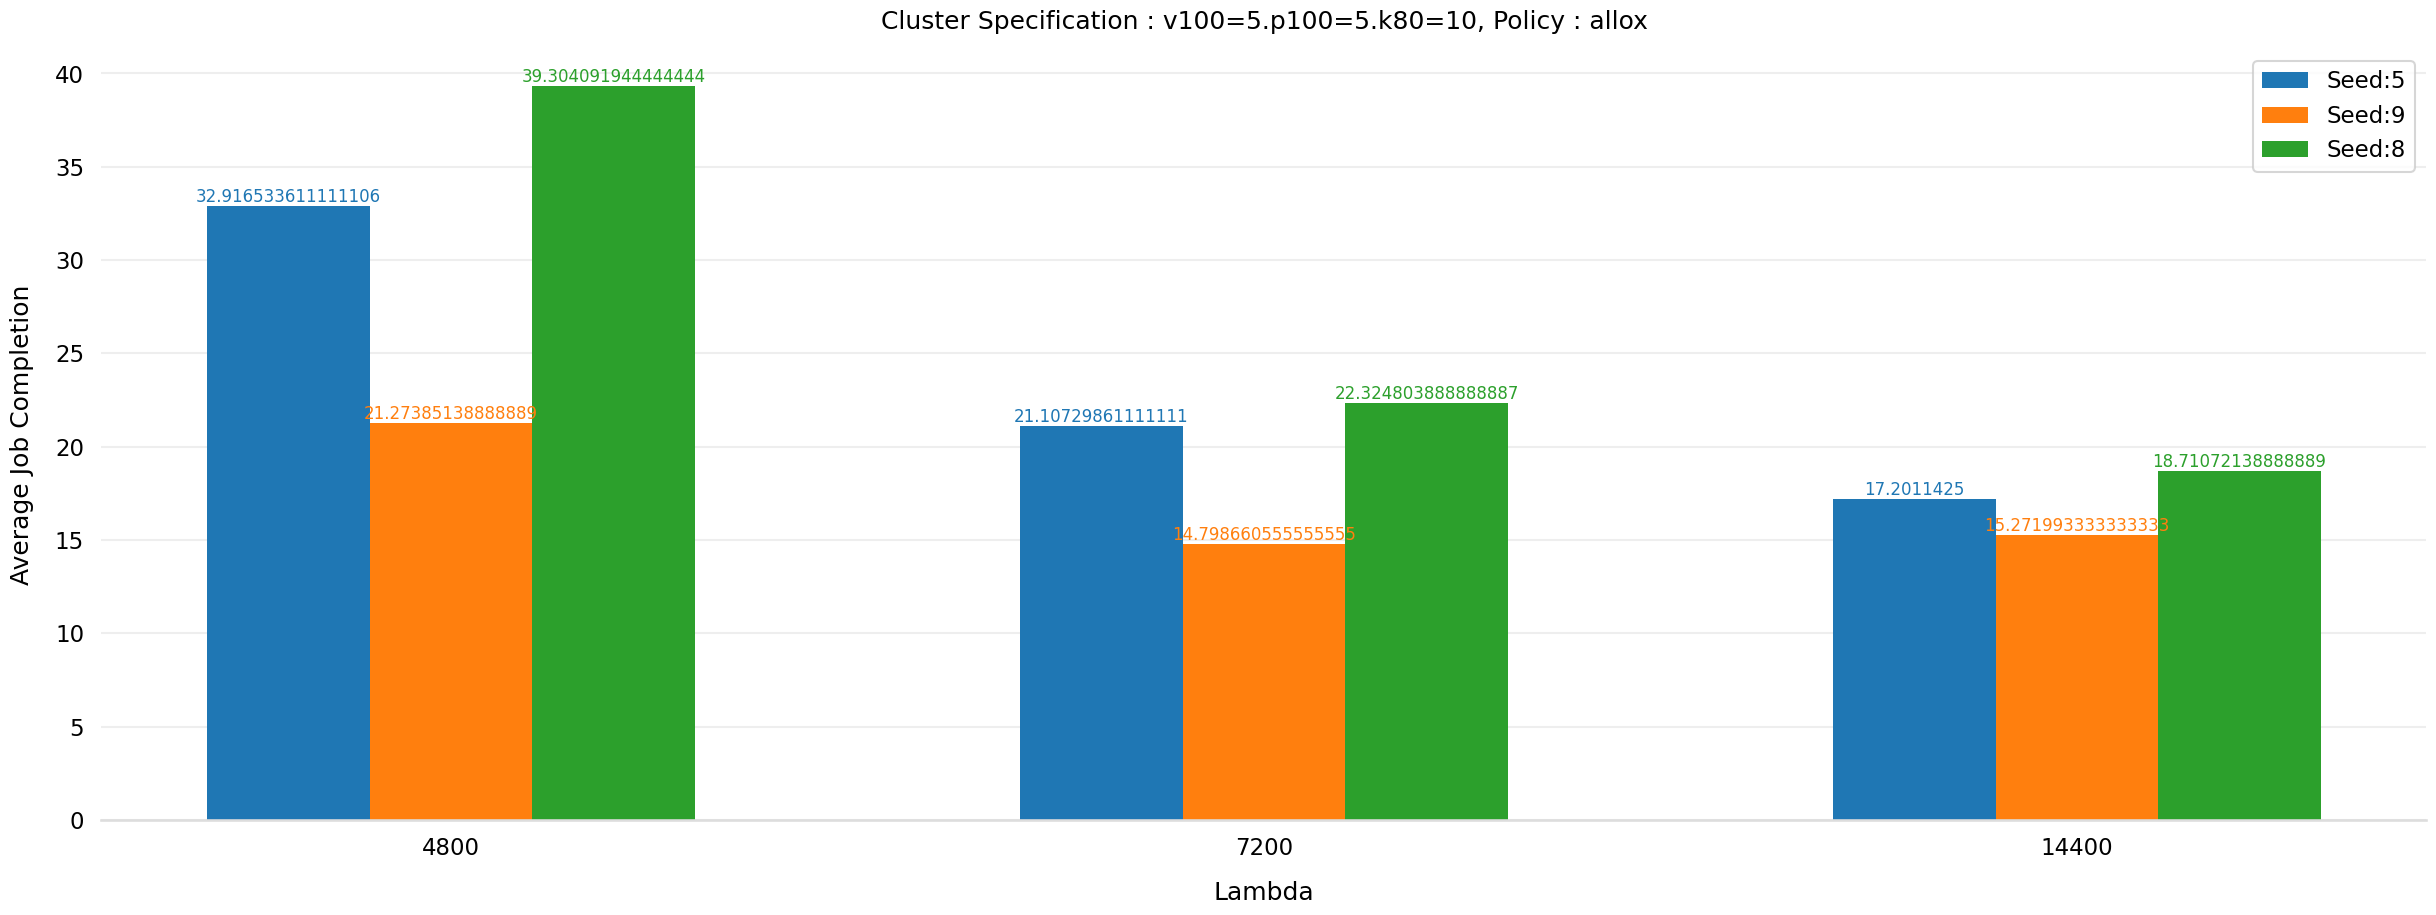

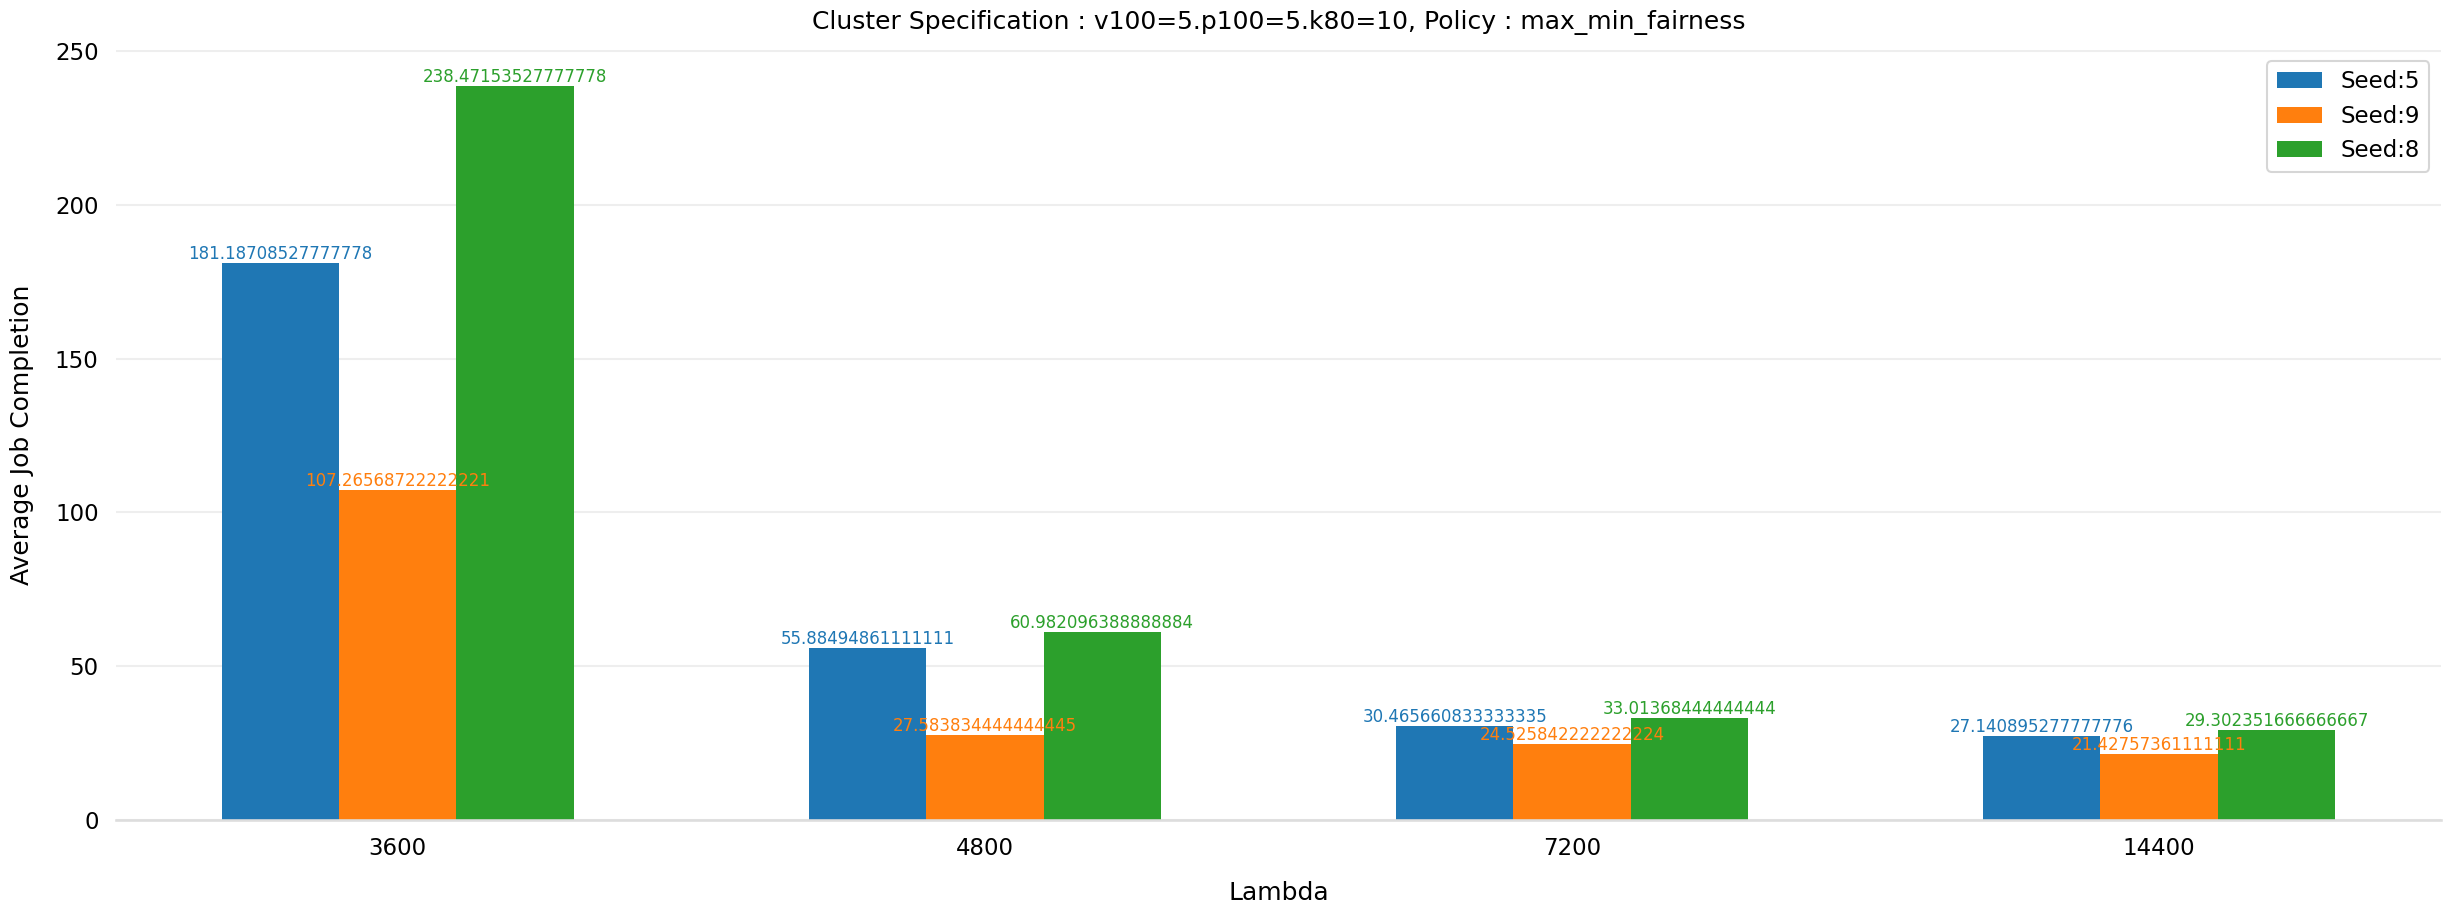

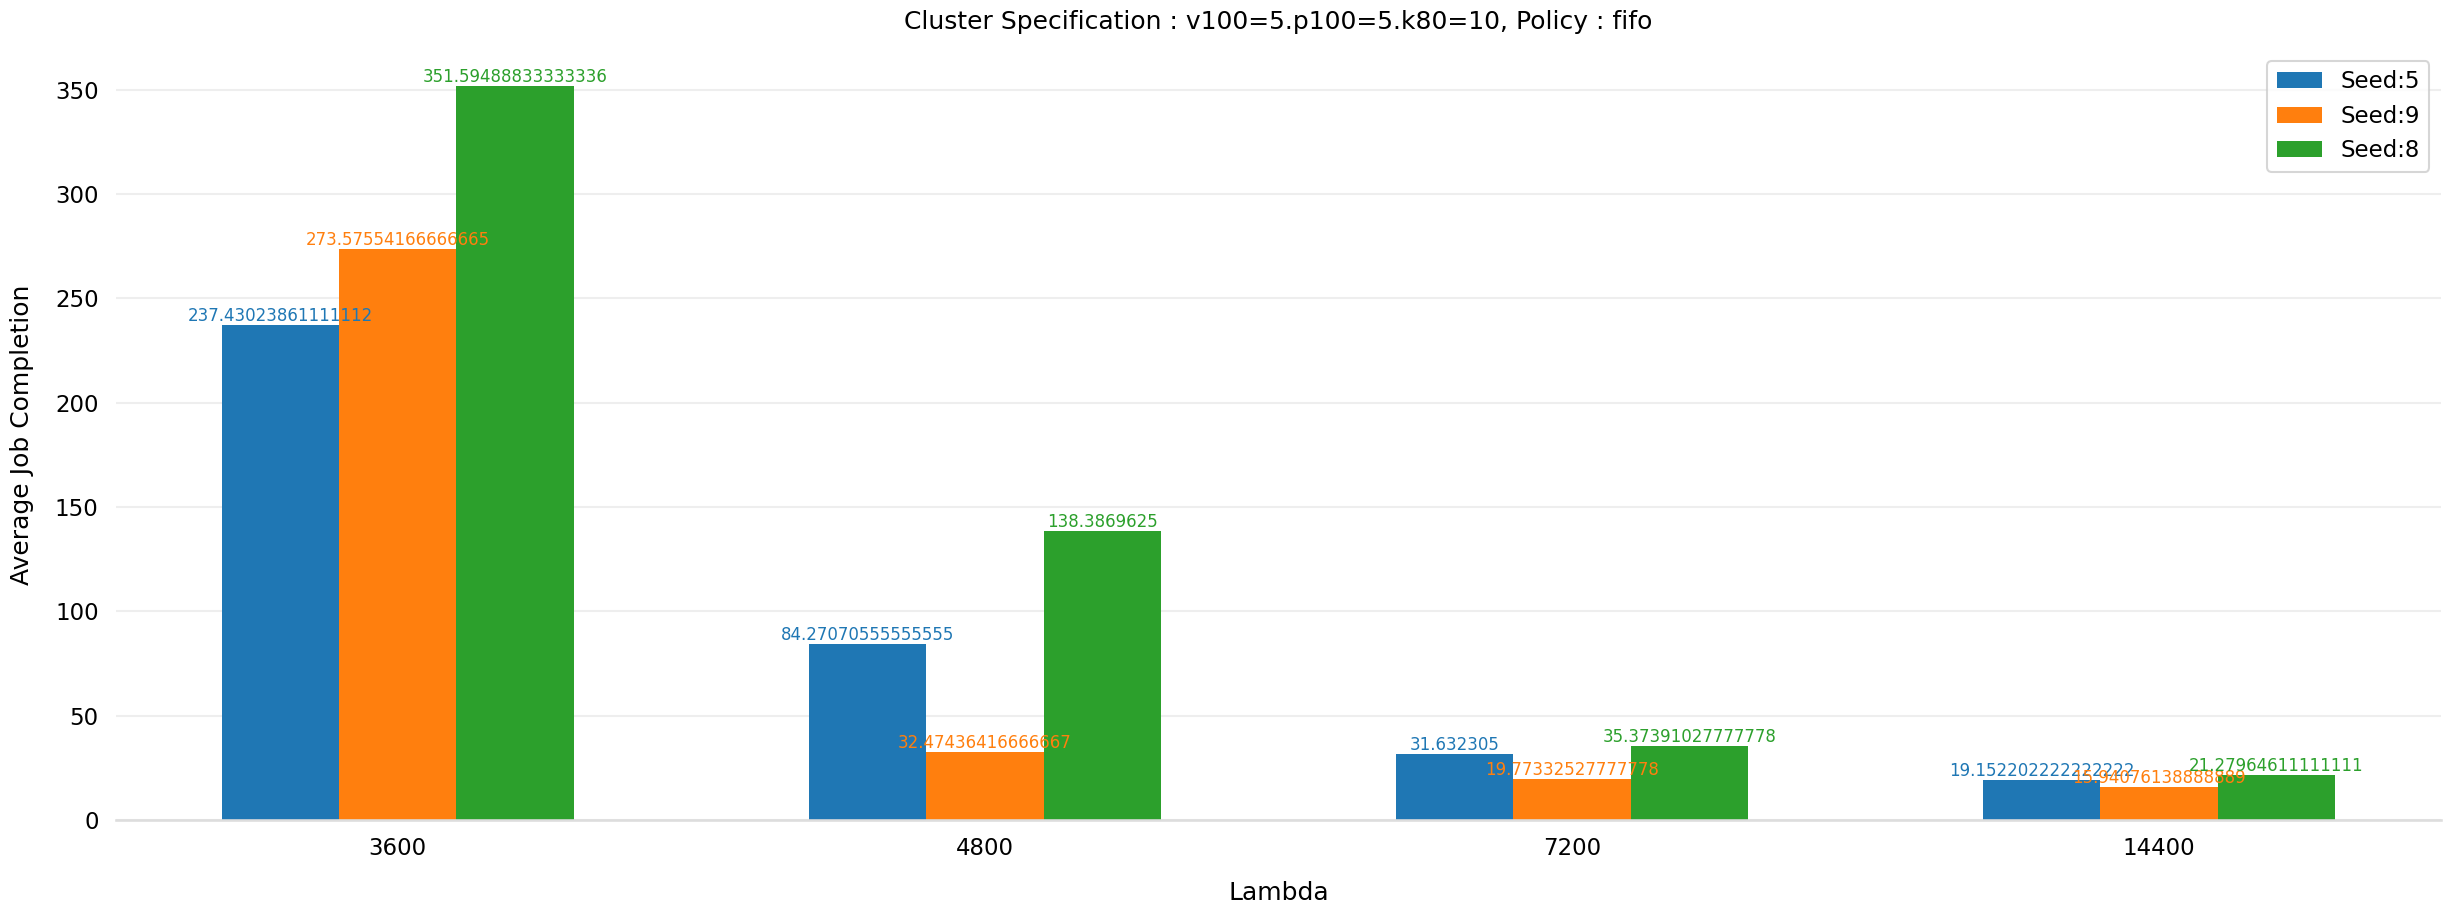

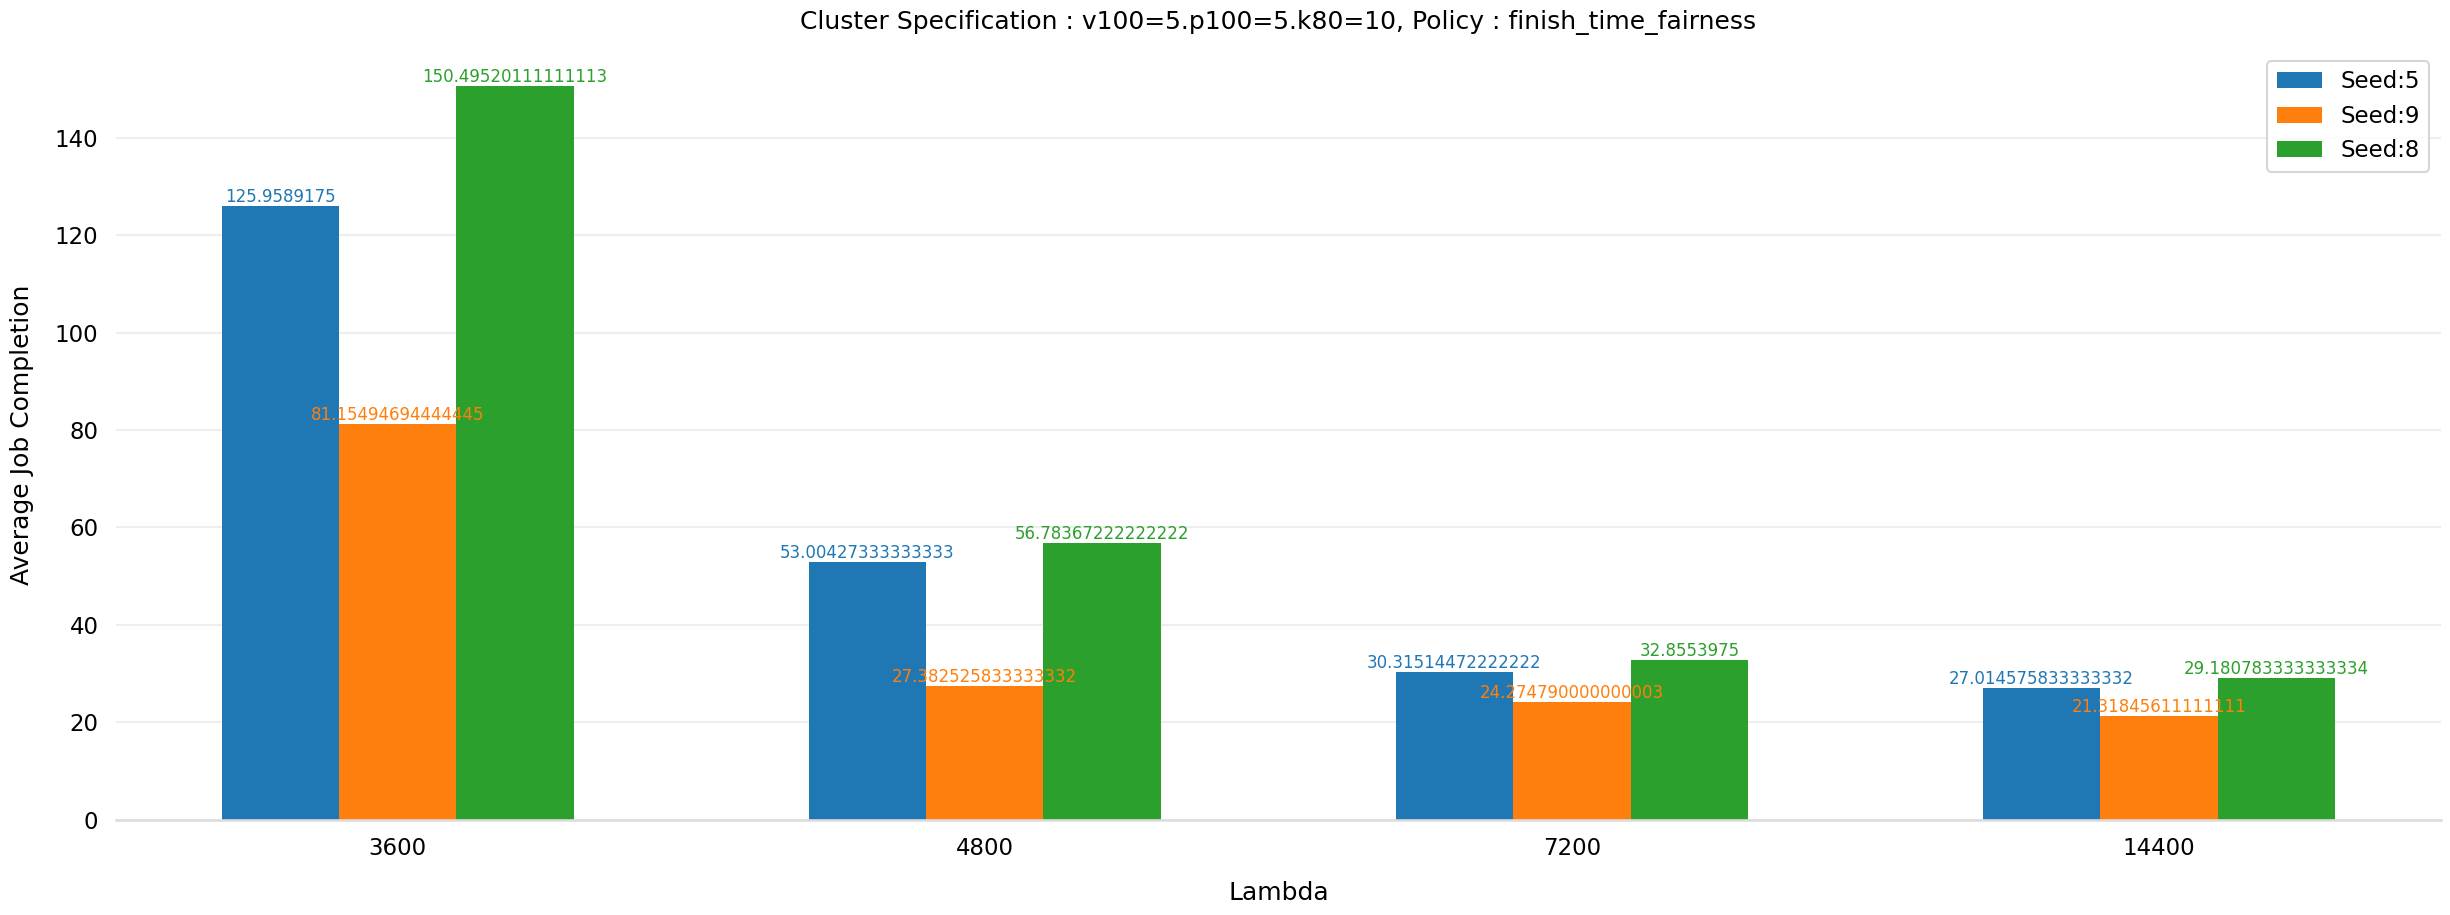

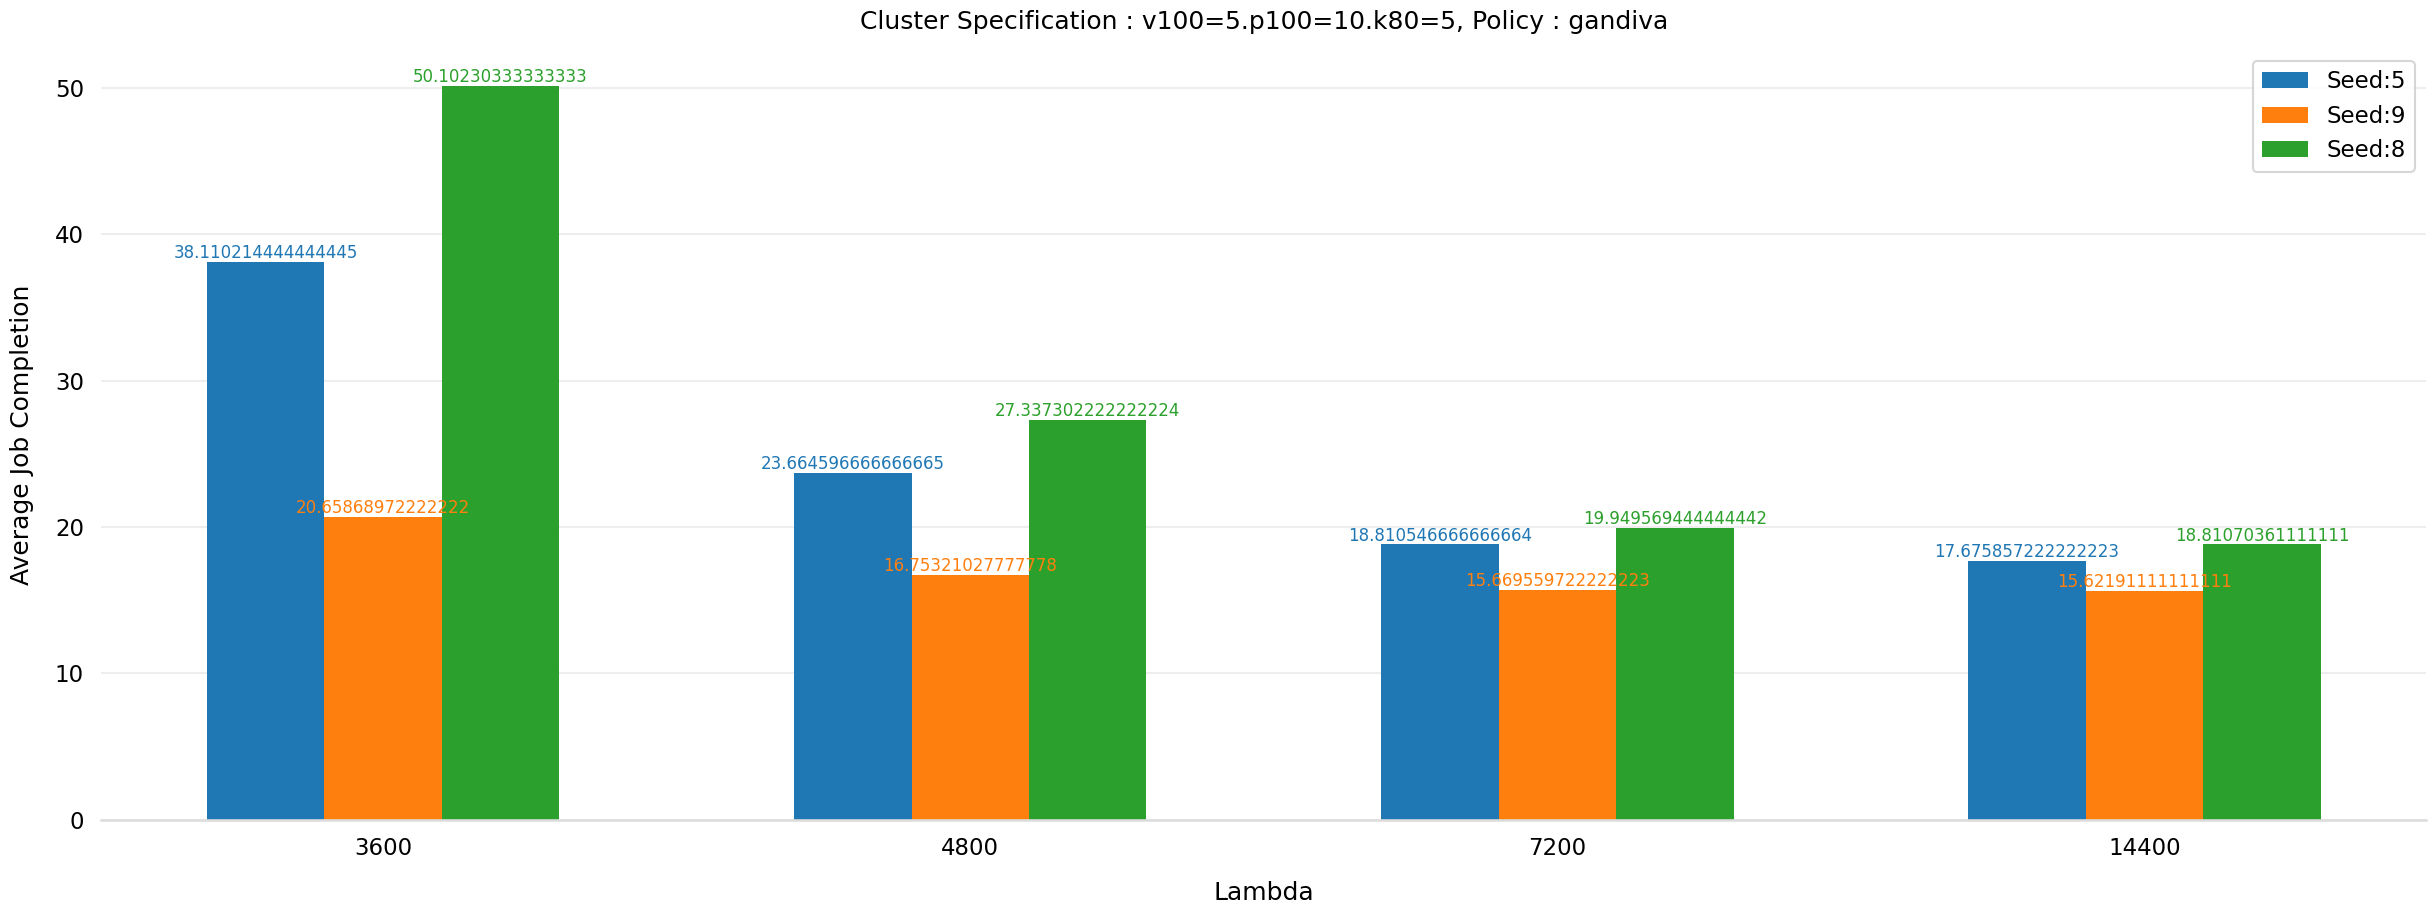

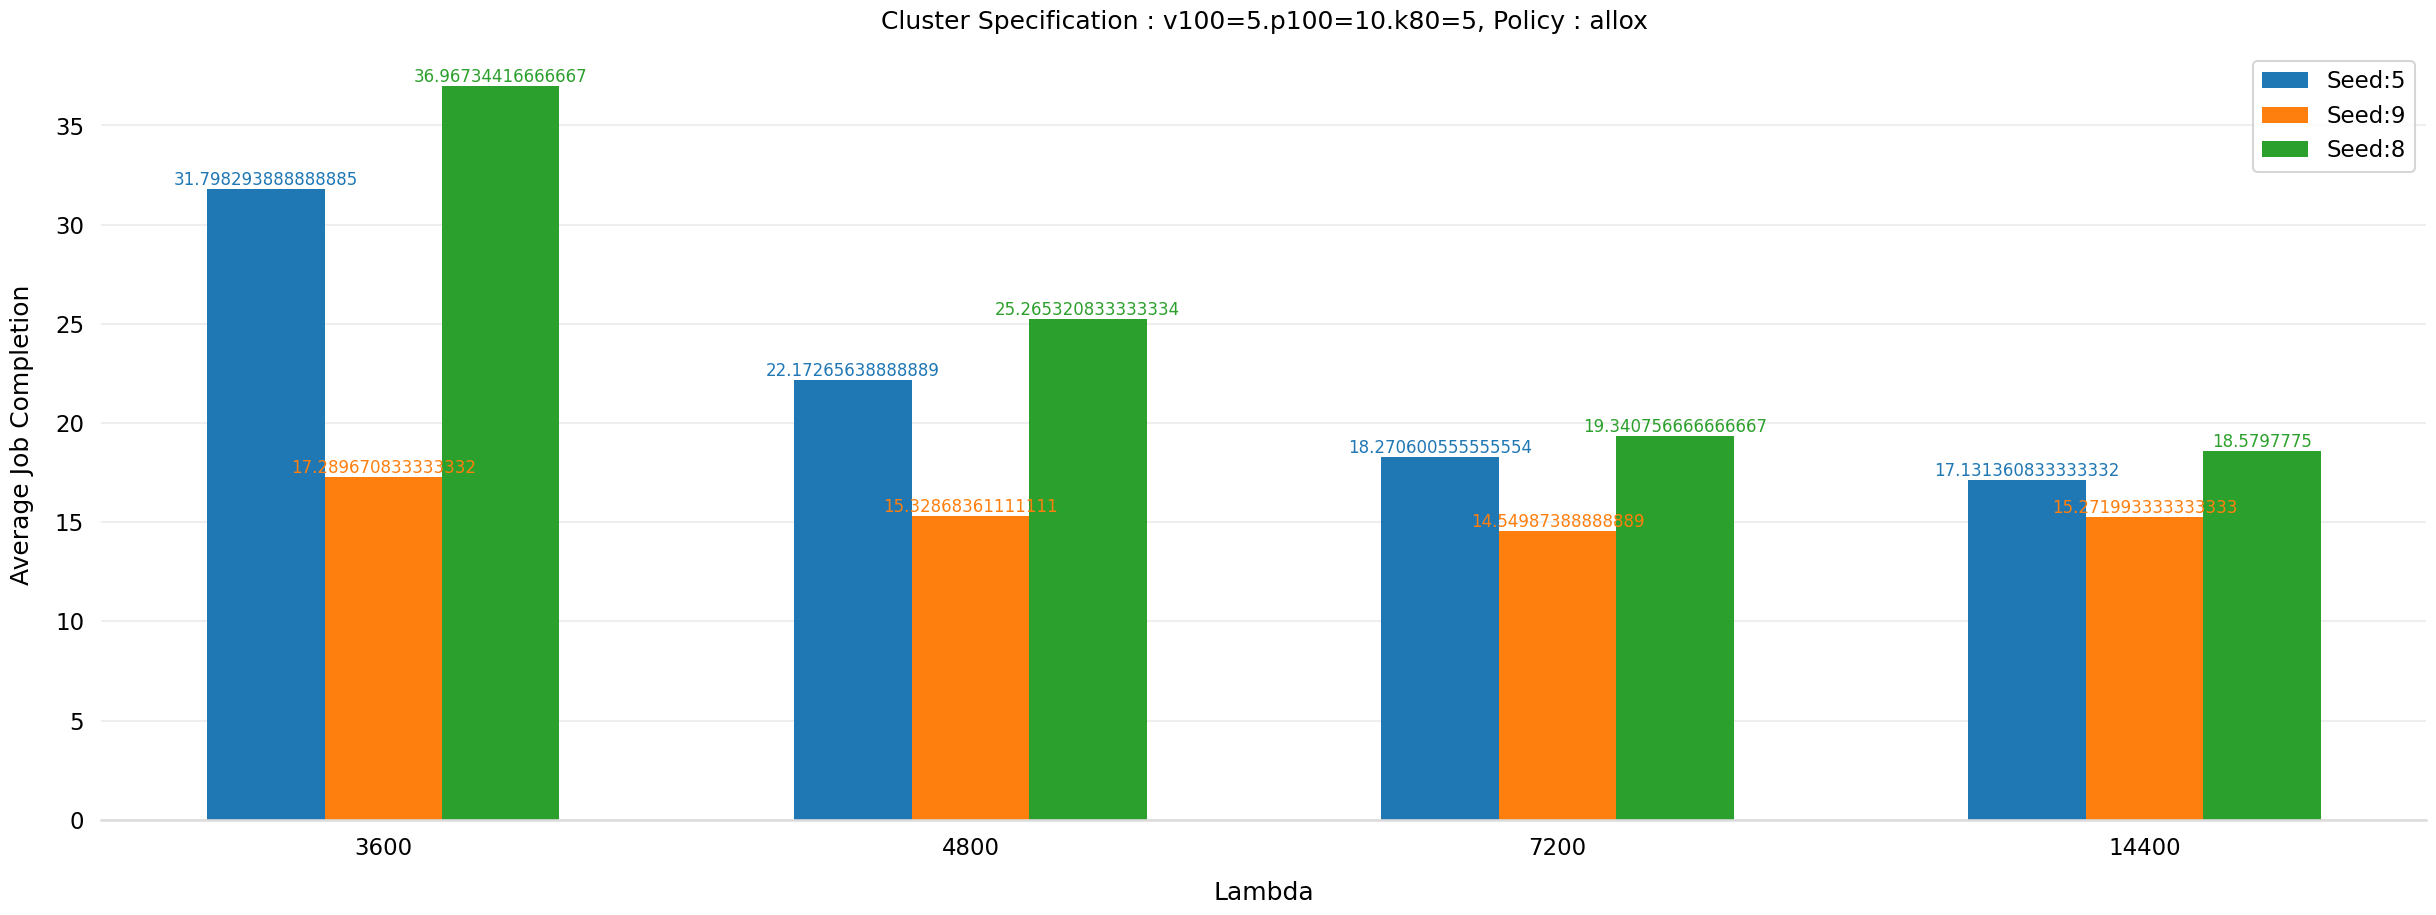

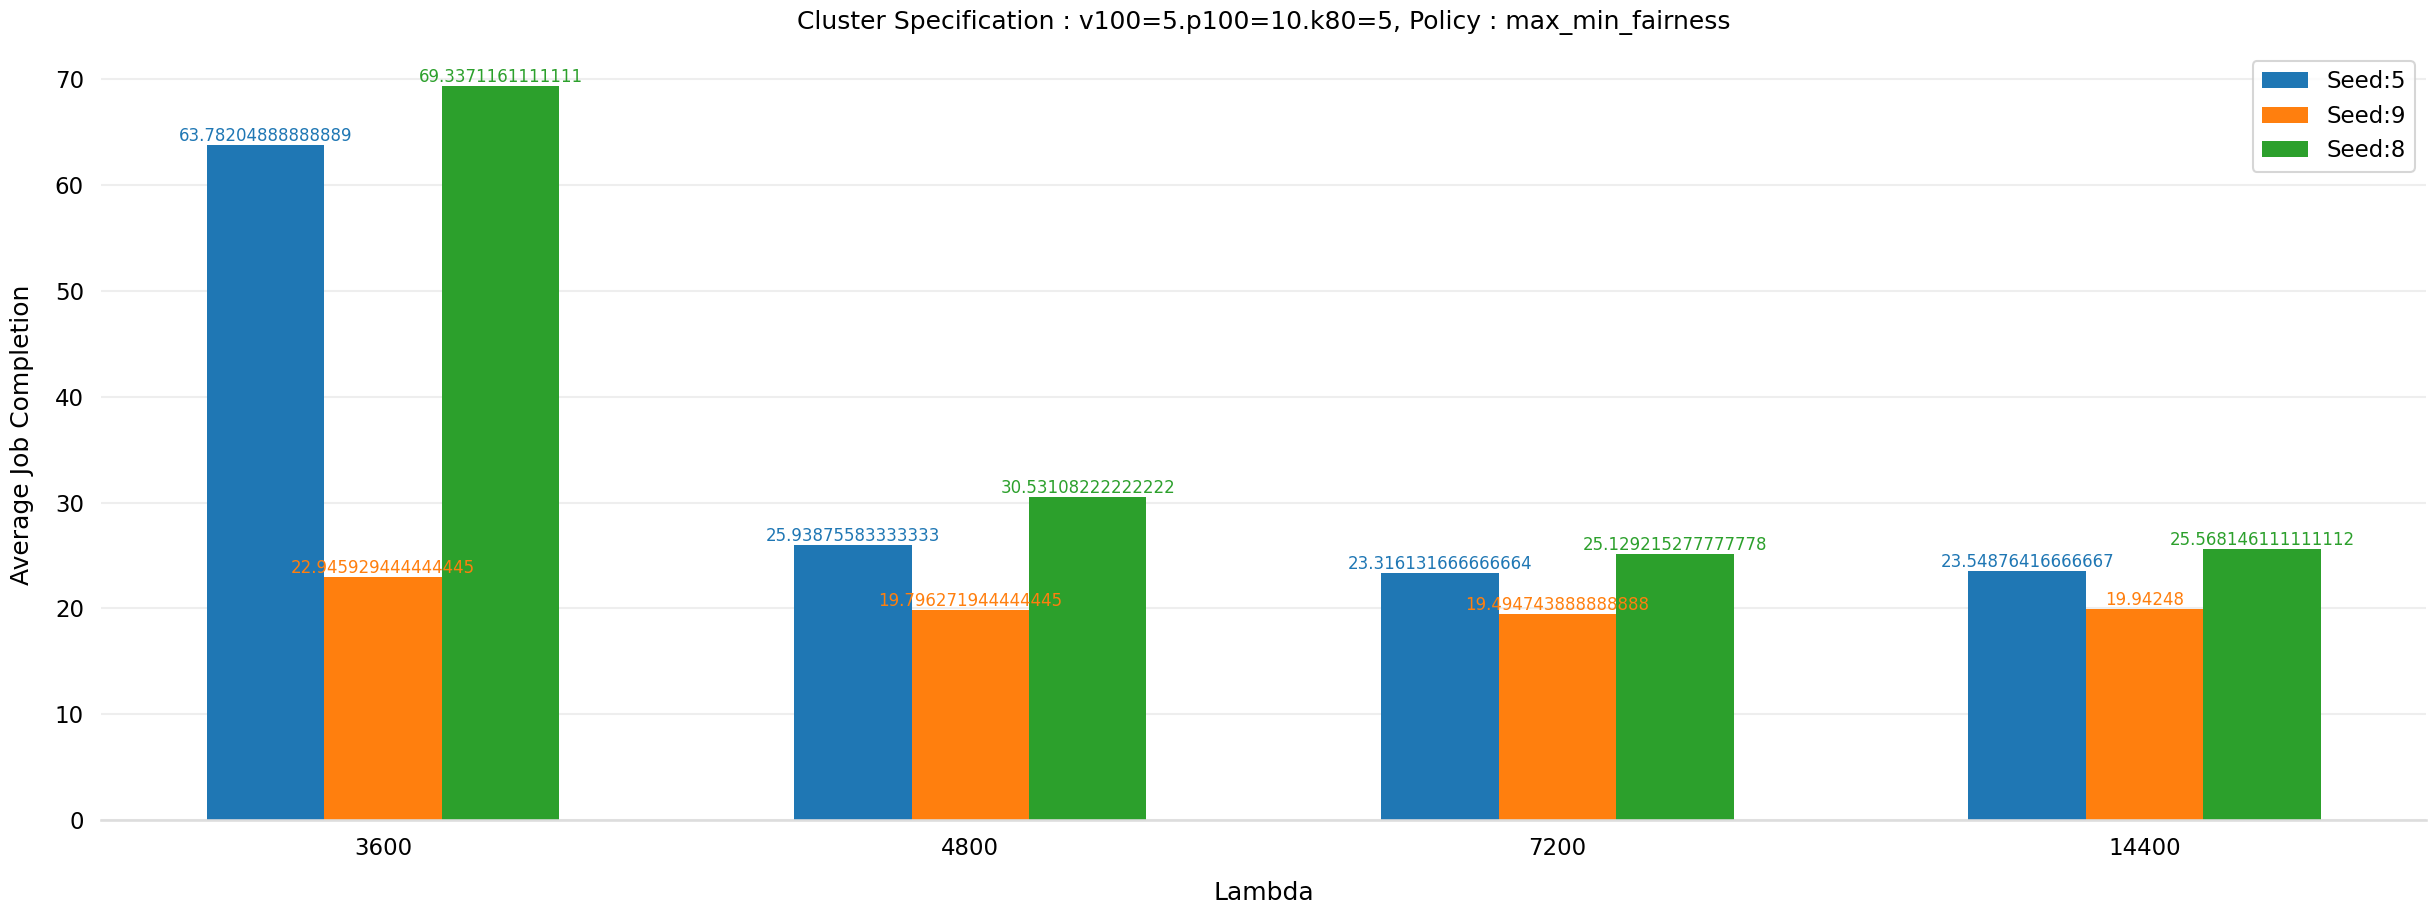

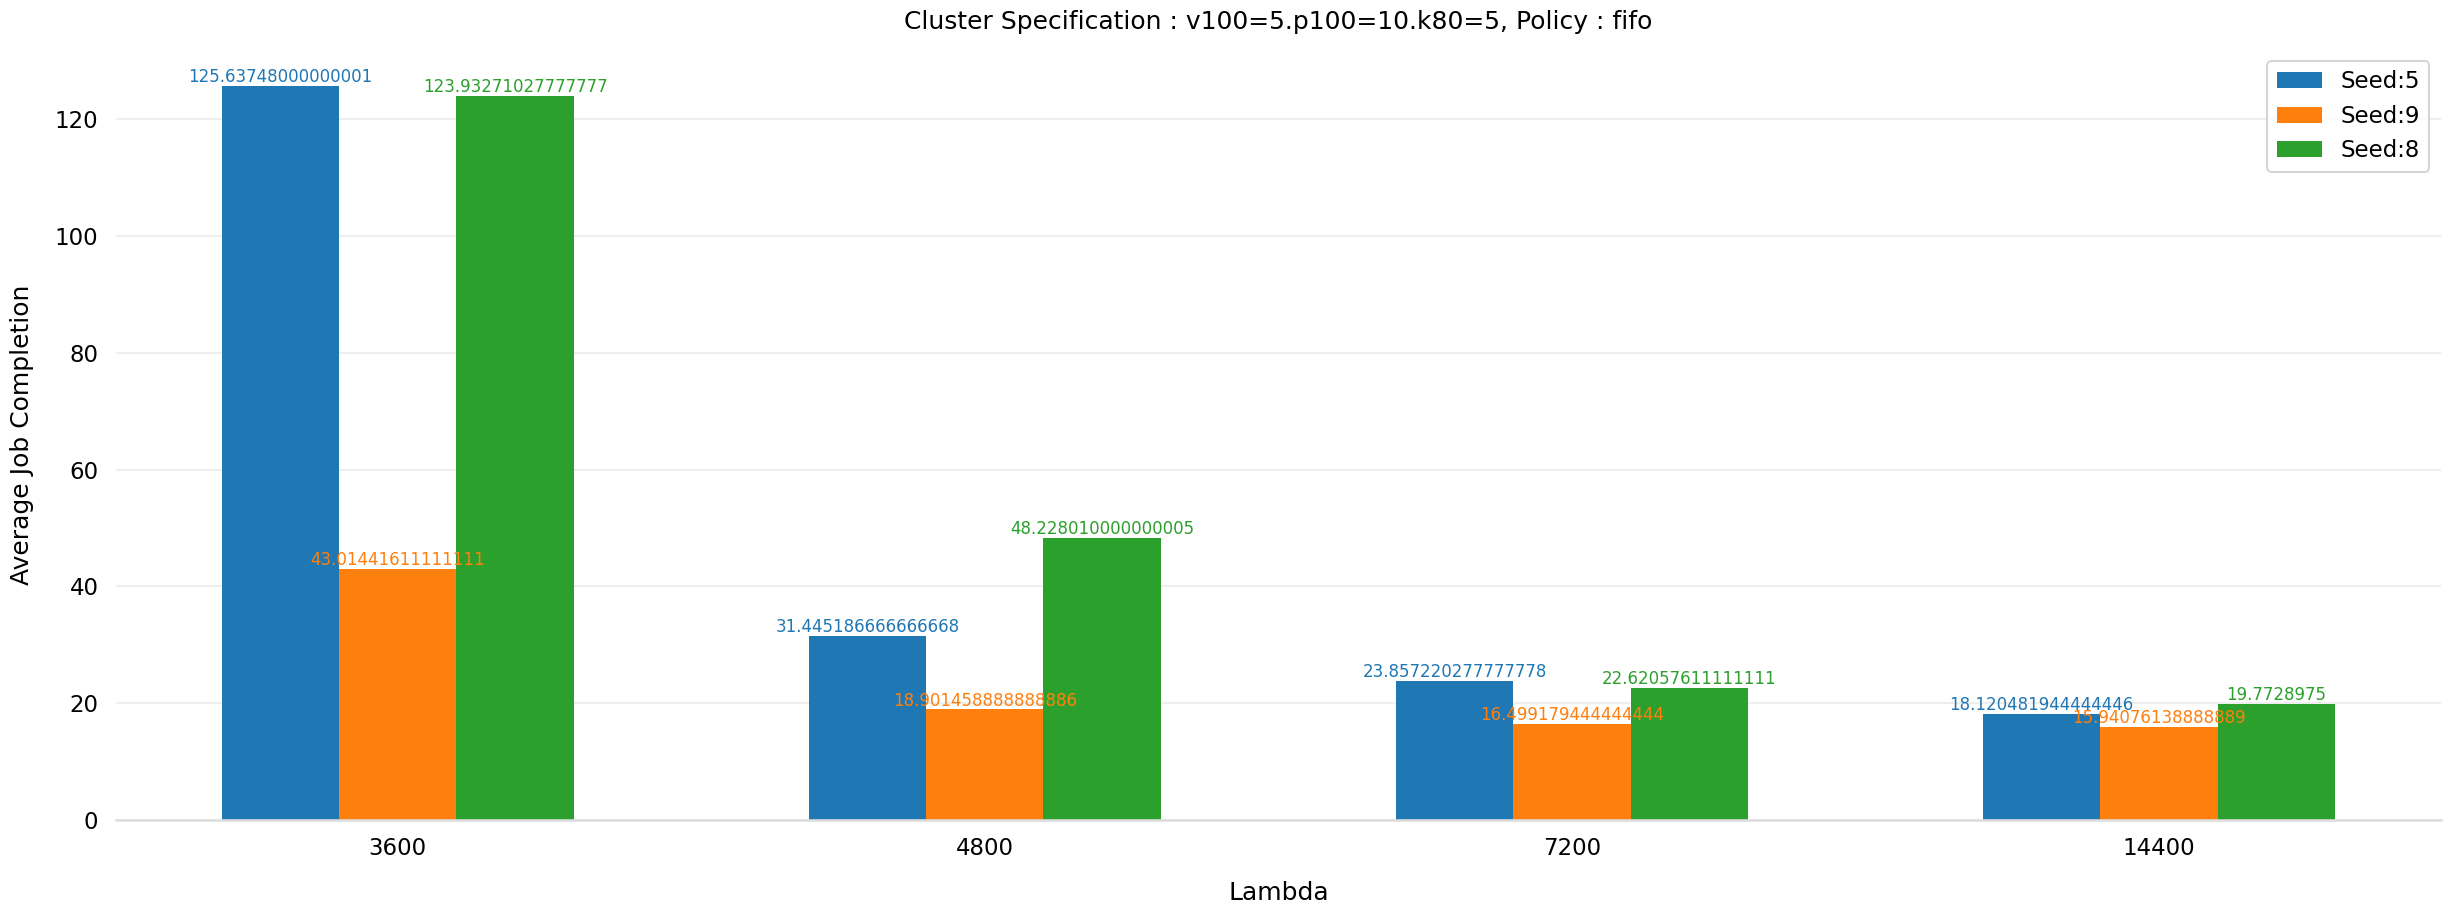

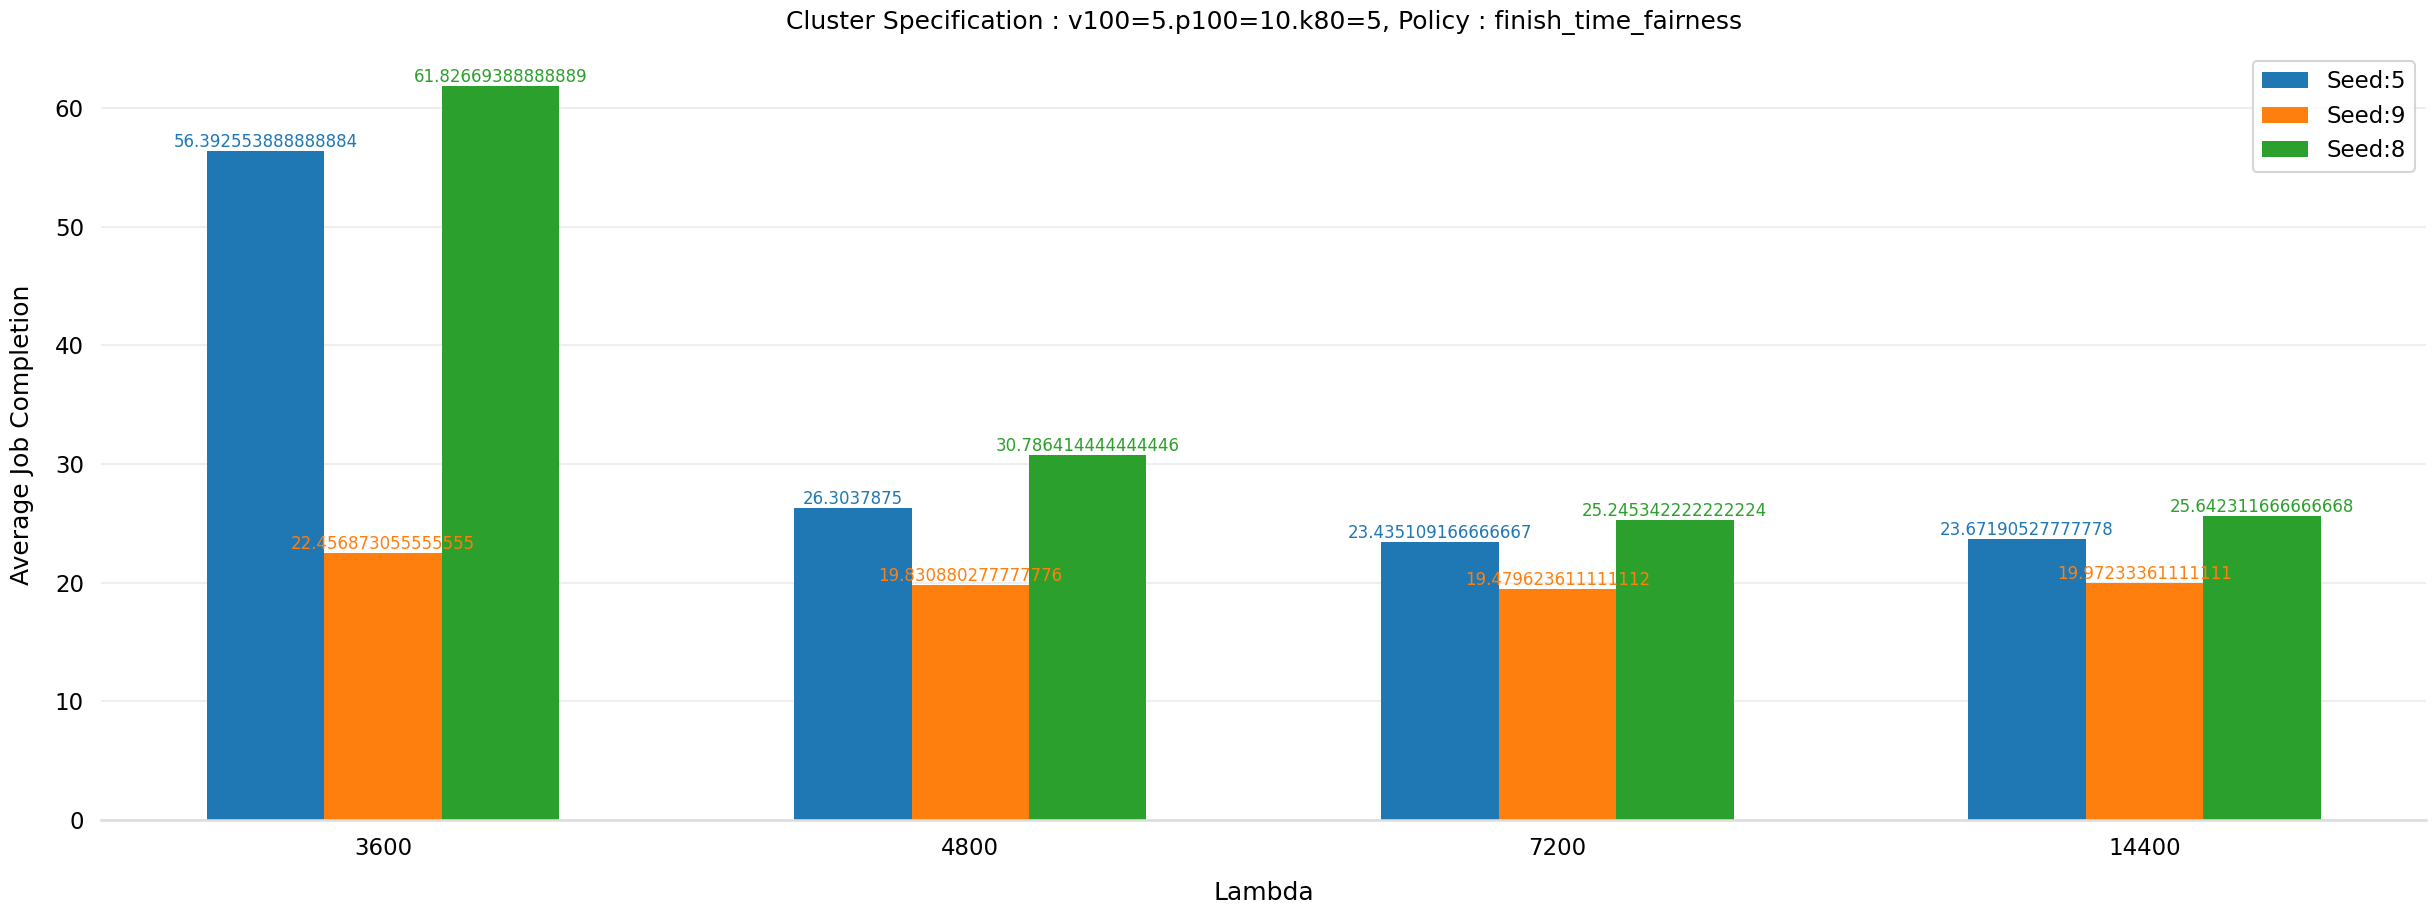

In [4]:
for cluster_spec in df_continuous2["cluster_spec"].unique():
    for policy in df_continuous2["policy"].unique():
        result_int = df_continuous2.query(f'cluster_spec == "{cluster_spec}" & policy == "{policy}"')
        
        no_graphs = len(result_int["seed"].unique())
        
        fig, ax = plt.subplots(figsize=(30,10))
        bar_width = 0.2
        
        for idx, seed in enumerate(result_int["seed"].unique()):
            result = result_int.query(f'seed == {seed}')
            result = result.sort_values("lambda")            

            x = np.arange(len(result["lambda"].unique()))
            y = [(float(r.strip().split(" ")[0])/3600.0) for r in result["average_completion_time"]]

            ax.bar(x + (bar_width * idx), y, width=bar_width,label=f'Seed:{seed}')
            ax.set_xticks(x + (no_graphs - 1) * (bar_width / 2))
            ax.set_xticklabels(result["lambda"].unique())

        ax.legend(loc ="upper right")

        ax.set_xlabel('Lambda', labelpad=15)
        ax.set_ylabel('Average Job Completion', labelpad=15)
        ax.set_title(f'Cluster Specification : {cluster_spec}, Policy : {policy}', pad=15)
        
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['bottom'].set_color('#DDDDDD')
        ax.tick_params(bottom=False, left=False)
        ax.set_axisbelow(True)
        
        ax.yaxis.grid(True, color='#EEEEEE')
        ax.xaxis.grid(False)

        # For each bar in the chart, add a text label.
        for bar in ax.patches:
        # The text annotation for each bar should be its height.
            bar_value = bar.get_height()
            # Format the text with commas to separate thousands. You can do
            # any type of formatting here though.
            text = f'{bar_value:,}'
            # This will give the middle of each bar on the x-axis.
            text_x = bar.get_x() + bar.get_width() / 2
            # get_y() is where the bar starts so we add the height to it.
            text_y = bar.get_y() + bar_value
            # If we want the text to be the same color as the bar, we can
            # get the color like so:
            bar_color = bar.get_facecolor()
            # If you want a consistent color, you can just set it as a constant, e.g. #222222
            ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,
                    size=12)

window duration

In [ ]:
for cluster_spec in df_continuous2["cluster_spec"].unique():
    for policy in df_continuous2["policy"].unique():
        result_int = df_continuous2.query(f'cluster_spec == "{cluster_spec}" & policy == "{policy}"')
        
        no_graphs = len(result_int["seed"].unique())
        
        fig, ax = plt.subplots(figsize=(30,10))
        bar_width = 0.2
        
        for idx, seed in enumerate(result_int["seed"].unique()):
            result = result_int.query(f'seed == {seed}')
            result = result.sort_values("lambda")            

            x = np.arange(len(result["lambda"].unique()))
            y = [(float(r)/3600.0) for r in result["window_duration"]]

            ax.bar(x + (bar_width * idx), y, width=bar_width,label=f'Seed:{seed}')
            ax.set_xticks(x + (no_graphs - 1) * (bar_width / 2))
            ax.set_xticklabels(result["lambda"].unique())

        ax.legend(loc ="upper right")

        ax.set_xlabel('Lambda', labelpad=15)
        ax.set_ylabel('Window Duration', labelpad=15)
        ax.set_title(f'Cluster Specification : {cluster_spec}, Policy : {policy}', pad=15)
        
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['bottom'].set_color('#DDDDDD')
        ax.tick_params(bottom=False, left=False)
        ax.set_axisbelow(True)
        
        ax.yaxis.grid(True, color='#EEEEEE')
        ax.xaxis.grid(False)

        # For each bar in the chart, add a text label.
        for bar in ax.patches:
        # The text annotation for each bar should be its height.
            bar_value = bar.get_height()
            # Format the text with commas to separate thousands. You can do
            # any type of formatting here though.
            text = f'{bar_value:,}'
            # This will give the middle of each bar on the x-axis.
            text_x = bar.get_x() + bar.get_width() / 2
            # get_y() is where the bar starts so we add the height to it.
            text_y = bar.get_y() + bar_value
            # If we want the text to be the same color as the bar, we can
            # get the color like so:
            bar_color = bar.get_facecolor()
            # If you want a consistent color, you can just set it as a constant, e.g. #222222
            ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,
                    size=12)

create a pandas data frame for static trace data

In [5]:
csv_path = '/home/piyush/rp/work/analysis/static_updated.csv'
df_static = pd.read_csv(csv_path)
df_static

cluster_spec  #v100  #p100  #k80                policy  seed  \
0    v100=10.p100=5.k80=5     10      5     5               gandiva     5   
1    v100=10.p100=5.k80=5     10      5     5               gandiva     5   
2    v100=10.p100=5.k80=5     10      5     5               gandiva     5   
3    v100=10.p100=5.k80=5     10      5     5               gandiva     5   
4    v100=10.p100=5.k80=5     10      5     5               gandiva     5   
..                    ...    ...    ...   ...                   ...   ...   
220  v100=5.p100=10.k80=5      5     10     5  finish_time_fairness     8   
221  v100=5.p100=10.k80=5      5     10     5  finish_time_fairness     8   
222  v100=5.p100=10.k80=5      5     10     5  finish_time_fairness     8   
223  v100=5.p100=10.k80=5      5     10     5  finish_time_fairness     8   
224  v100=5.p100=10.k80=5      5     10     5  finish_time_fairness     8   

     total_jobs  utilization              average_completion_time  \
0          1000        0.911    827094.172 seconds (229.75 hours)   
1           500        0.826    402471.098 seconds (111.80 hours)   
2           875        0.915    714833.419 seconds (198.56 hours)   
3           750        0.889    622240.335 seconds (172.84 hours)   
4           625        0.886    529908.866 seconds (147.20 hours)   
..          ...          ...                                  ...   
220        1000        0.934   1069101.396 seconds (296.97 hours)   
221         500        0.843    517526.967 seconds (143.76 hours)   
222         875        0.919    912413.869 seconds (253.45 hours)   
223         750        0.905    790838.524 seconds (219.68 hours)   
224         625        0.885    647737.180 seconds (179.93 hours)   

                    total_completion_time  ...       Job990       Job991  \
0      3153379.537 seconds (875.94 hours)  ...  2717949.218   275392.617   
1      1578798.390 seconds (438.56 hours)  ...          NaN          NaN   
2      2734257.927 seconds (759.52 hours)  ...          NaN          NaN   
3      2473230.021 seconds (687.01 hours)  ...          NaN          NaN   
4      2078514.732 seconds (577.37 hours)  ...          NaN          NaN   
..                                    ...  ...          ...          ...   
220   4575084.370 seconds (1270.86 hours)  ...   218431.222  1107654.637   
221    2357046.492 seconds (654.74 hours)  ...          NaN          NaN   
222   4026233.672 seconds (1118.40 hours)  ...          NaN          NaN   
223    3498172.015 seconds (971.71 hours)  ...          NaN          NaN   
224    2870844.914 seconds (797.46 hours)  ...          NaN          NaN   

         Job992       Job993       Job994       Job995      Job996  \
0    297351.991   274672.195   180714.255  2107396.720  188274.149   
1           NaN          NaN          NaN          NaN         NaN   
2           NaN          NaN          NaN          NaN         NaN   
3           NaN          NaN          NaN          NaN         NaN   
4           NaN          NaN          NaN          NaN         NaN   
..          ...          ...          ...          ...         ...   
220  242032.916  3971131.238  1149243.356  1074249.454  395988.277   
221         NaN          NaN          NaN          NaN         NaN   
222         NaN          NaN          NaN          NaN         NaN   
223         NaN          NaN          NaN          NaN         NaN   
224         NaN          NaN          NaN          NaN         NaN   

         Job997      Job998       Job999  
0    527028.981  734026.297  1537522.513  
1           NaN         NaN          NaN  
2           NaN         NaN          NaN  
3           NaN         NaN          NaN  
4           NaN         NaN          NaN  
..          ...         ...          ...  
220  560330.446  171329.092   697486.697  
221         NaN         NaN          NaN  
222         NaN         NaN          NaN  
223         NaN         NaN          NaN  
224         NaN         NaN     

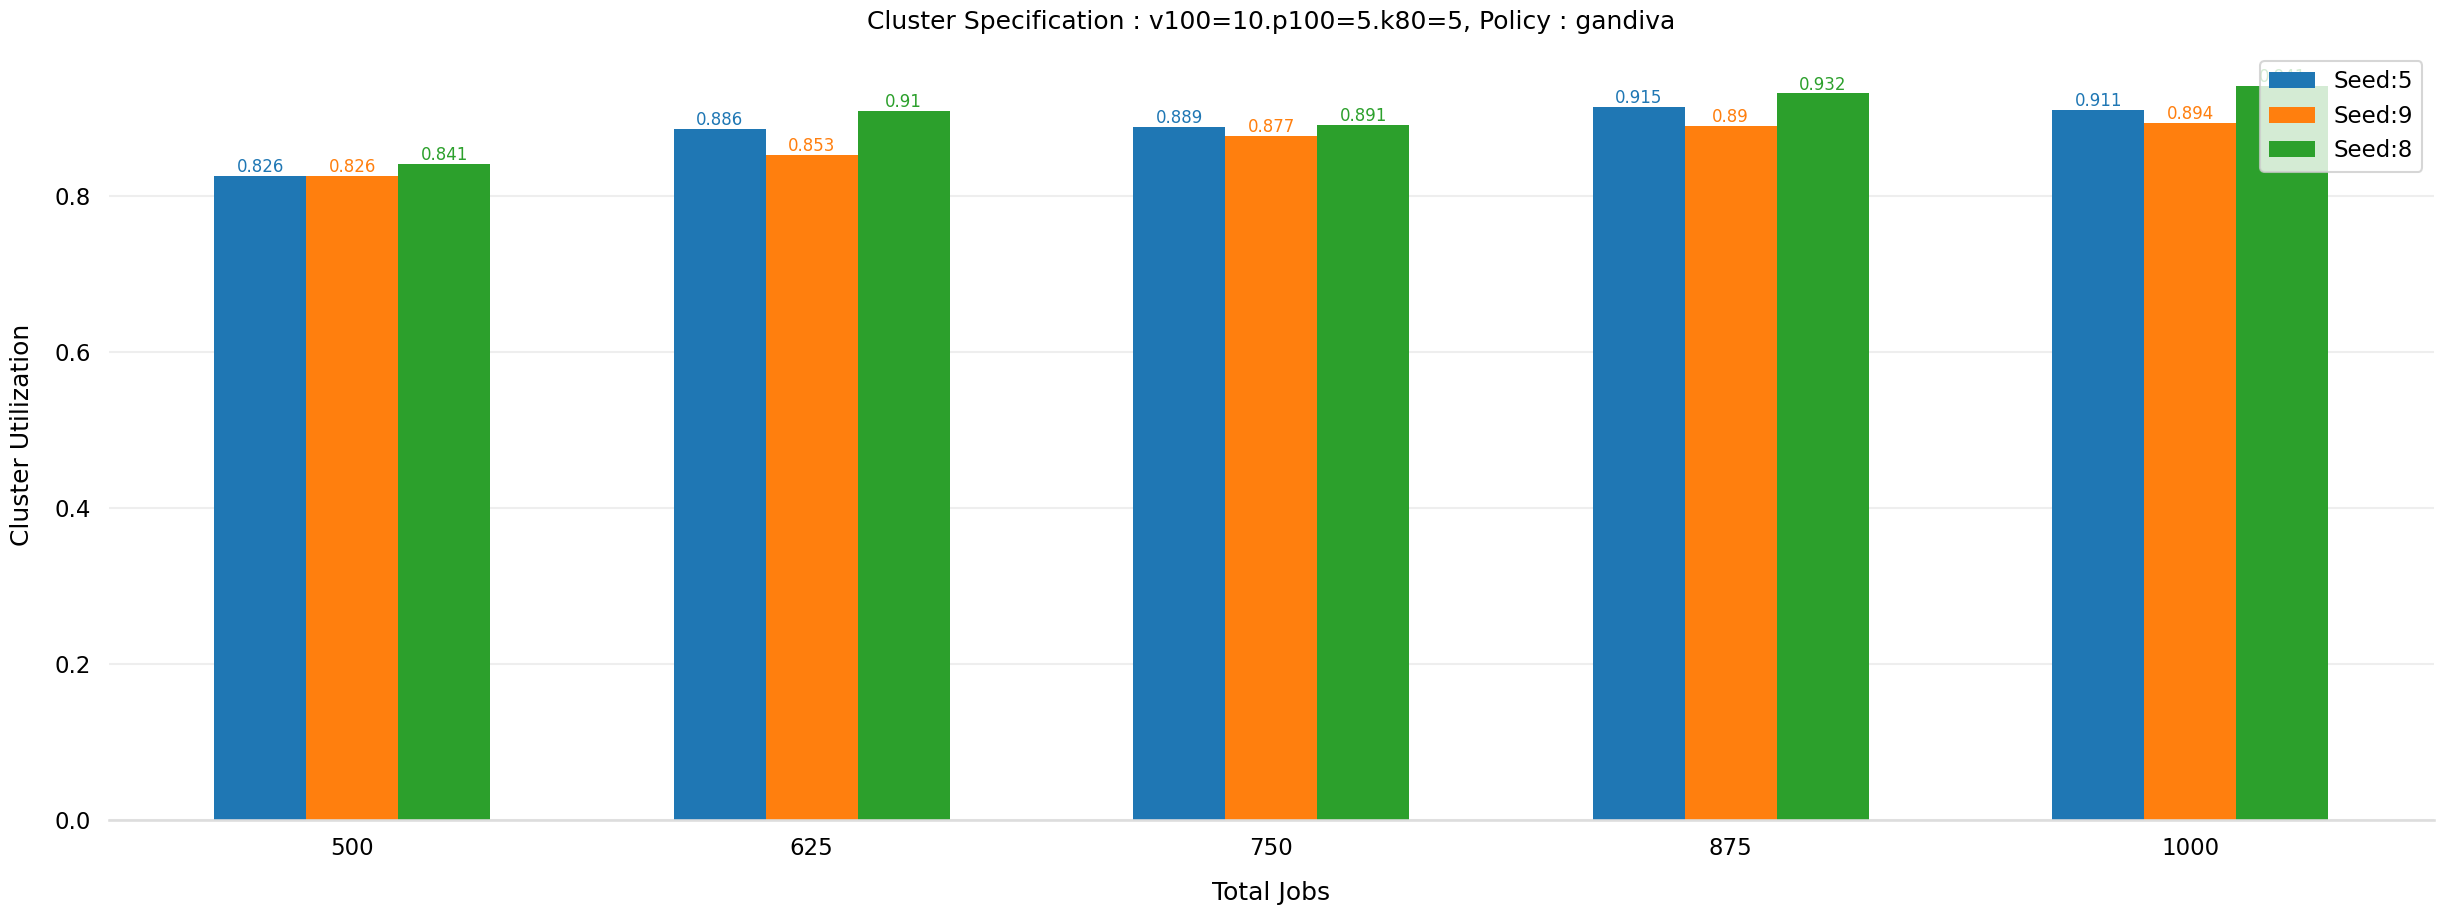

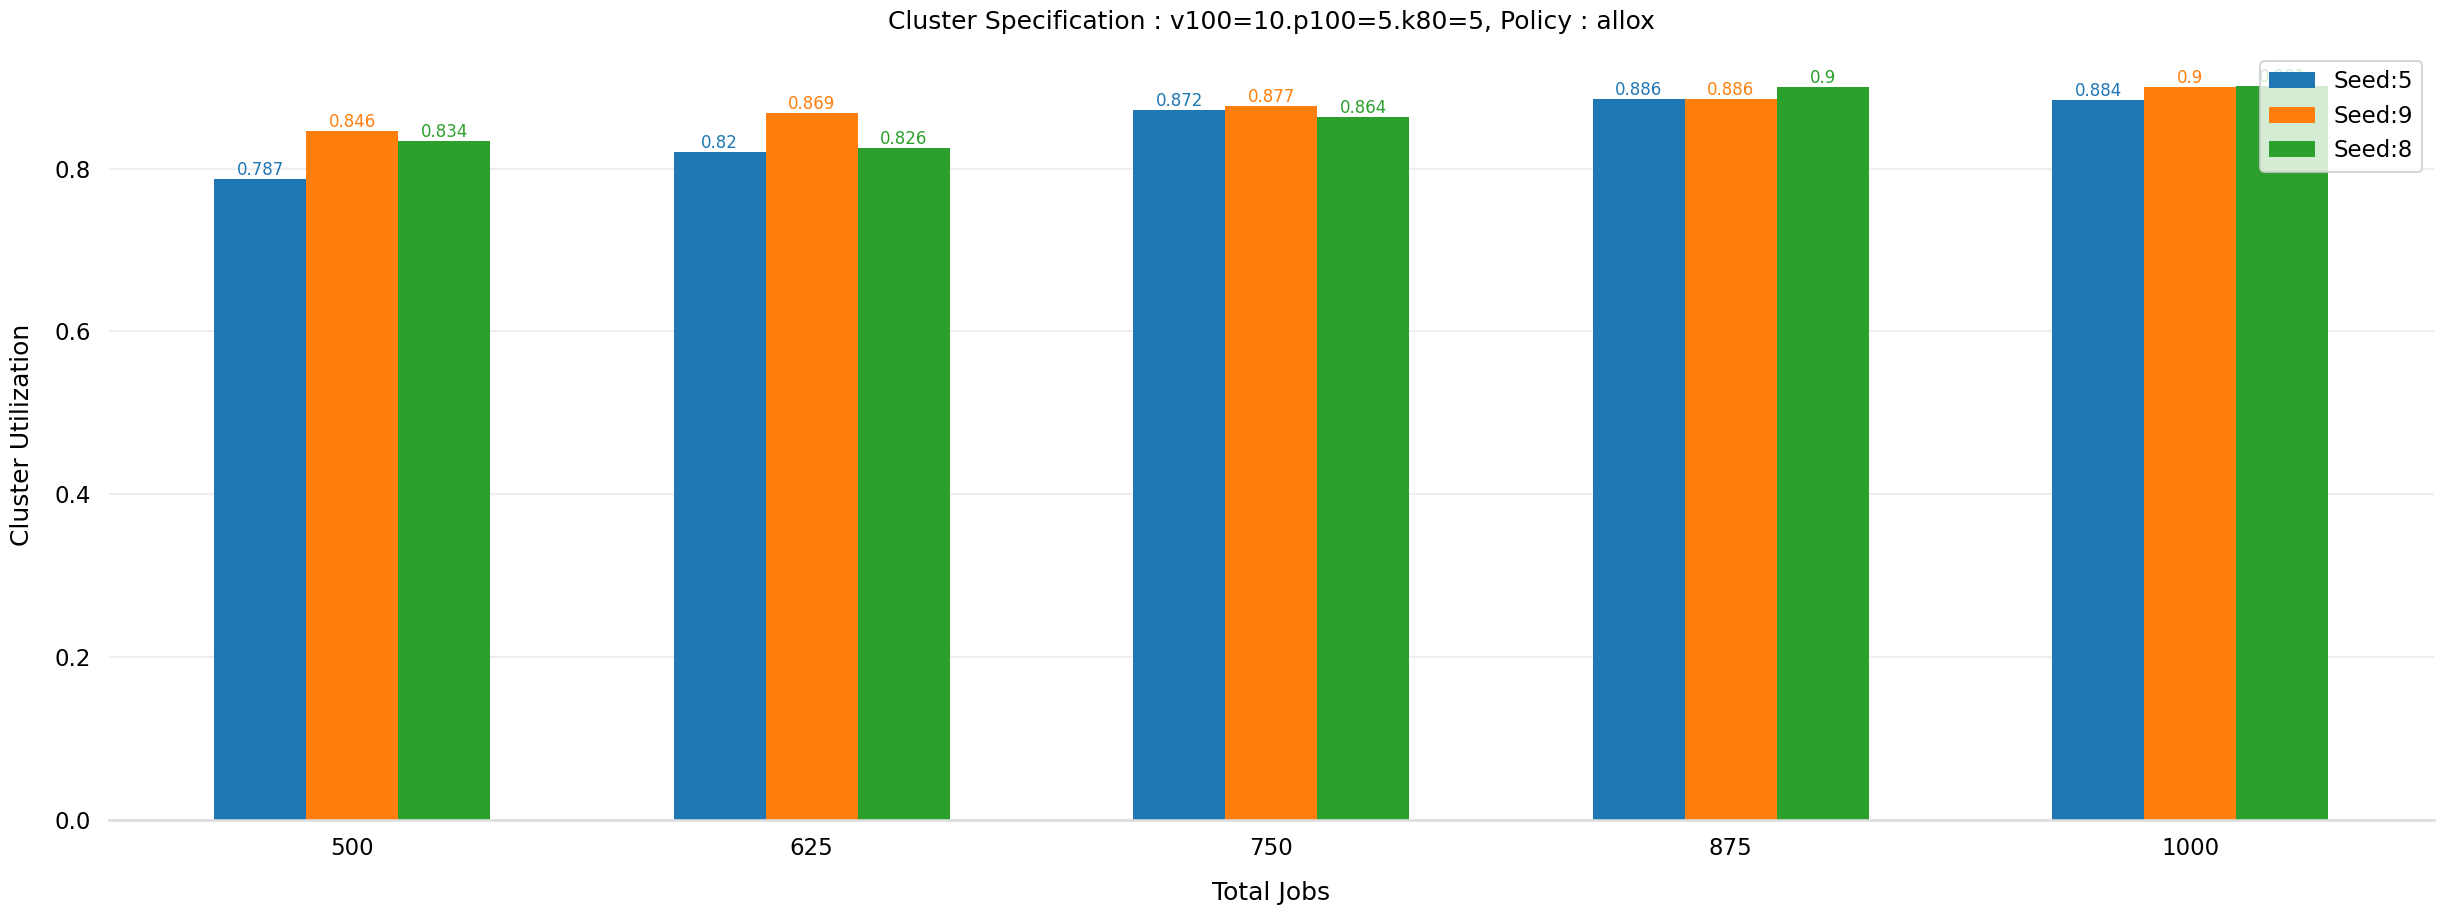

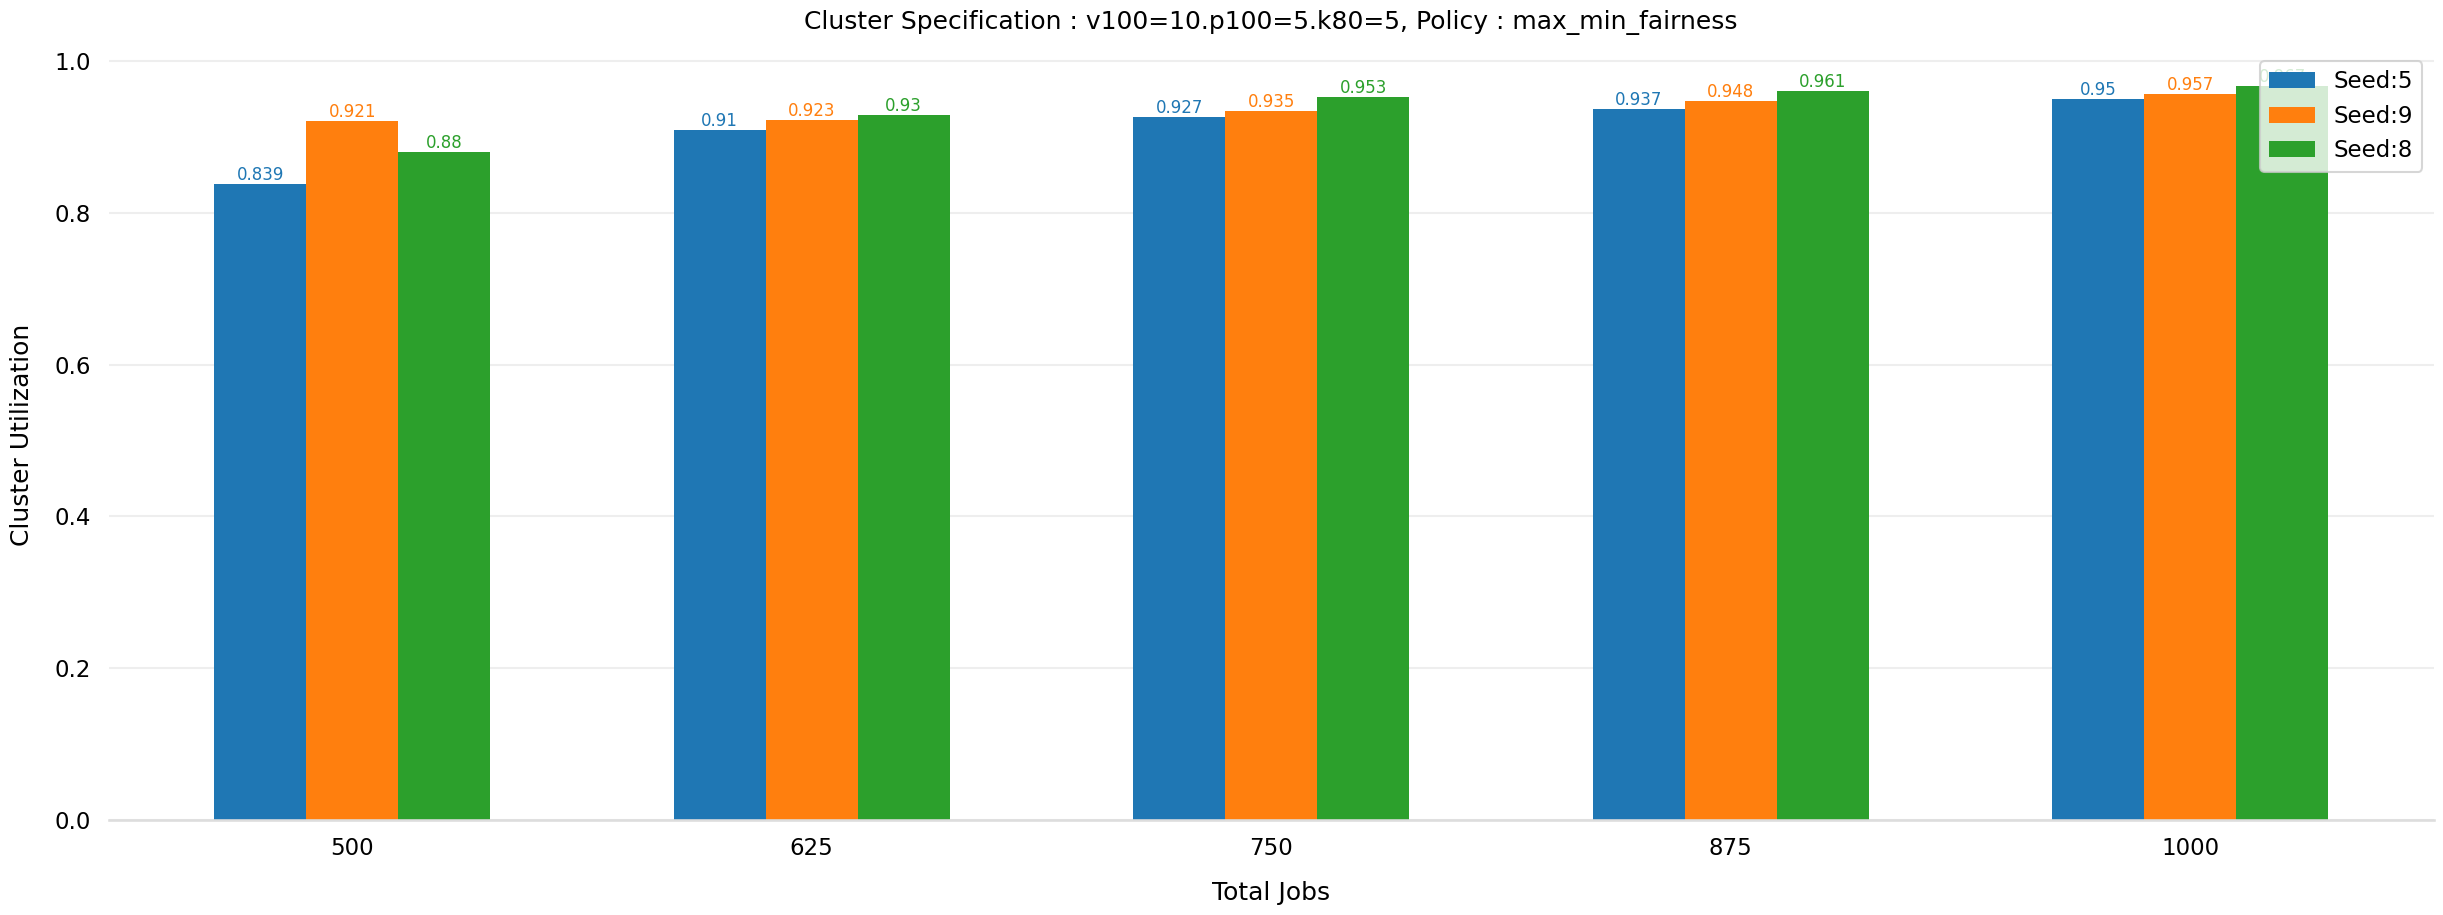

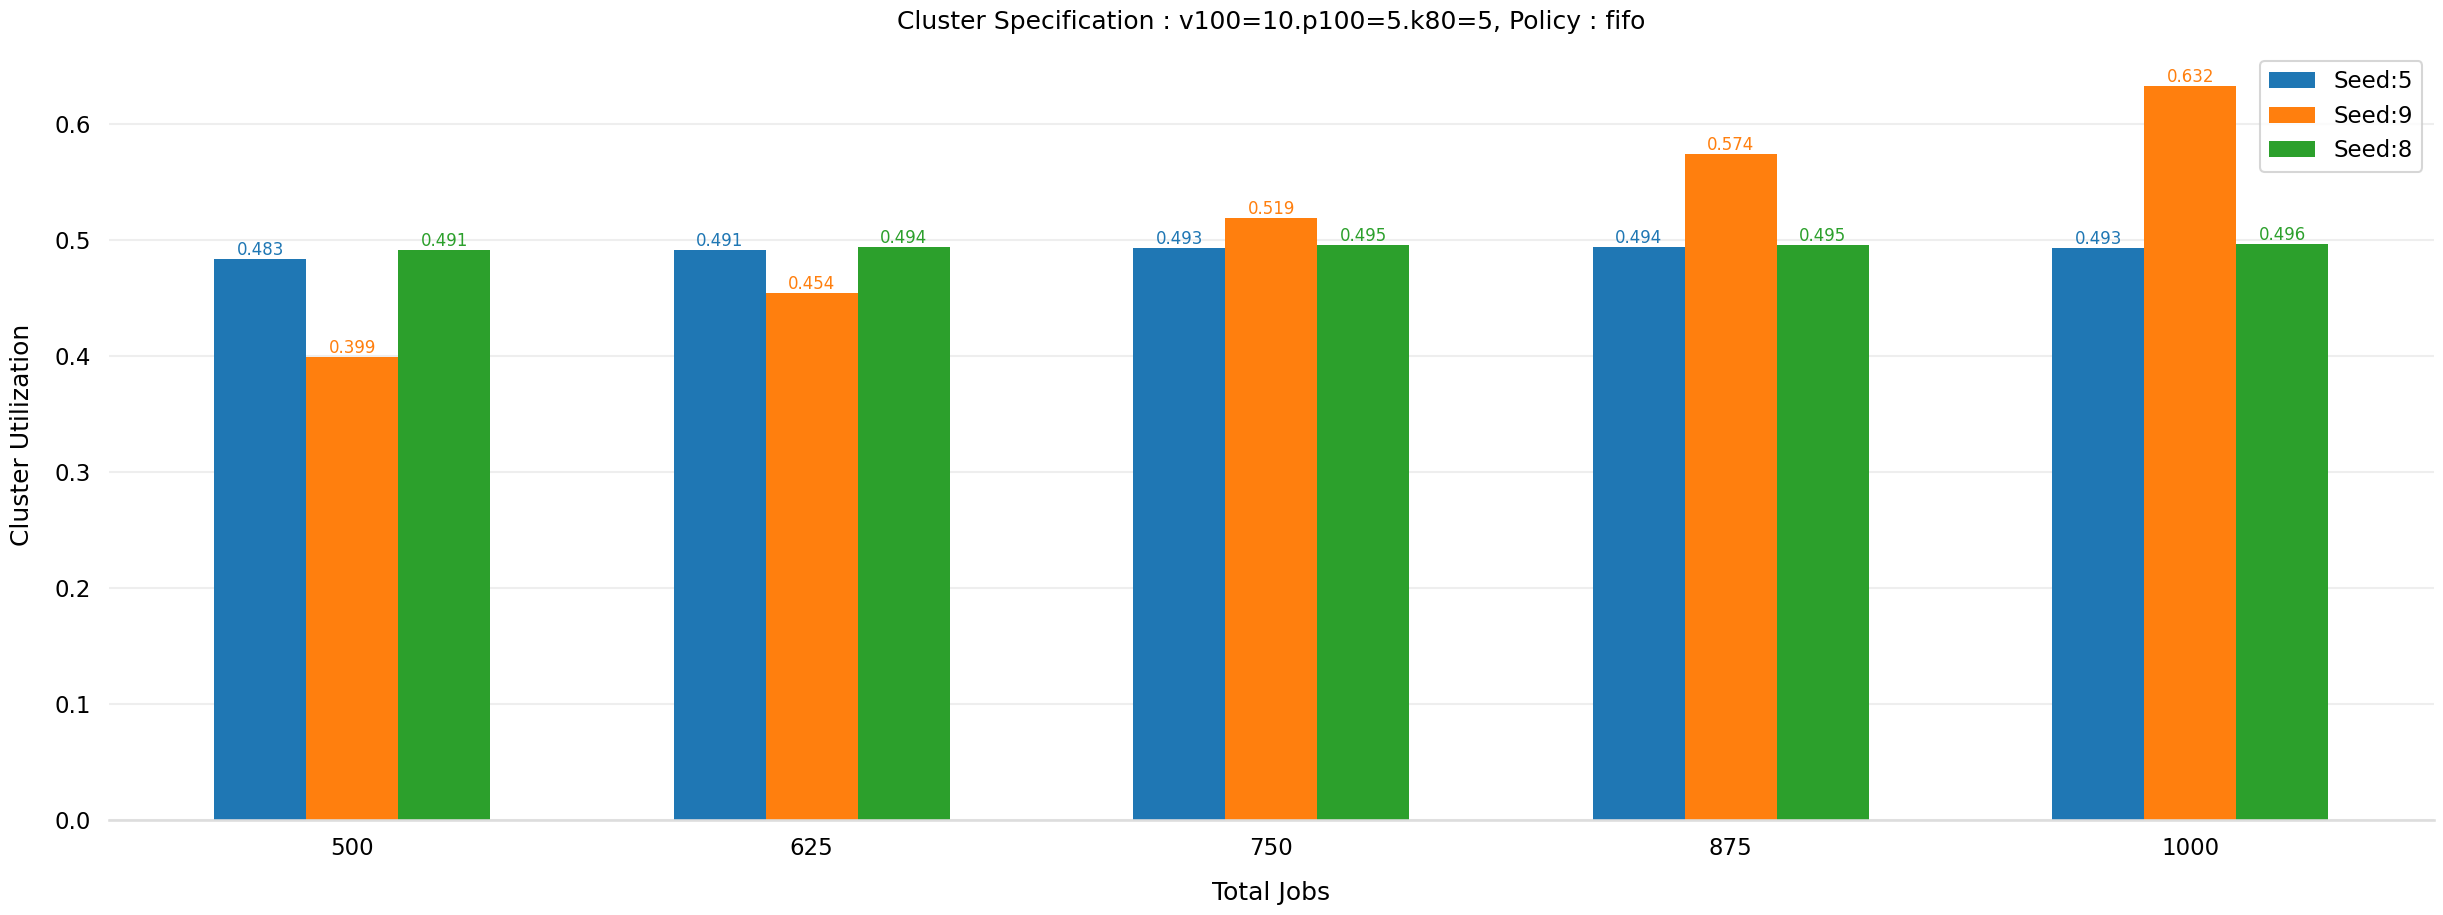

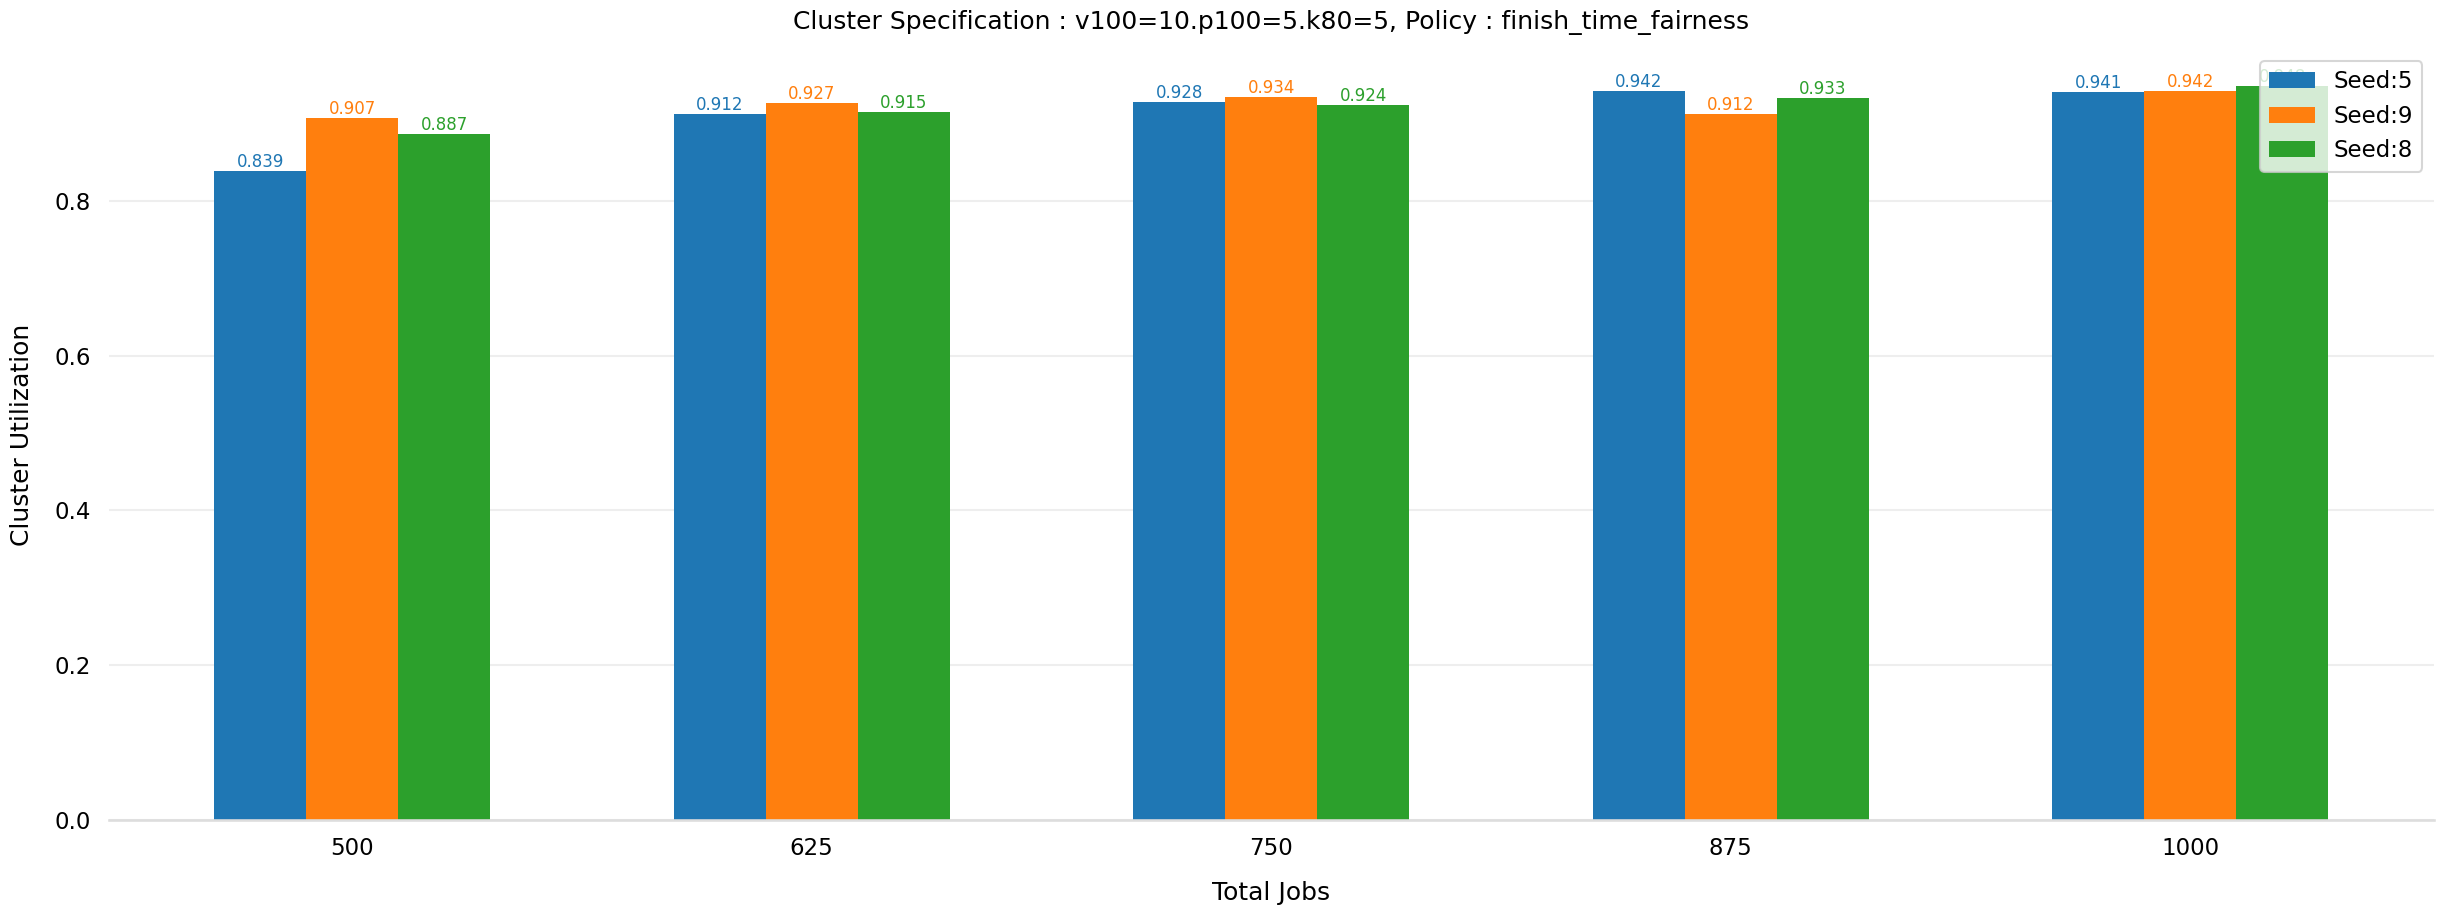

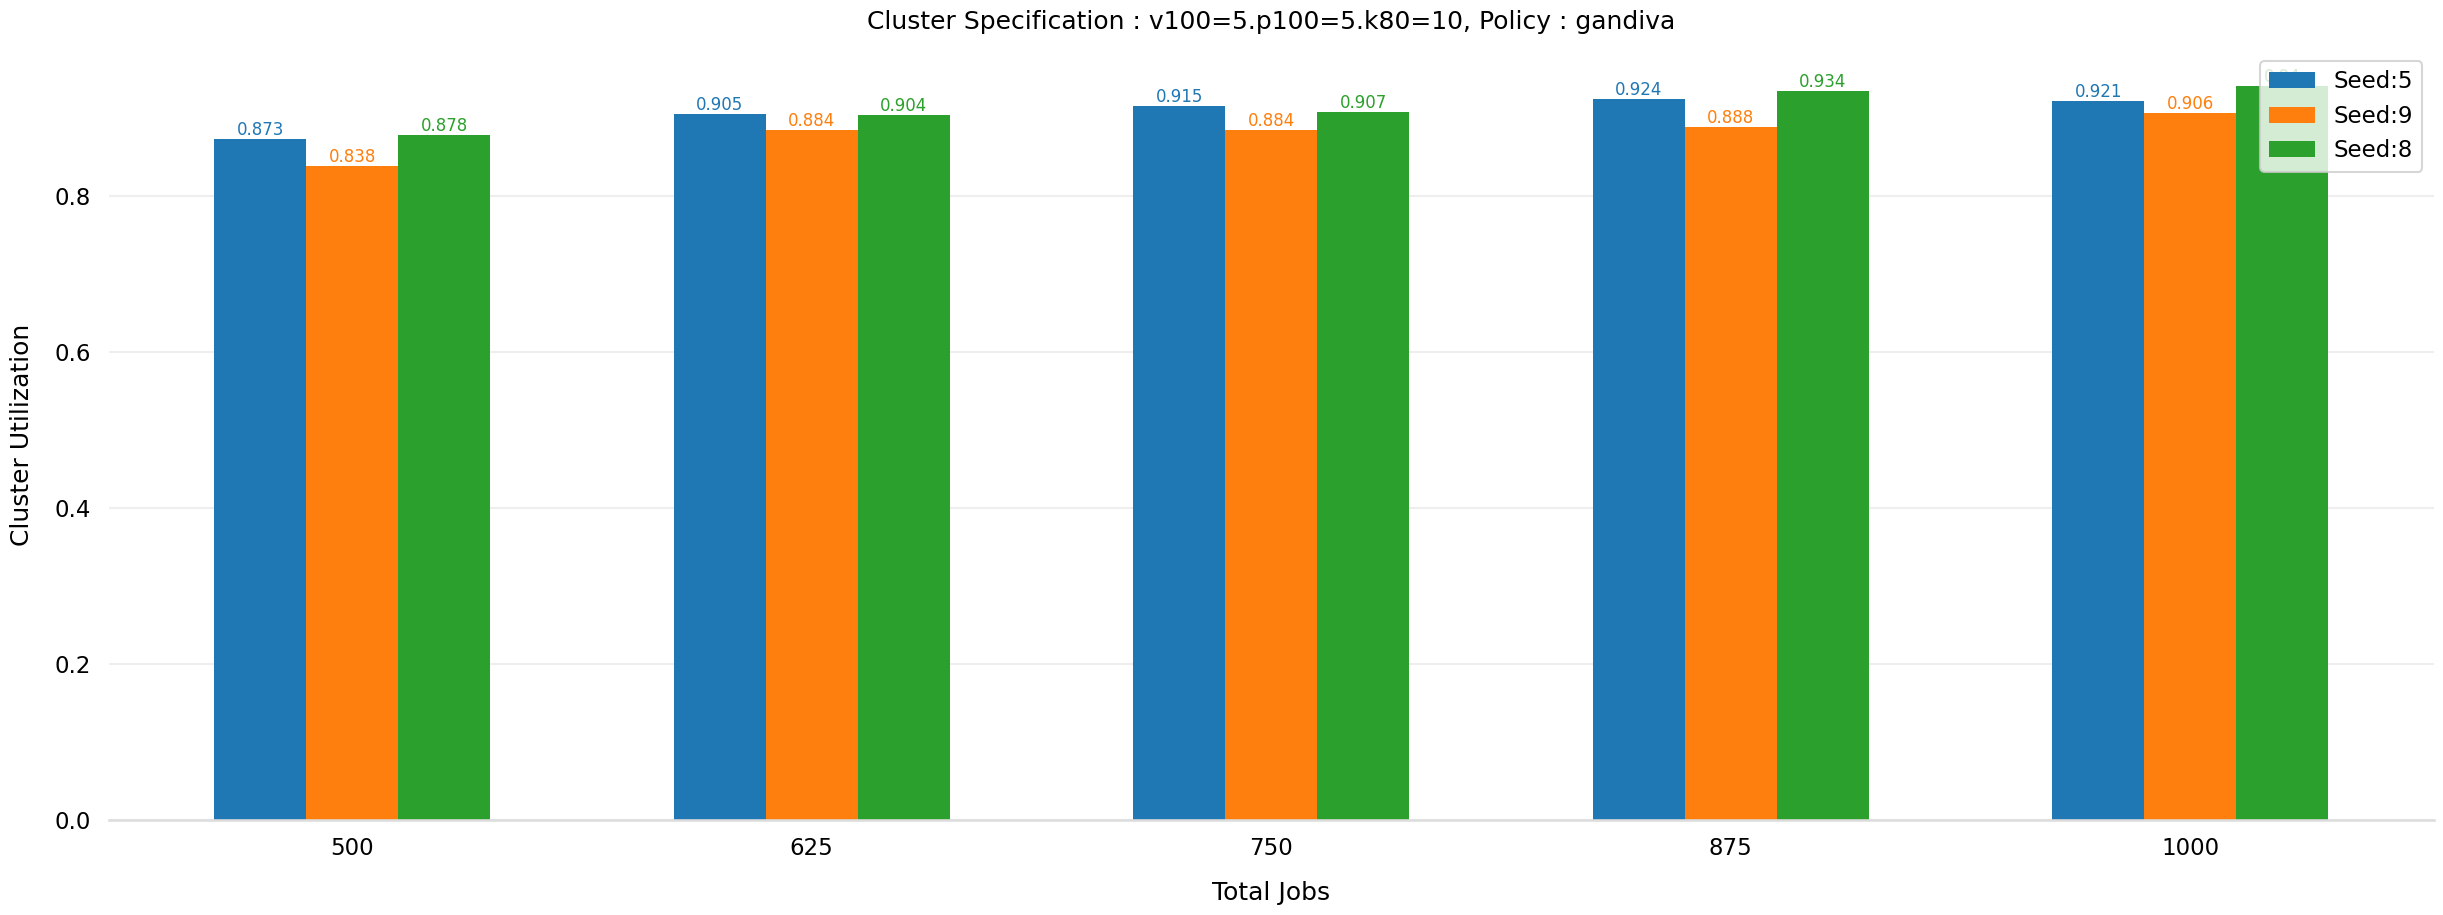

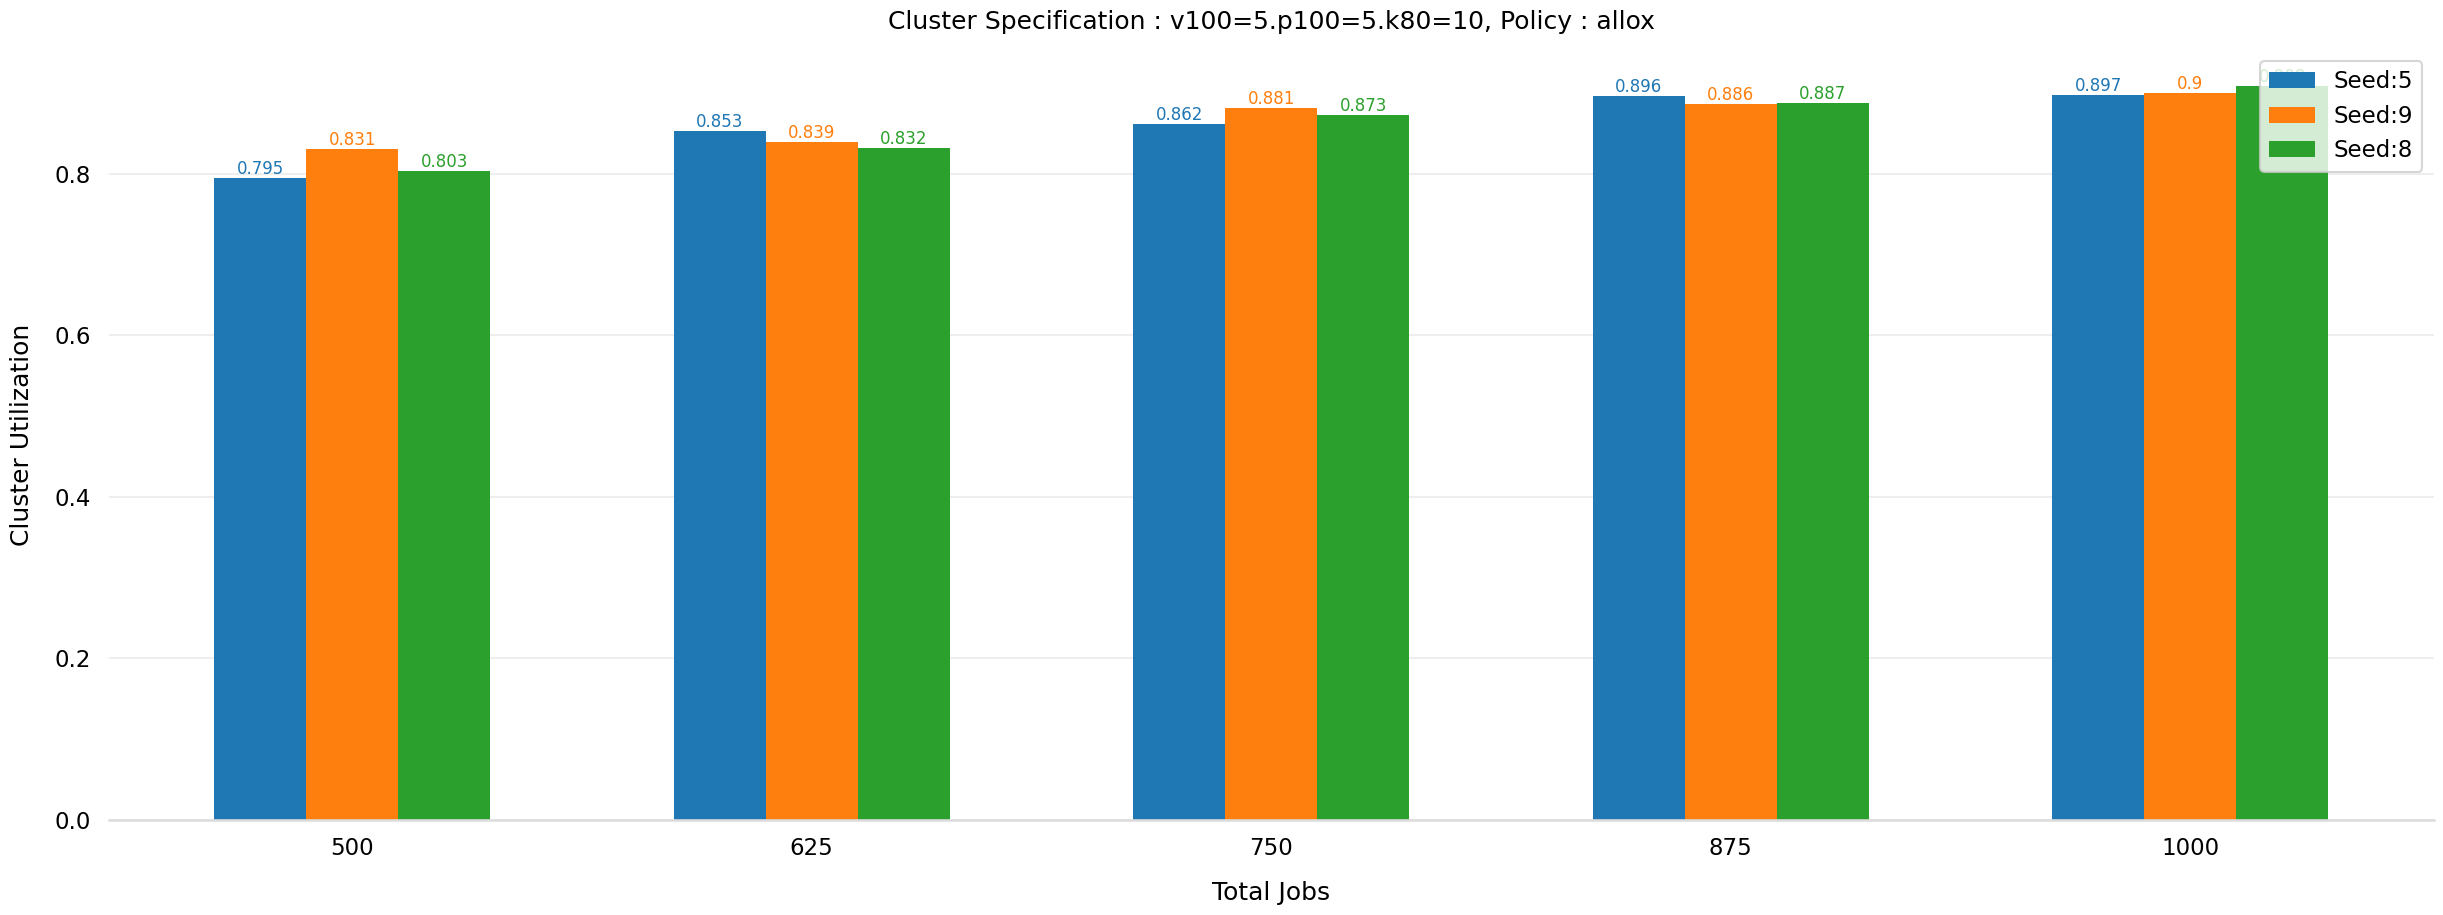

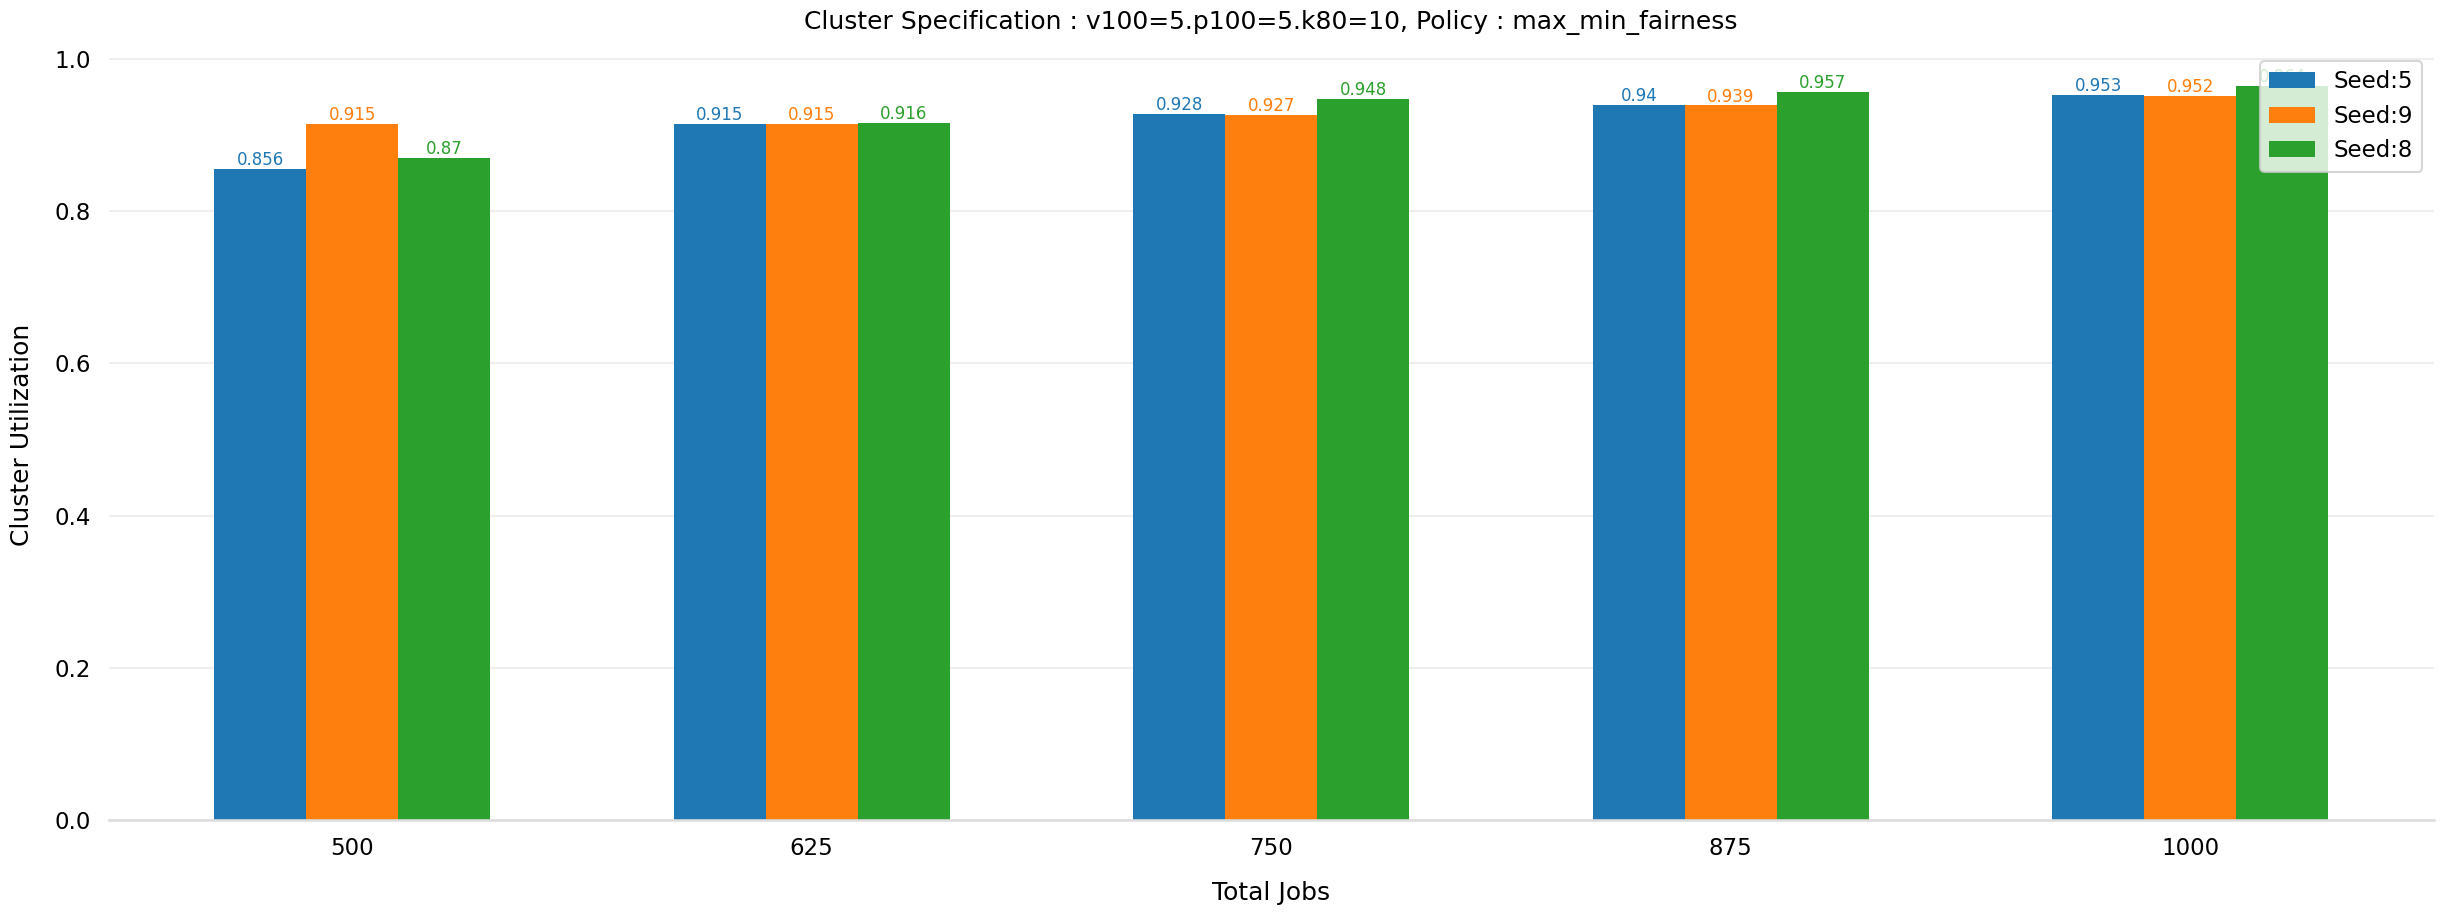

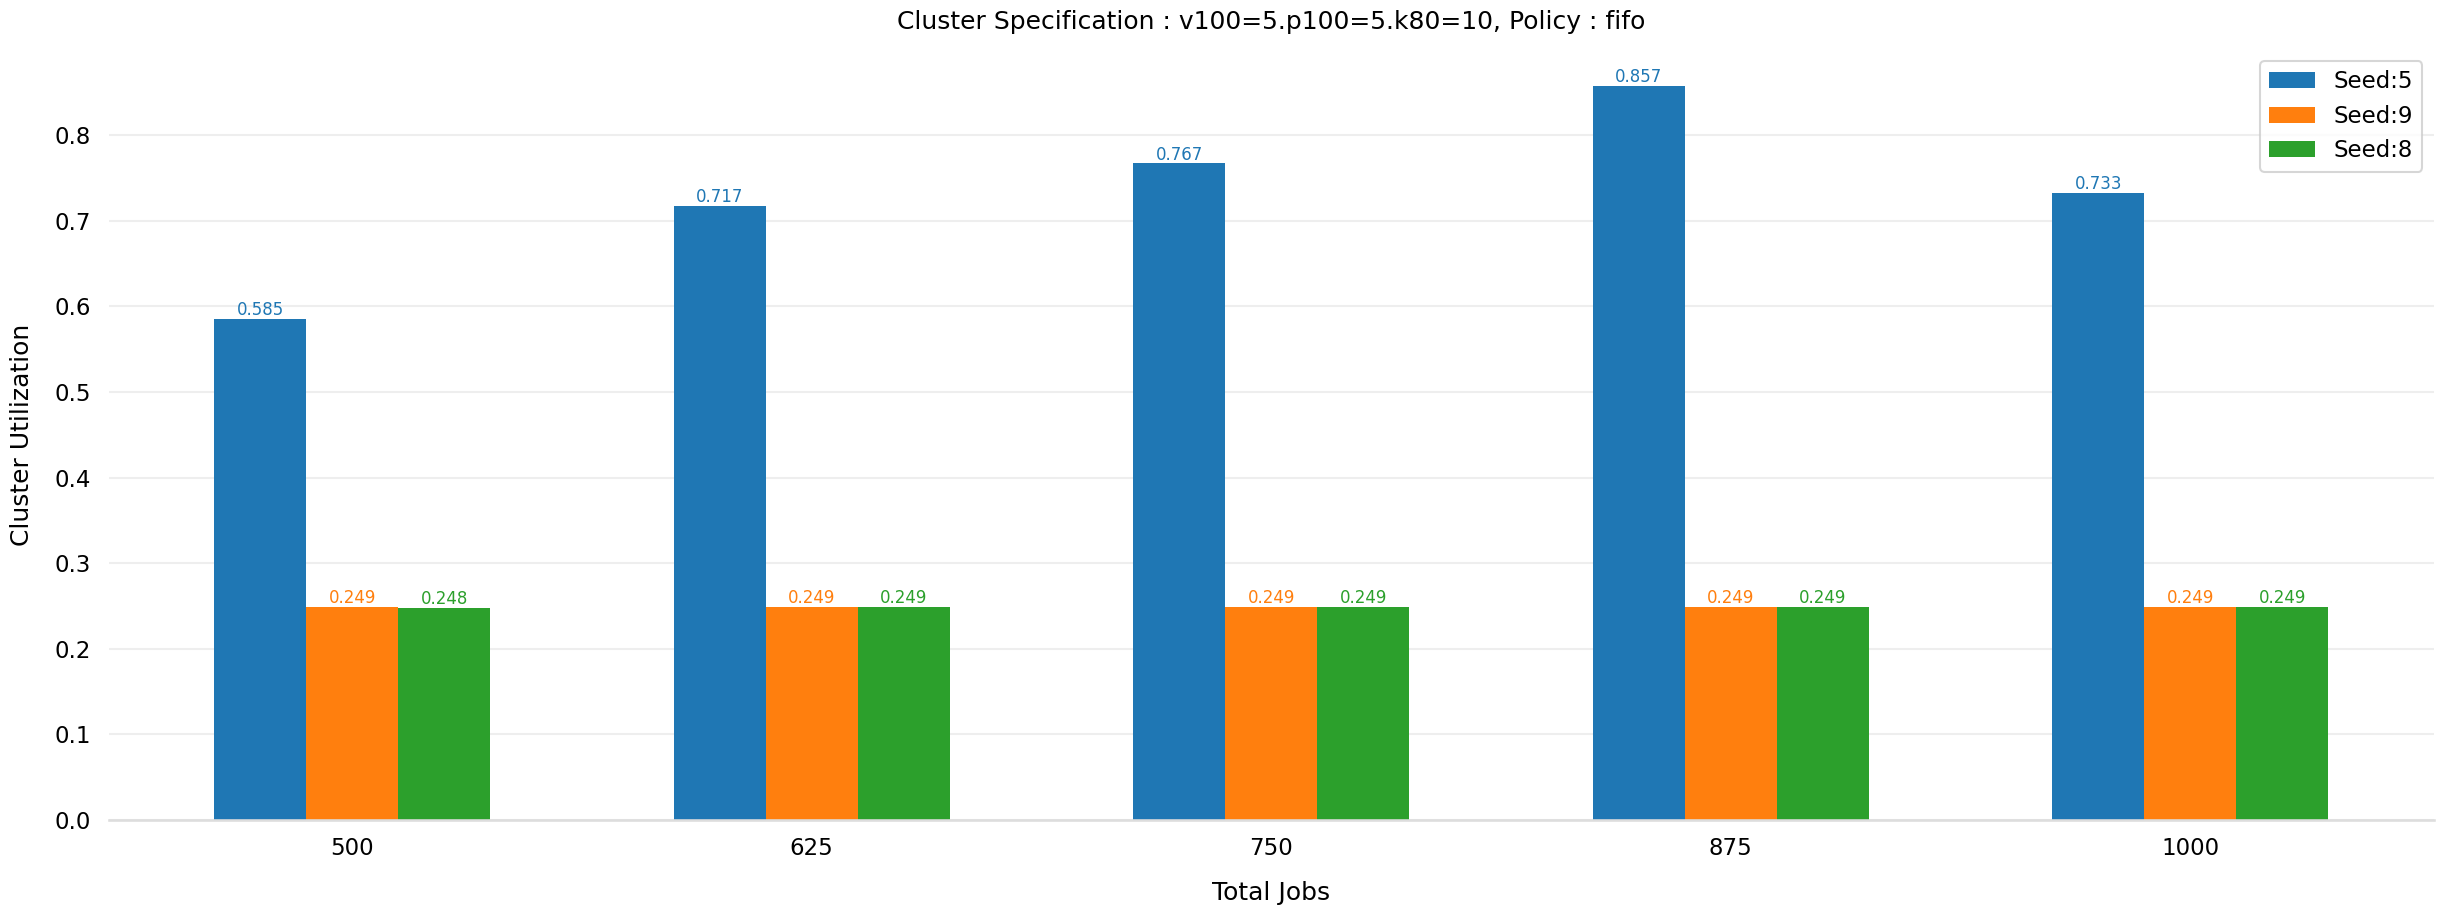

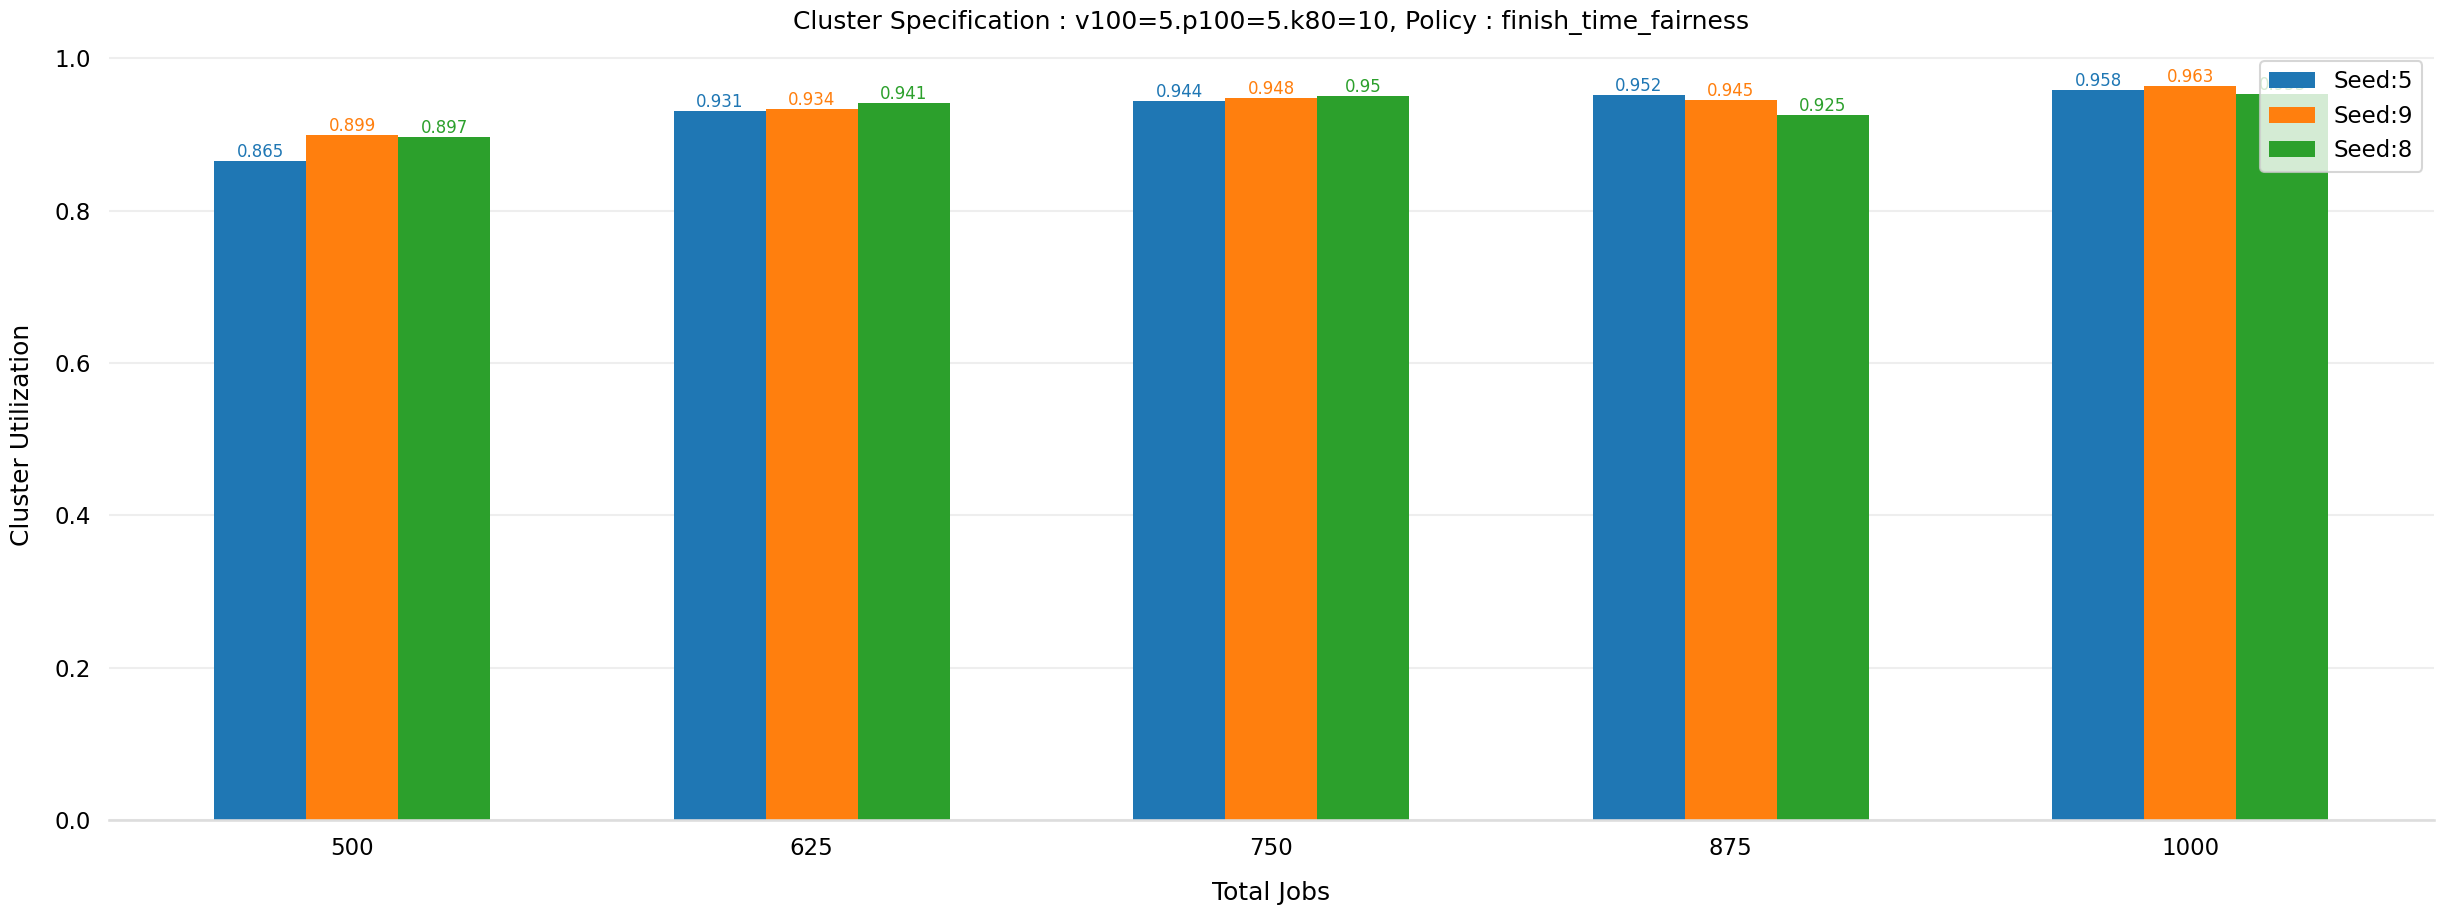

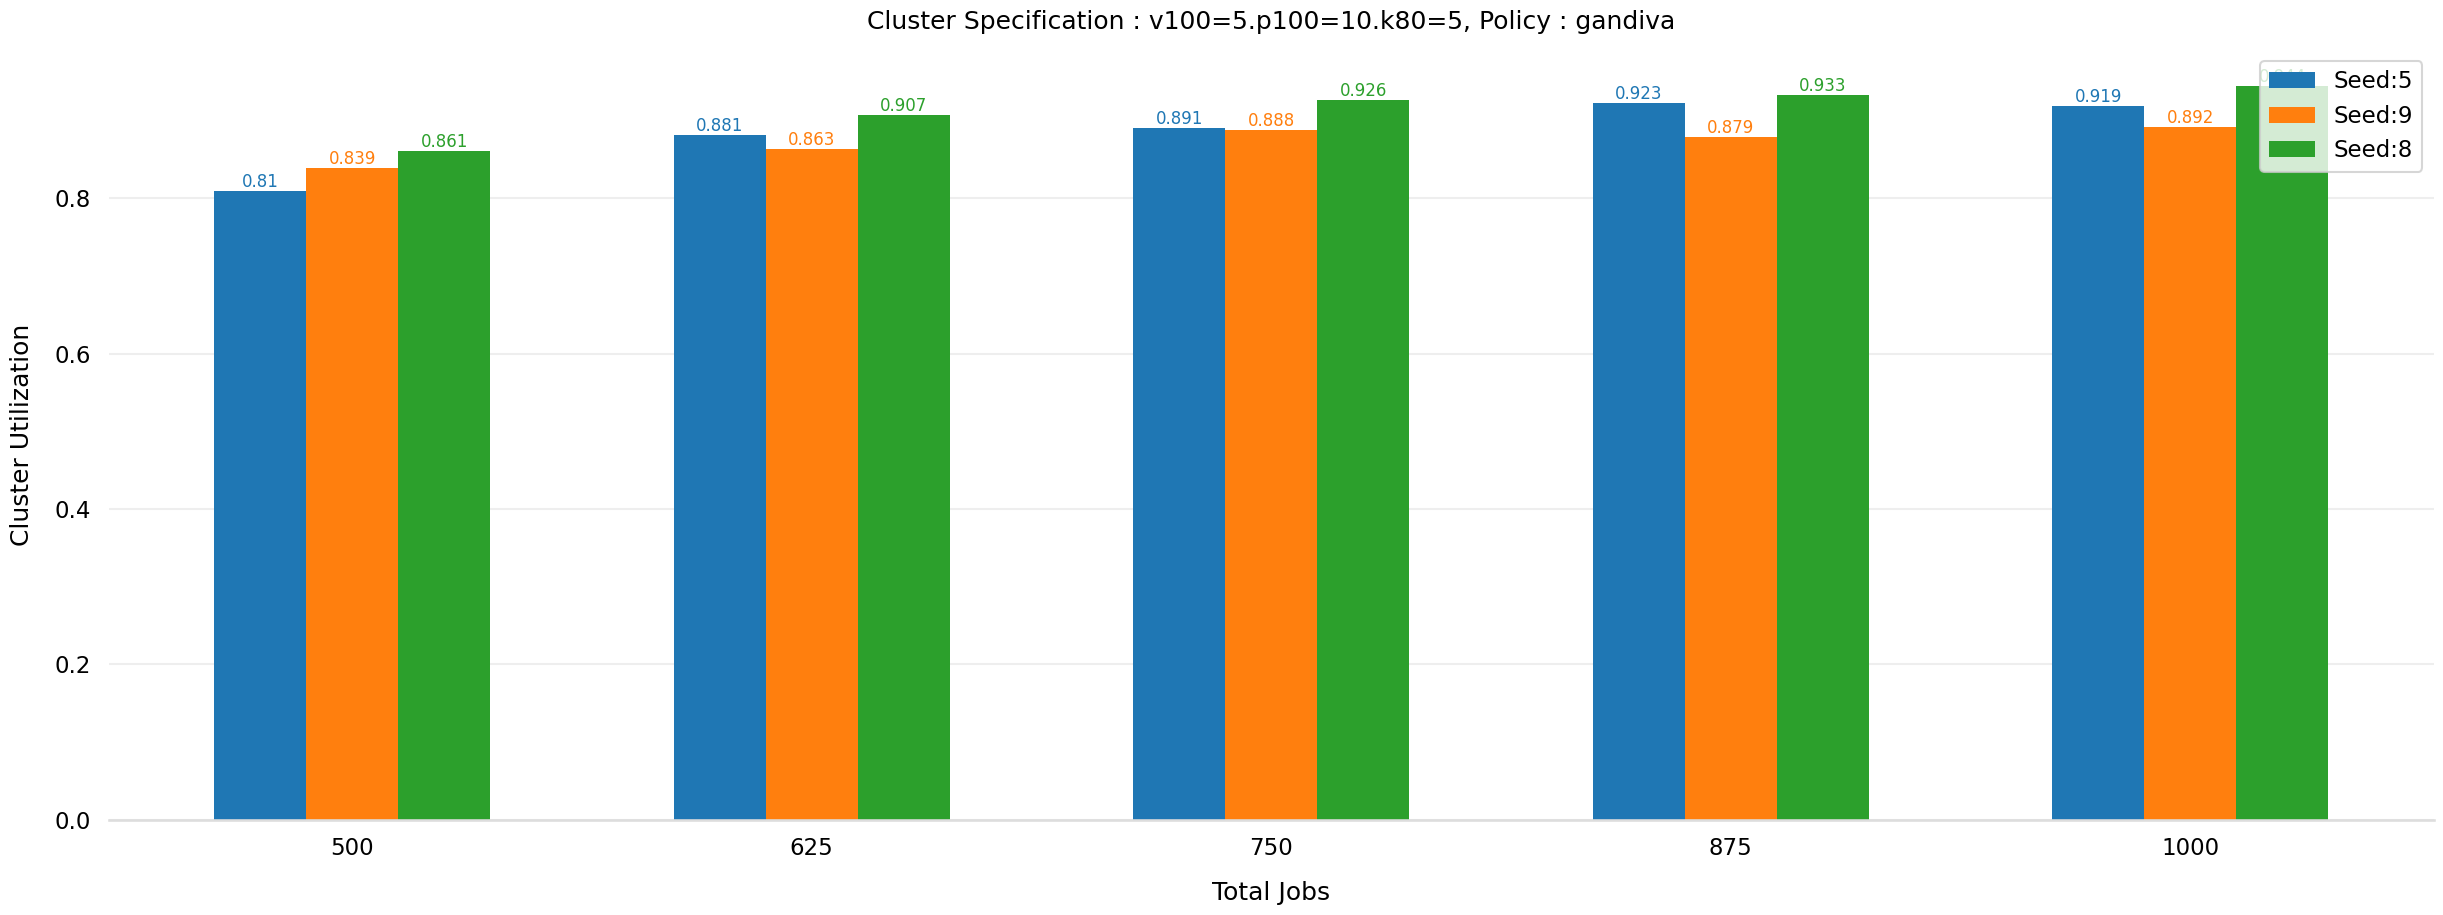

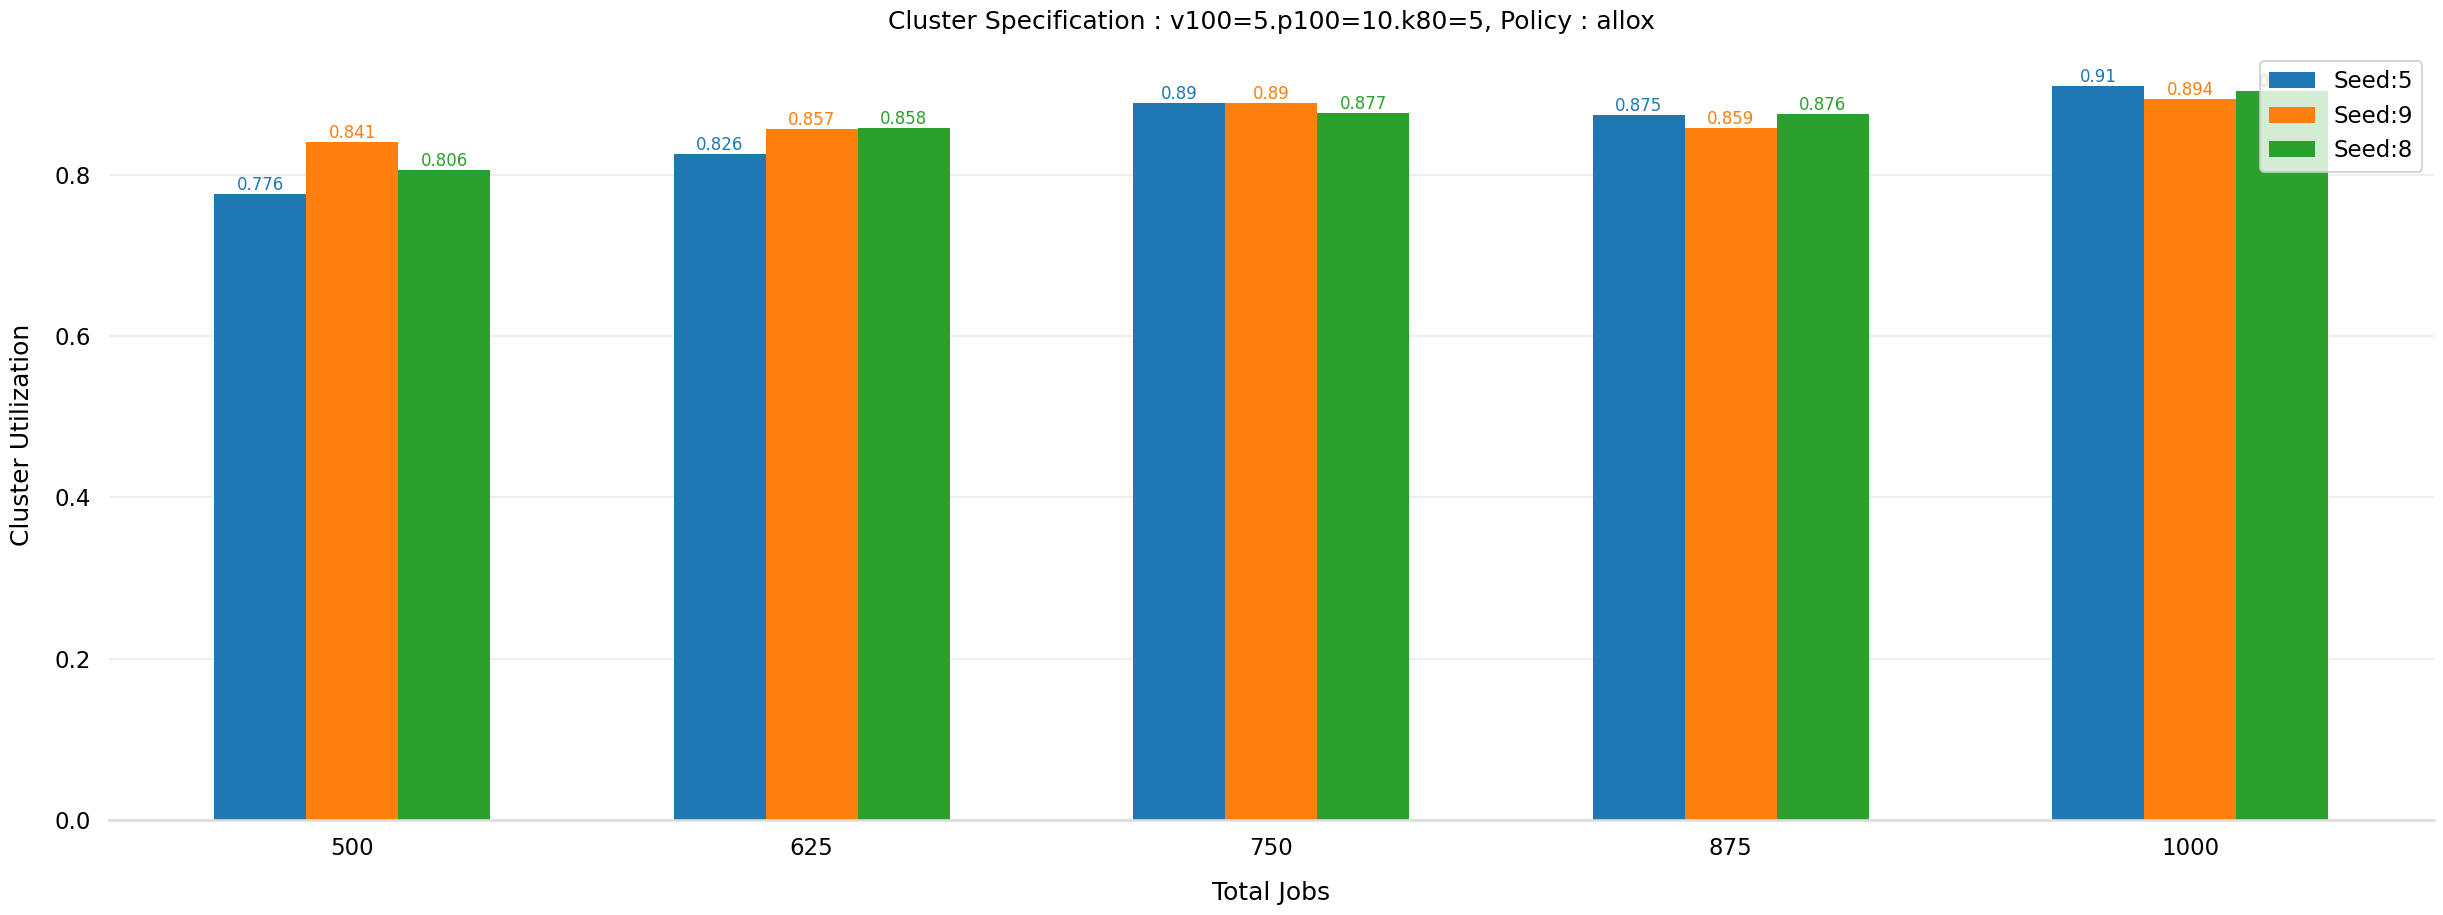

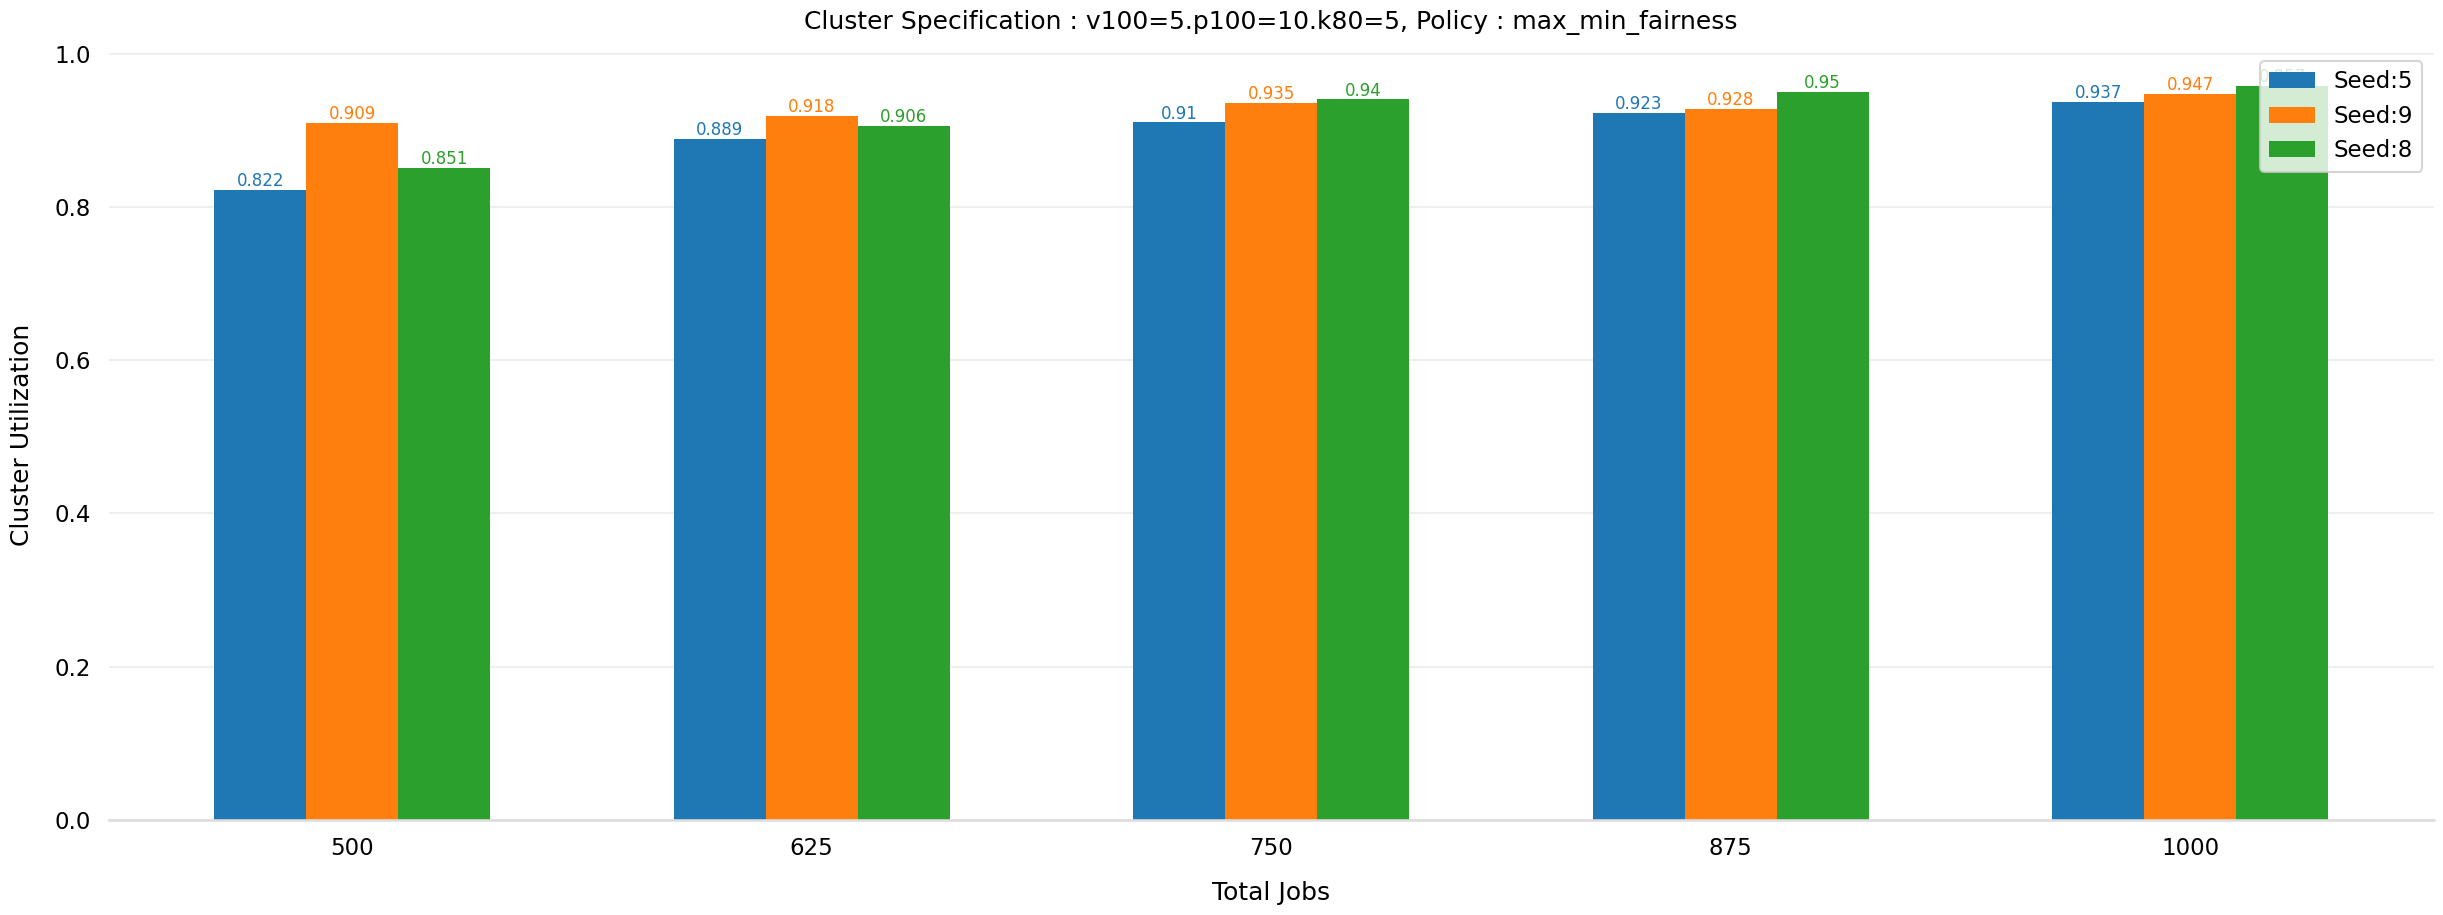

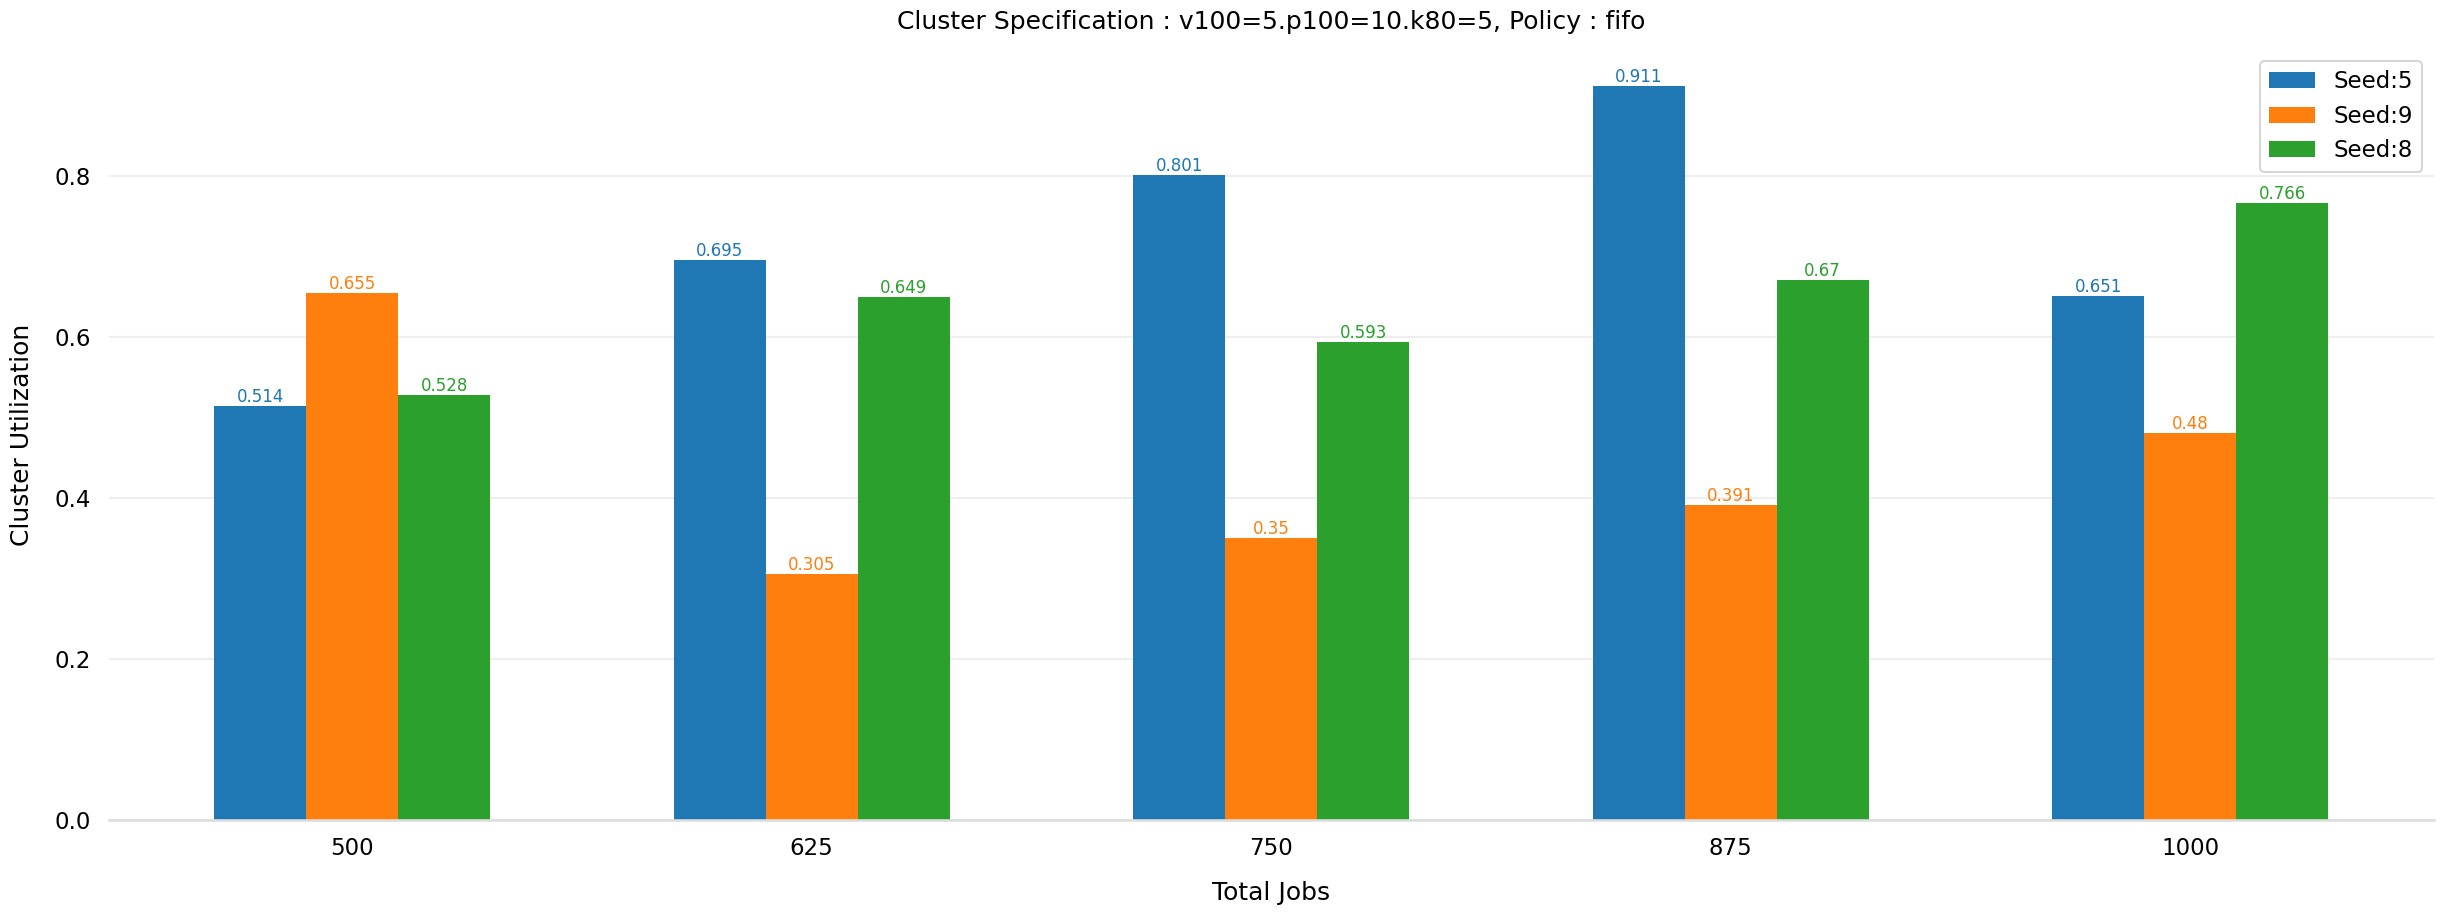

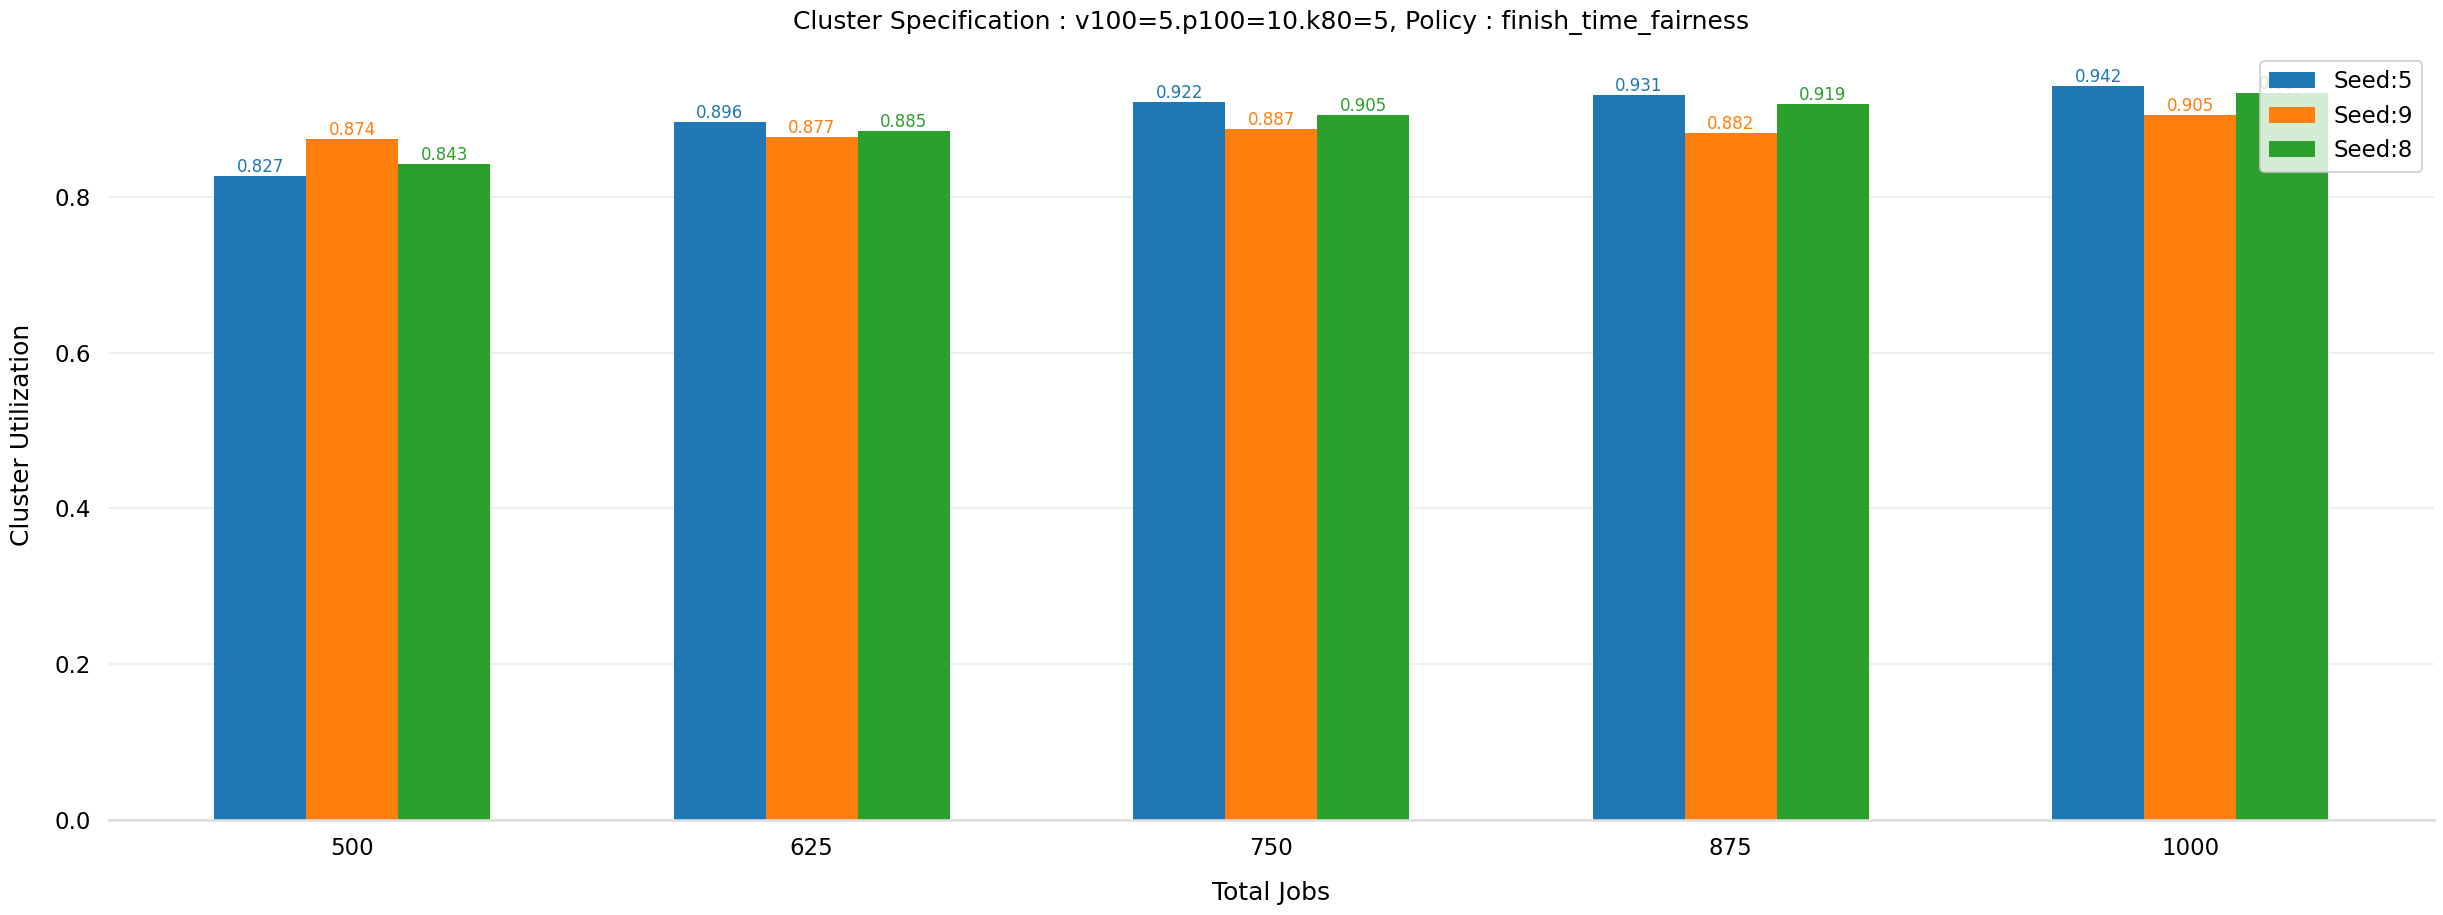

In [6]:
for cluster_spec in df_static["cluster_spec"].unique():
    for policy in df_static["policy"].unique():
        result_int = df_static.query(f'cluster_spec == "{cluster_spec}" & policy == "{policy}"')
        
        no_graphs = len(result_int["seed"].unique())
        
        fig, ax = plt.subplots(figsize=(30,10))
        bar_width = 0.2
        
        for idx, seed in enumerate(result_int["seed"].unique()):
            result = result_int.query(f'seed == {seed}')
            result = result.sort_values("total_jobs")            

            x = np.arange(len(result["total_jobs"].unique()))
            y = [(float(r)) for r in result["utilization"]]

            ax.bar(x + (bar_width * idx), y, width=bar_width,label=f'Seed:{seed}')
            ax.set_xticks(x + (no_graphs - 1) * (bar_width / 2))
            ax.set_xticklabels(result["total_jobs"].unique())

        ax.legend(loc ="upper right")

        ax.set_xlabel('Total Jobs', labelpad=15)
        ax.set_ylabel('Cluster Utilization', labelpad=15)
        ax.set_title(f'Cluster Specification : {cluster_spec}, Policy : {policy}', pad=15)
        
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['bottom'].set_color('#DDDDDD')
        ax.tick_params(bottom=False, left=False)
        ax.set_axisbelow(True)
        
        ax.yaxis.grid(True, color='#EEEEEE')
        ax.xaxis.grid(False)

        # For each bar in the chart, add a text label.
        for bar in ax.patches:
        # The text annotation for each bar should be its height.
            bar_value = bar.get_height()
            # Format the text with commas to separate thousands. You can do
            # any type of formatting here though.
            text = f'{bar_value:,}'
            # This will give the middle of each bar on the x-axis.
            text_x = bar.get_x() + bar.get_width() / 2
            # get_y() is where the bar starts so we add the height to it.
            text_y = bar.get_y() + bar_value
            # If we want the text to be the same color as the bar, we can
            # get the color like so:
            bar_color = bar.get_facecolor()
            # If you want a consistent color, you can just set it as a constant, e.g. #222222
            ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,
                    size=12)

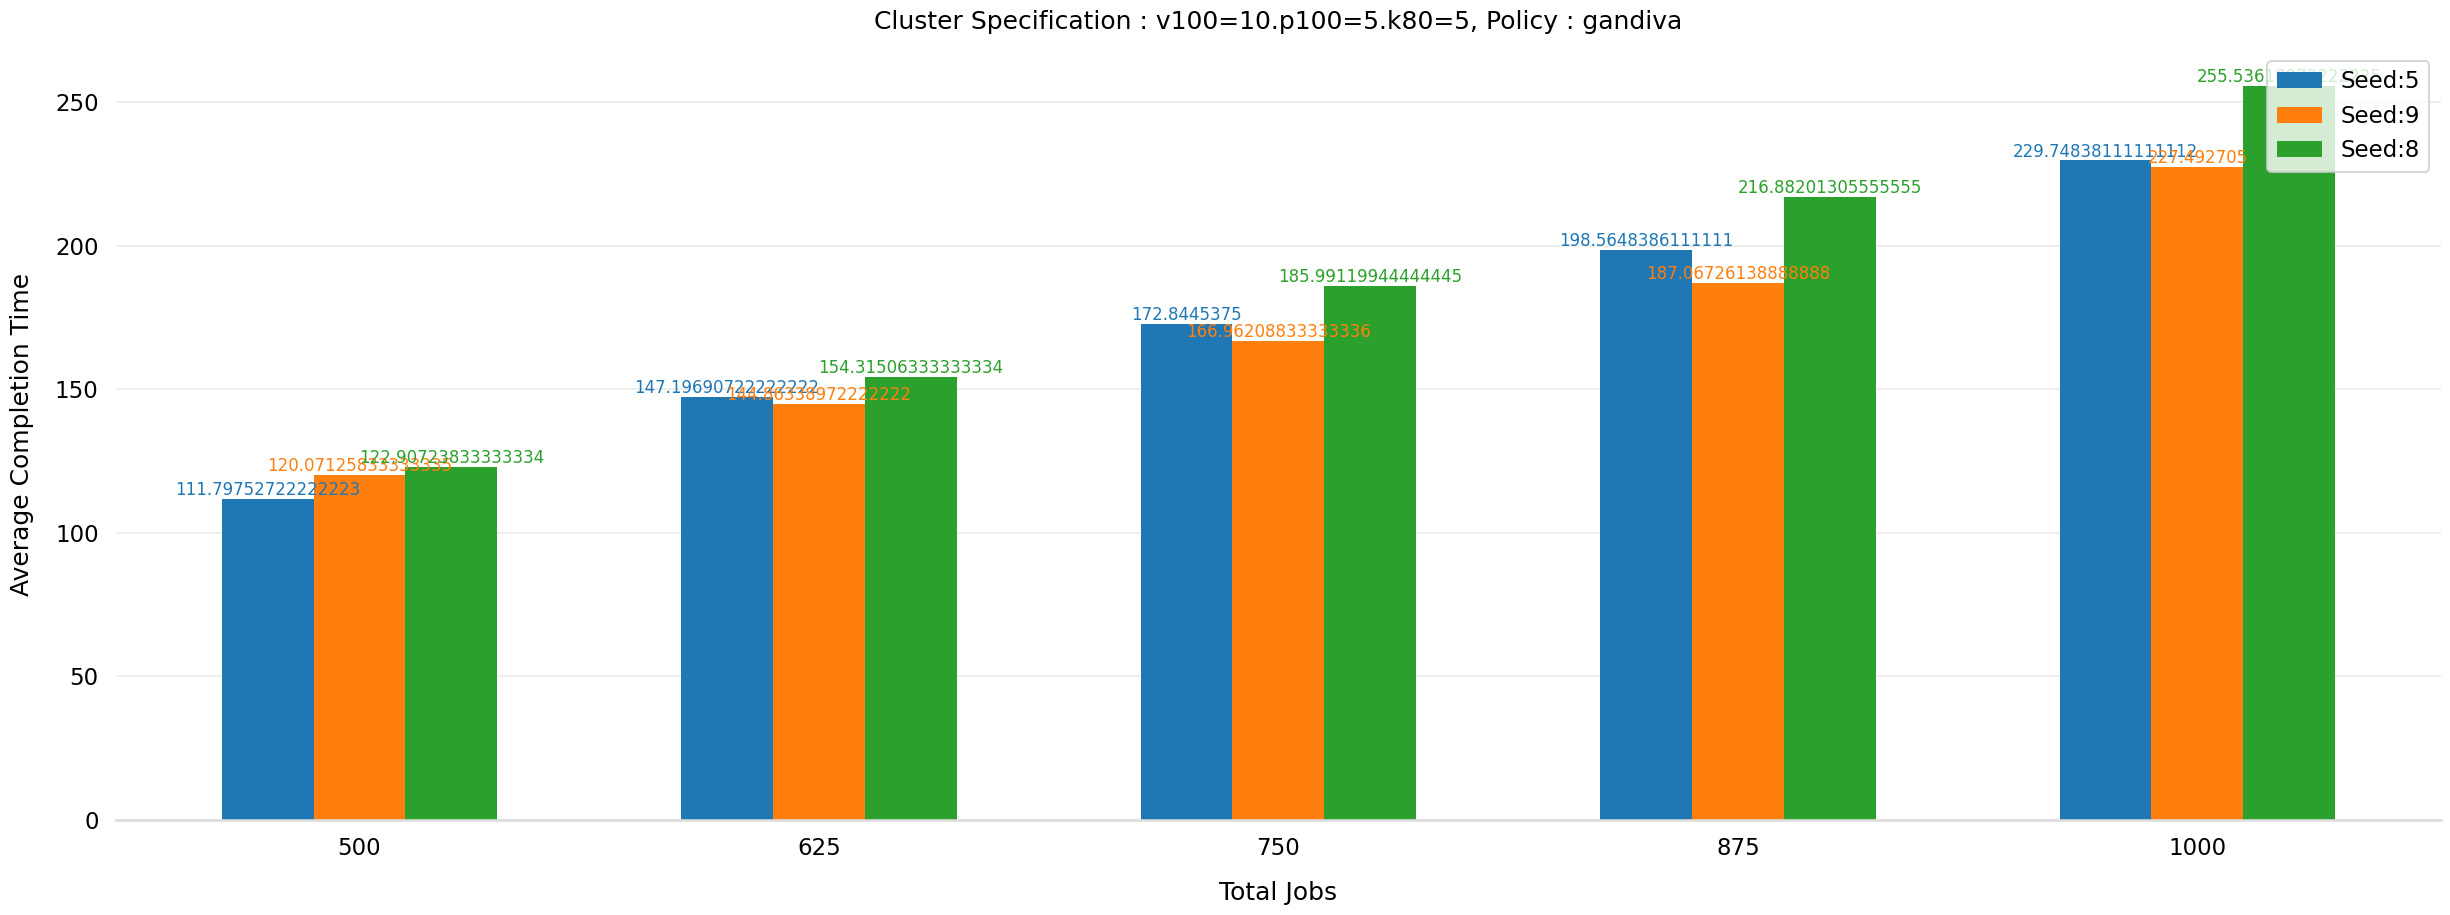

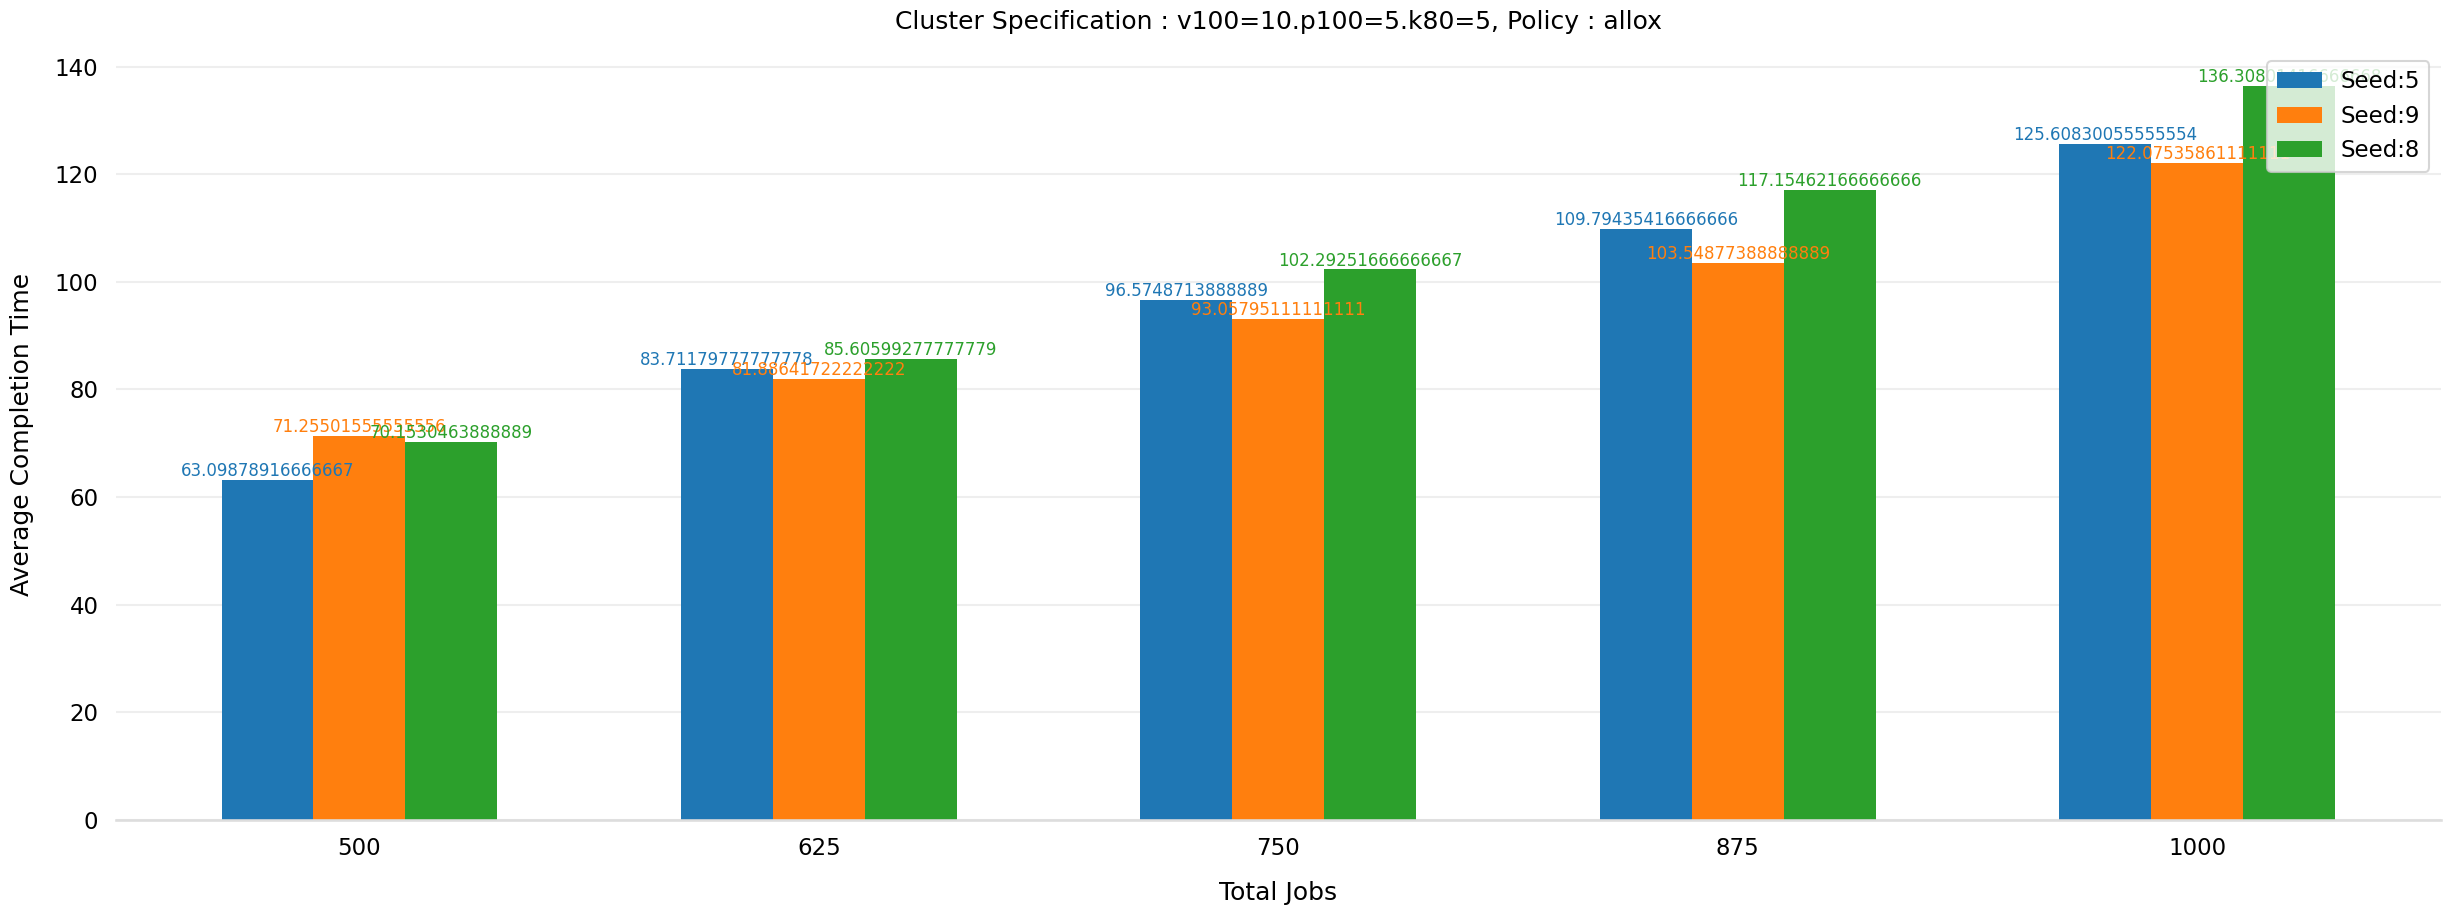

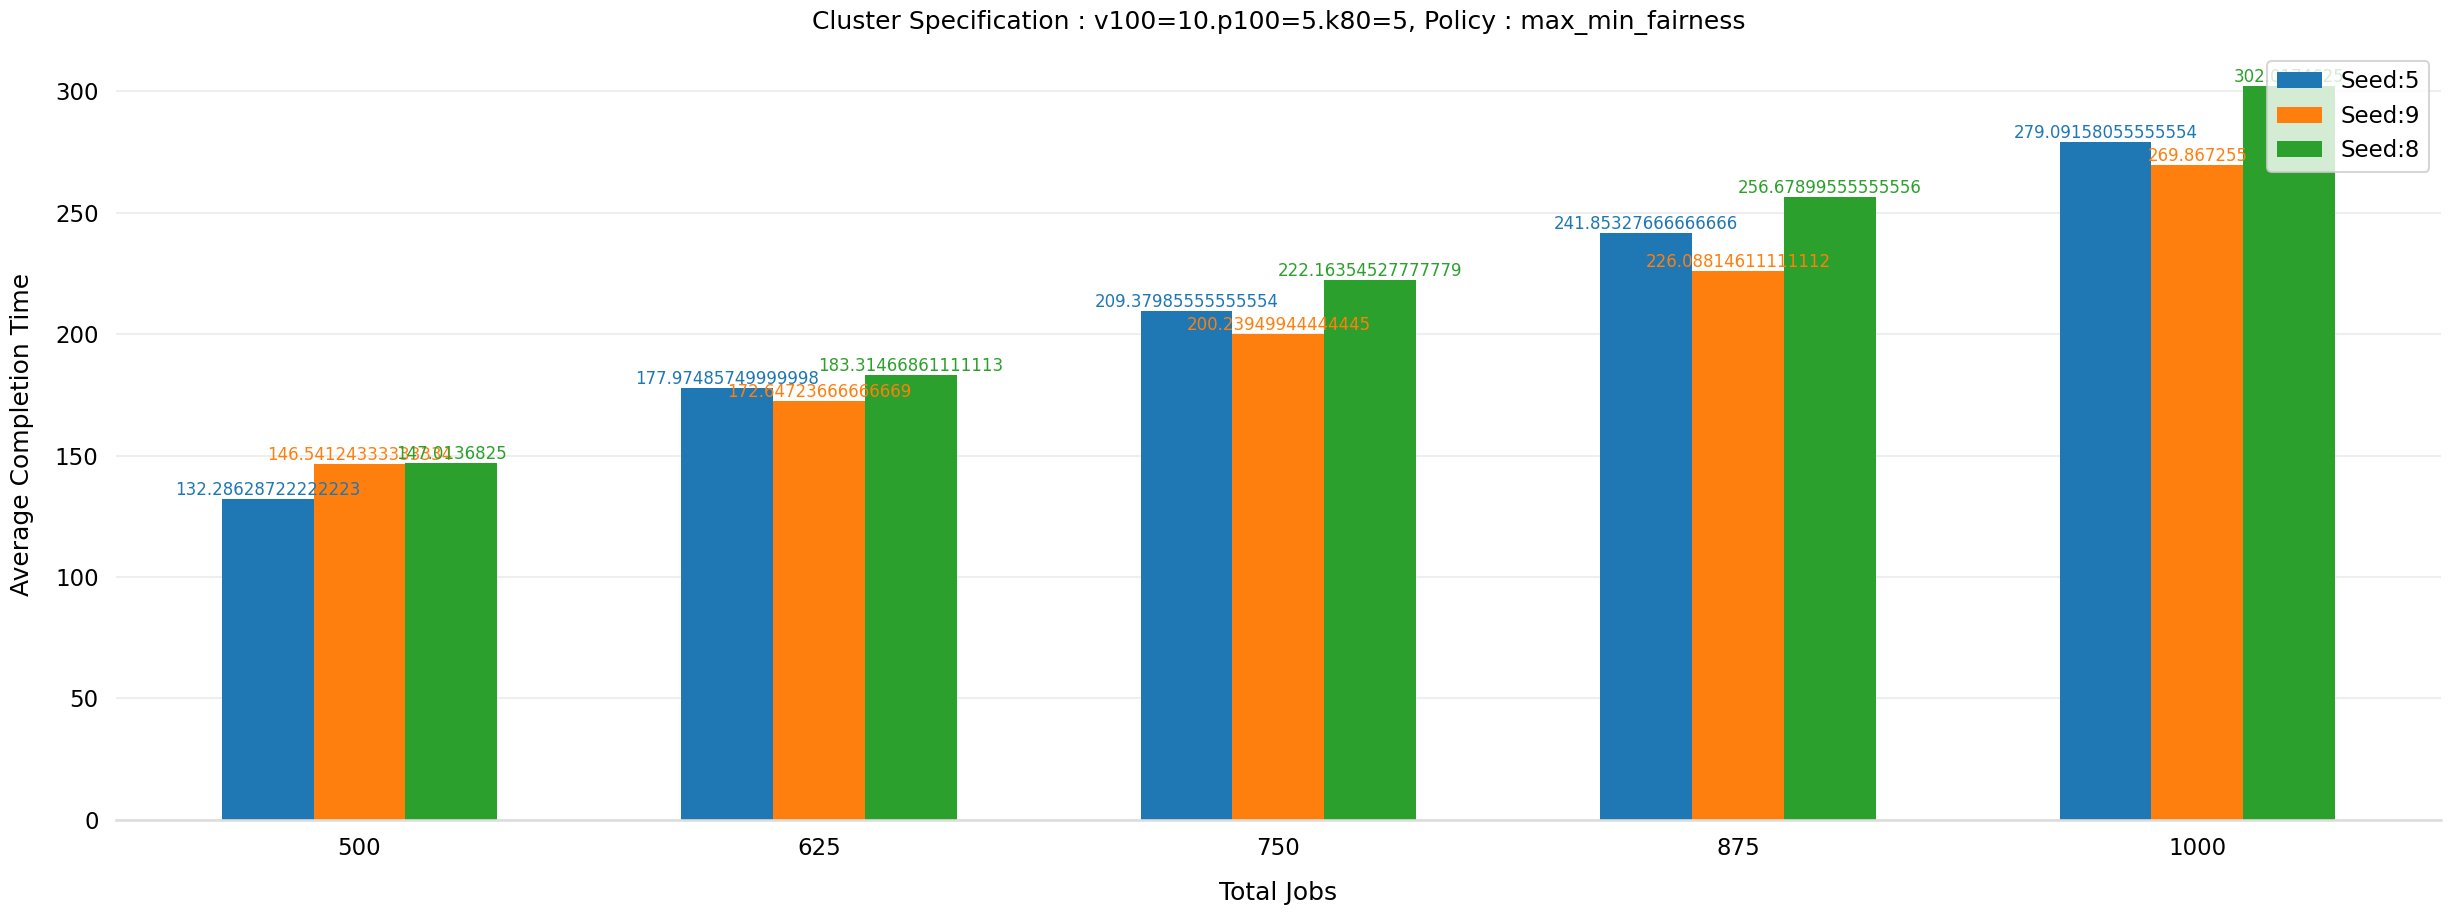

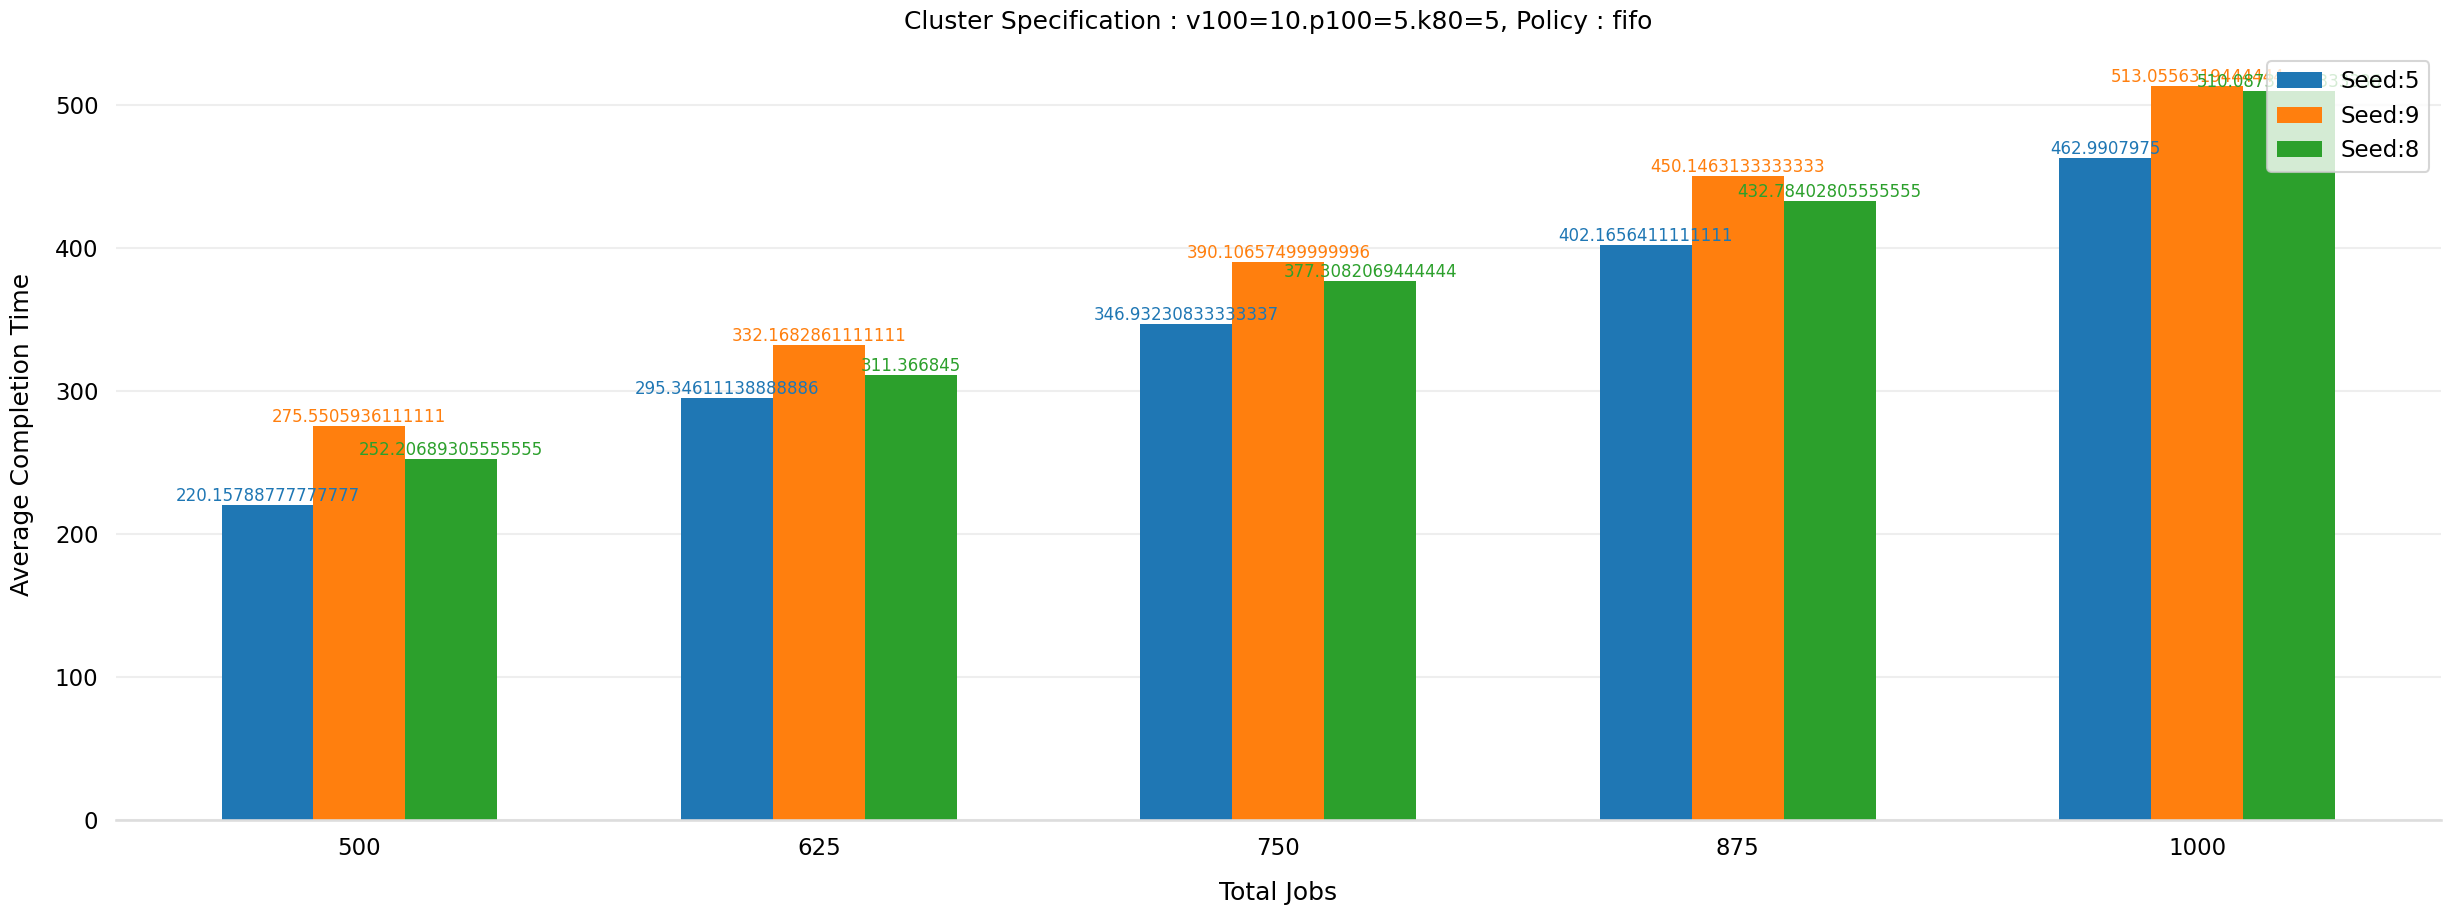

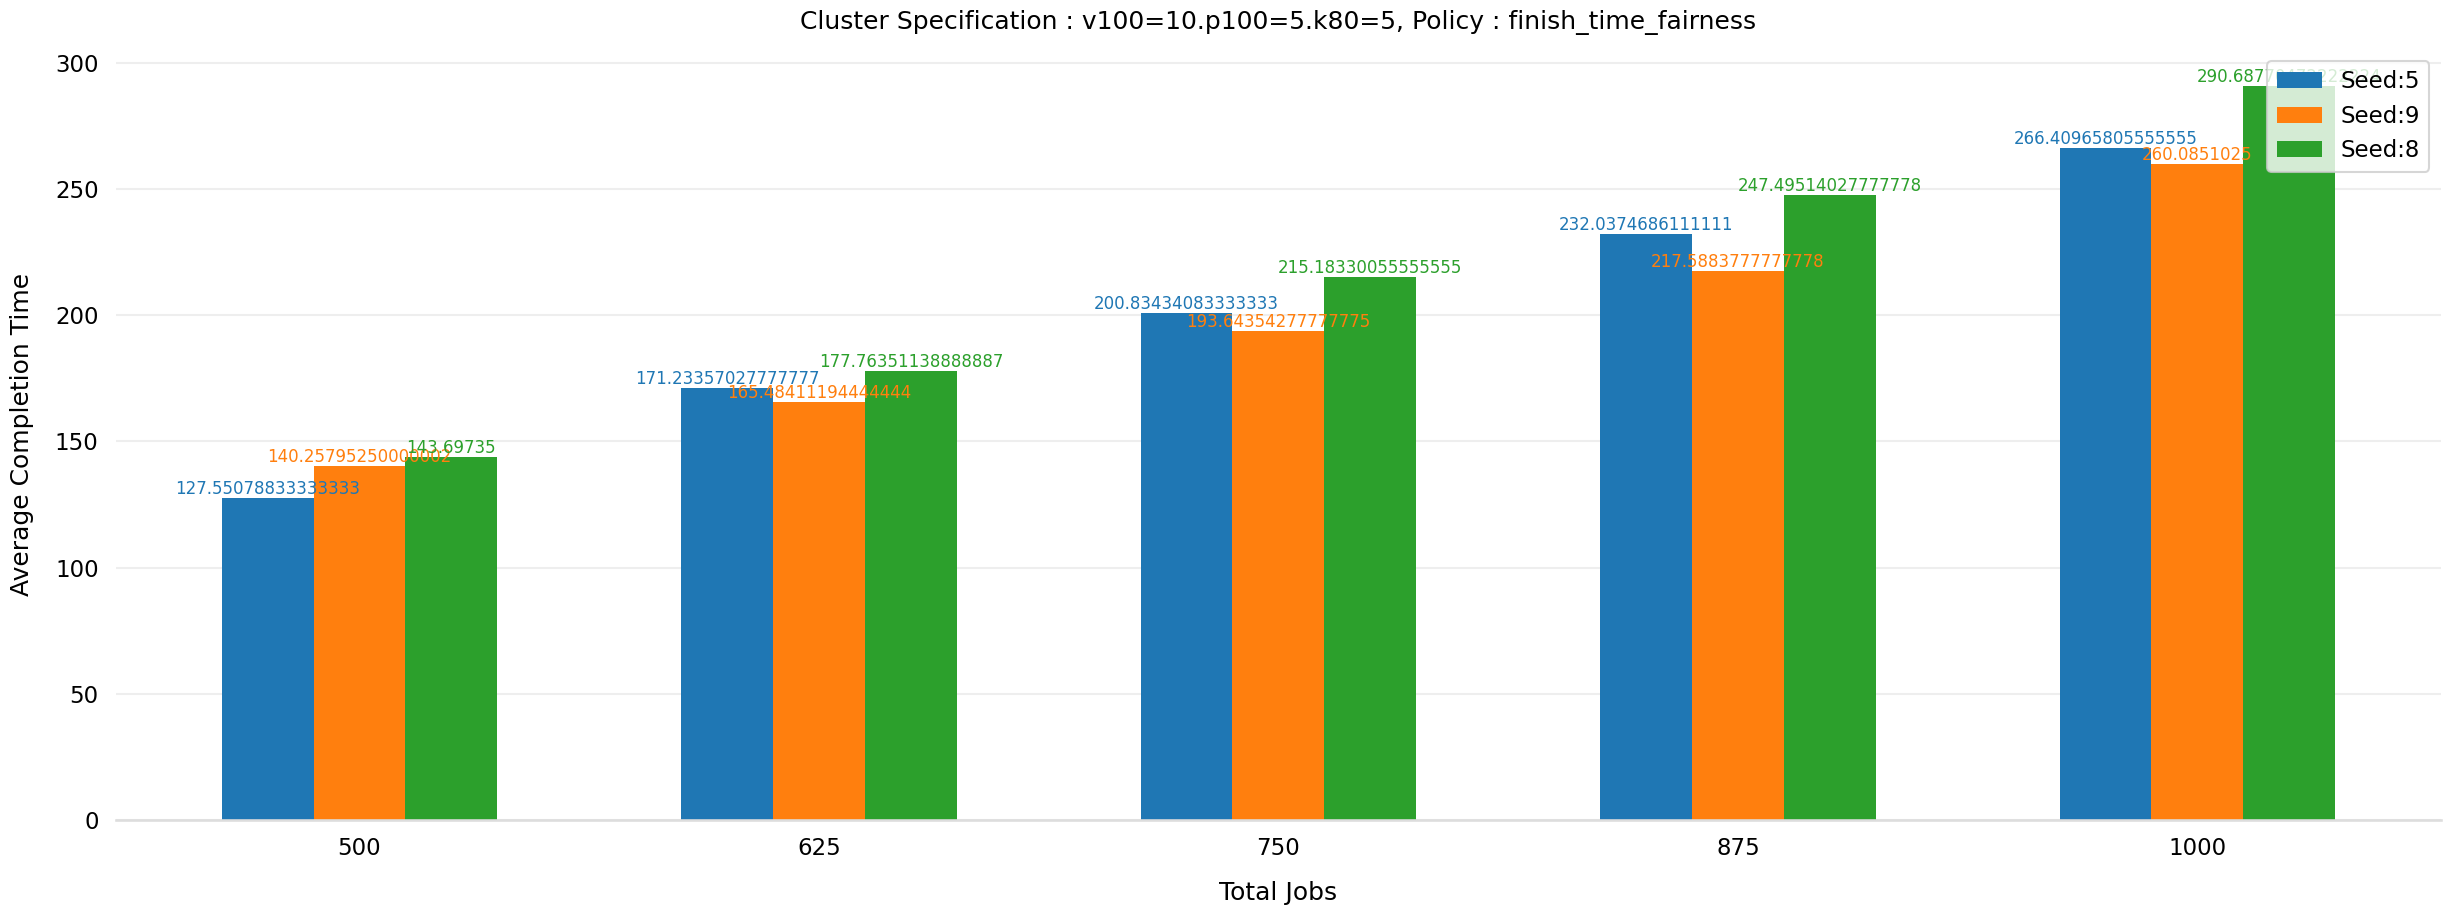

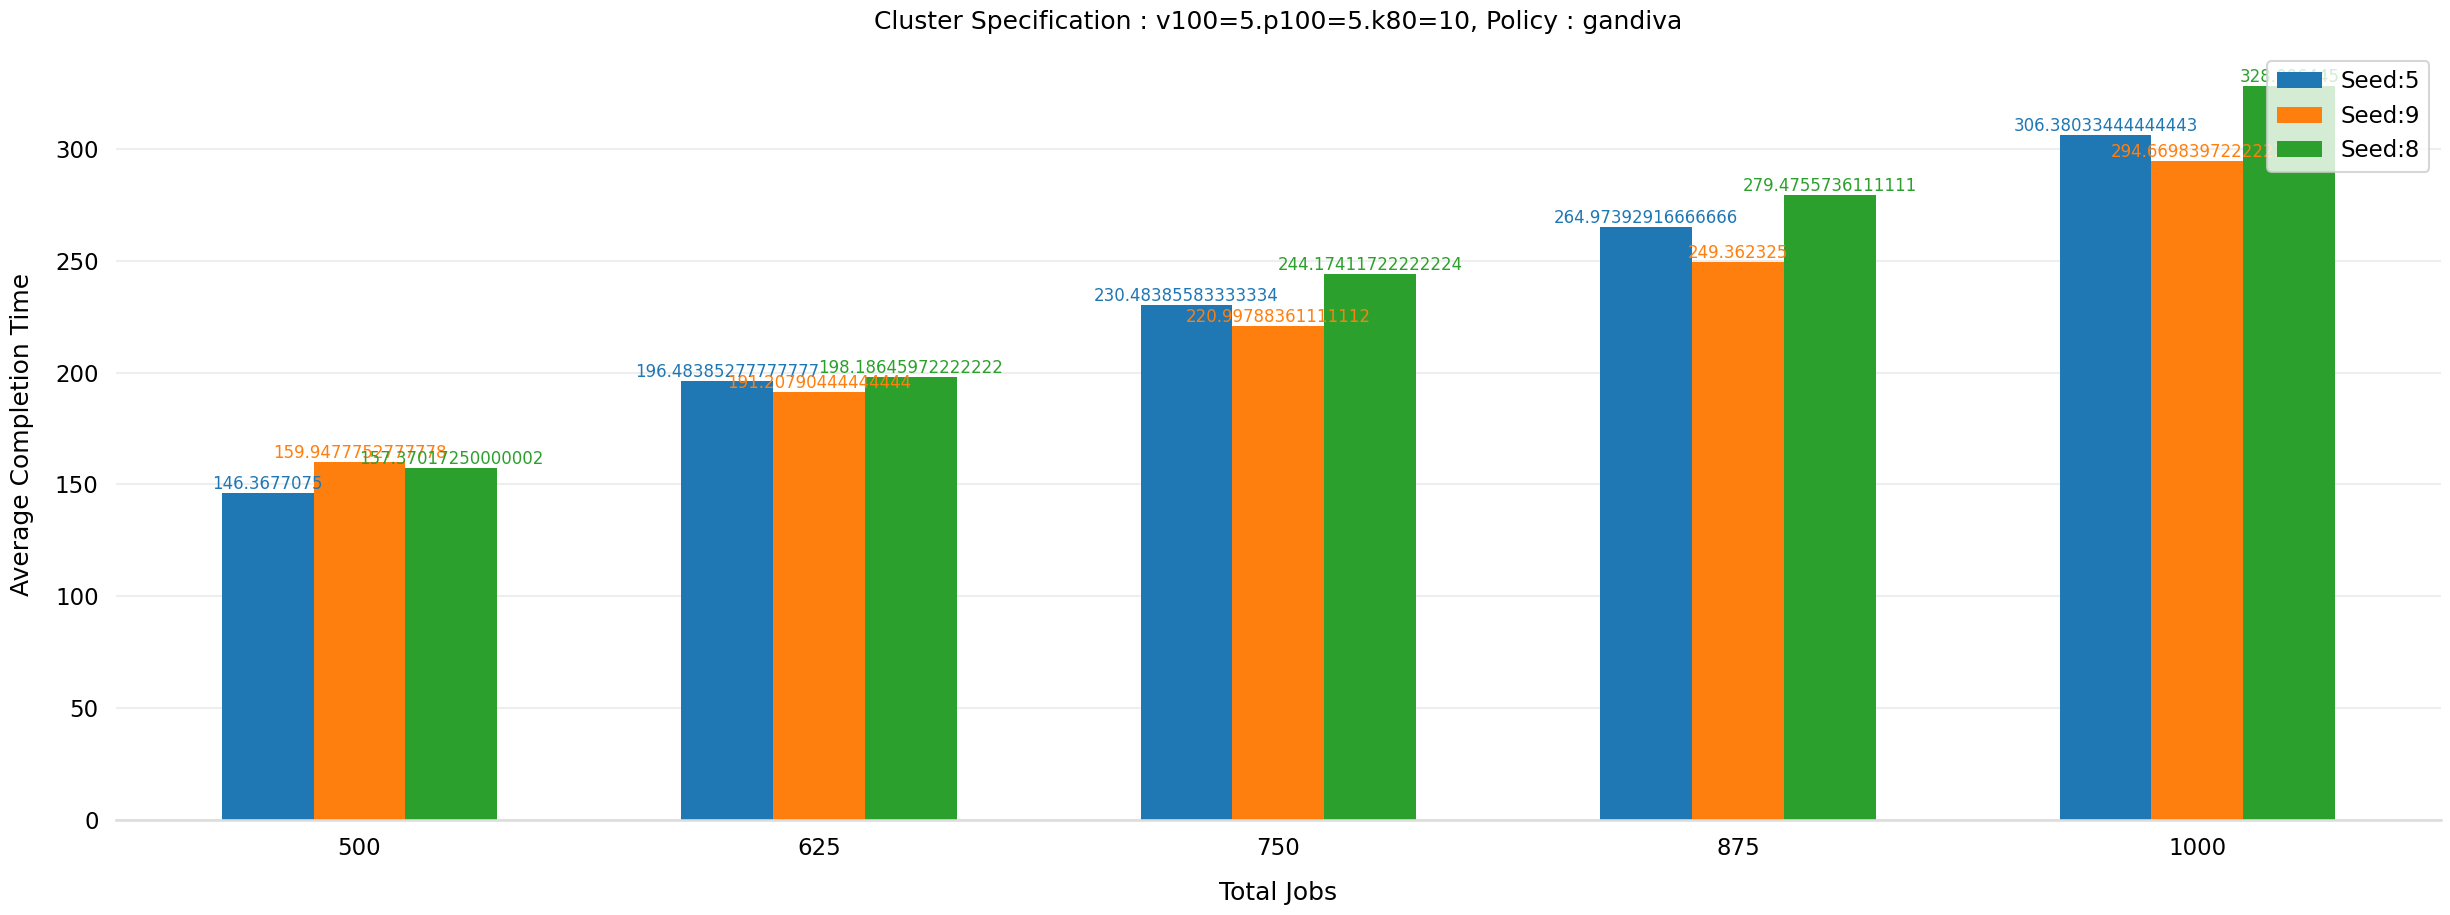

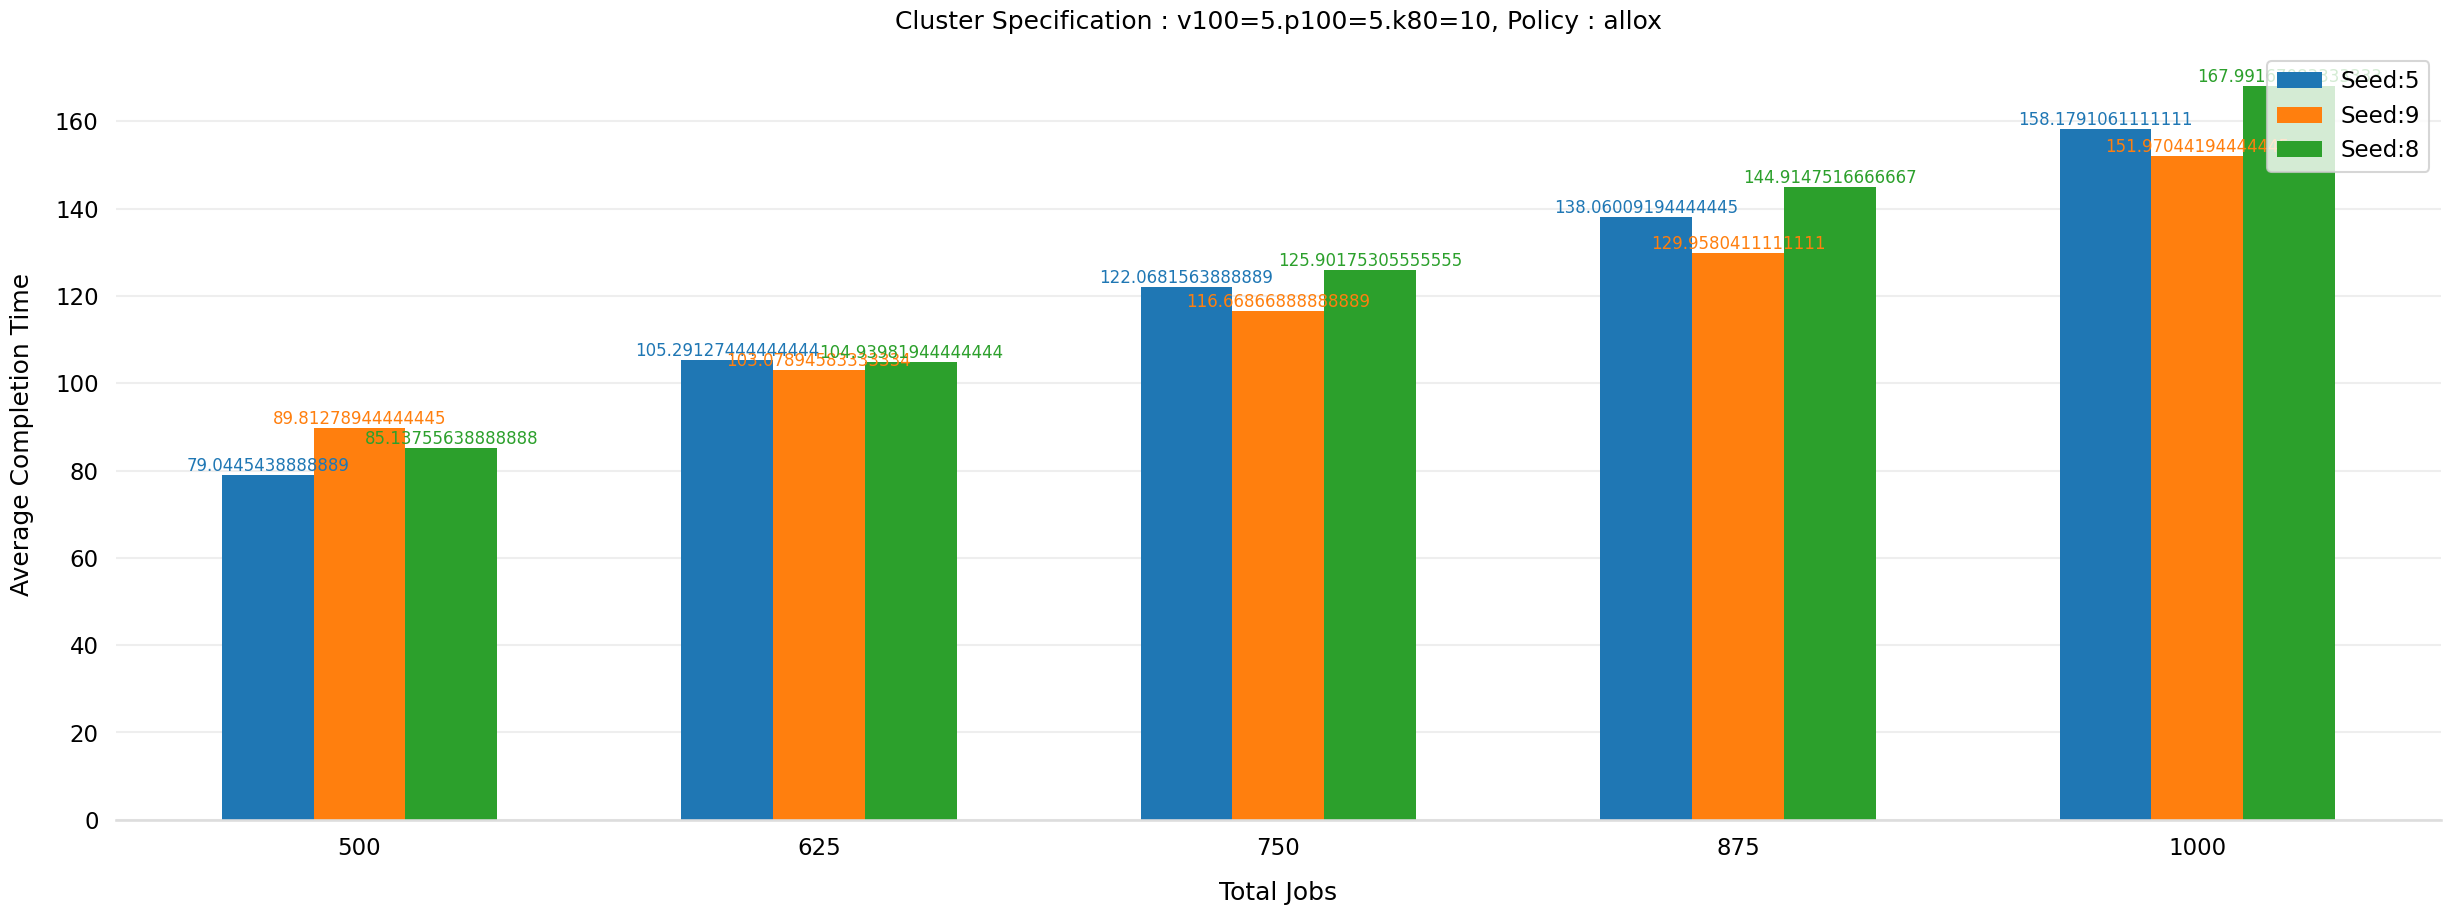

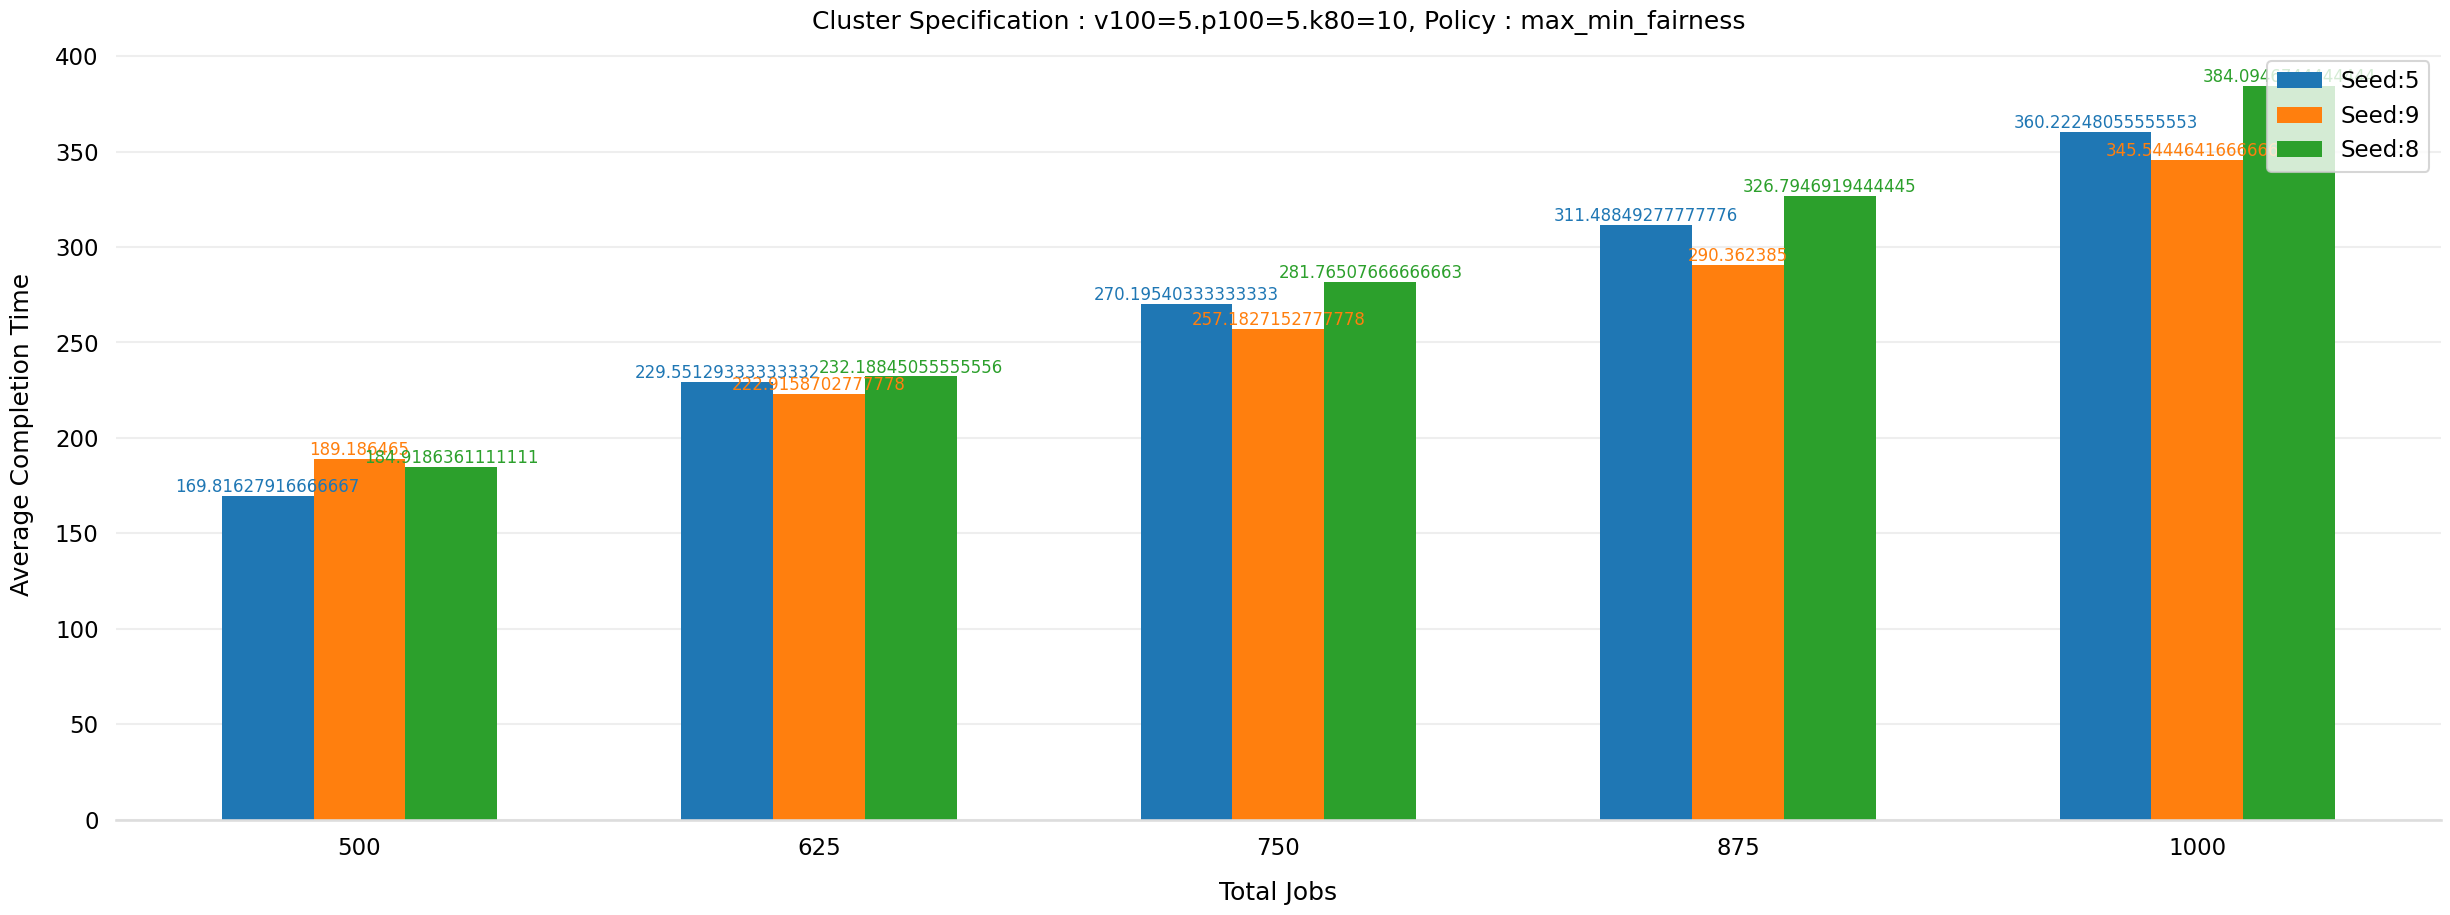

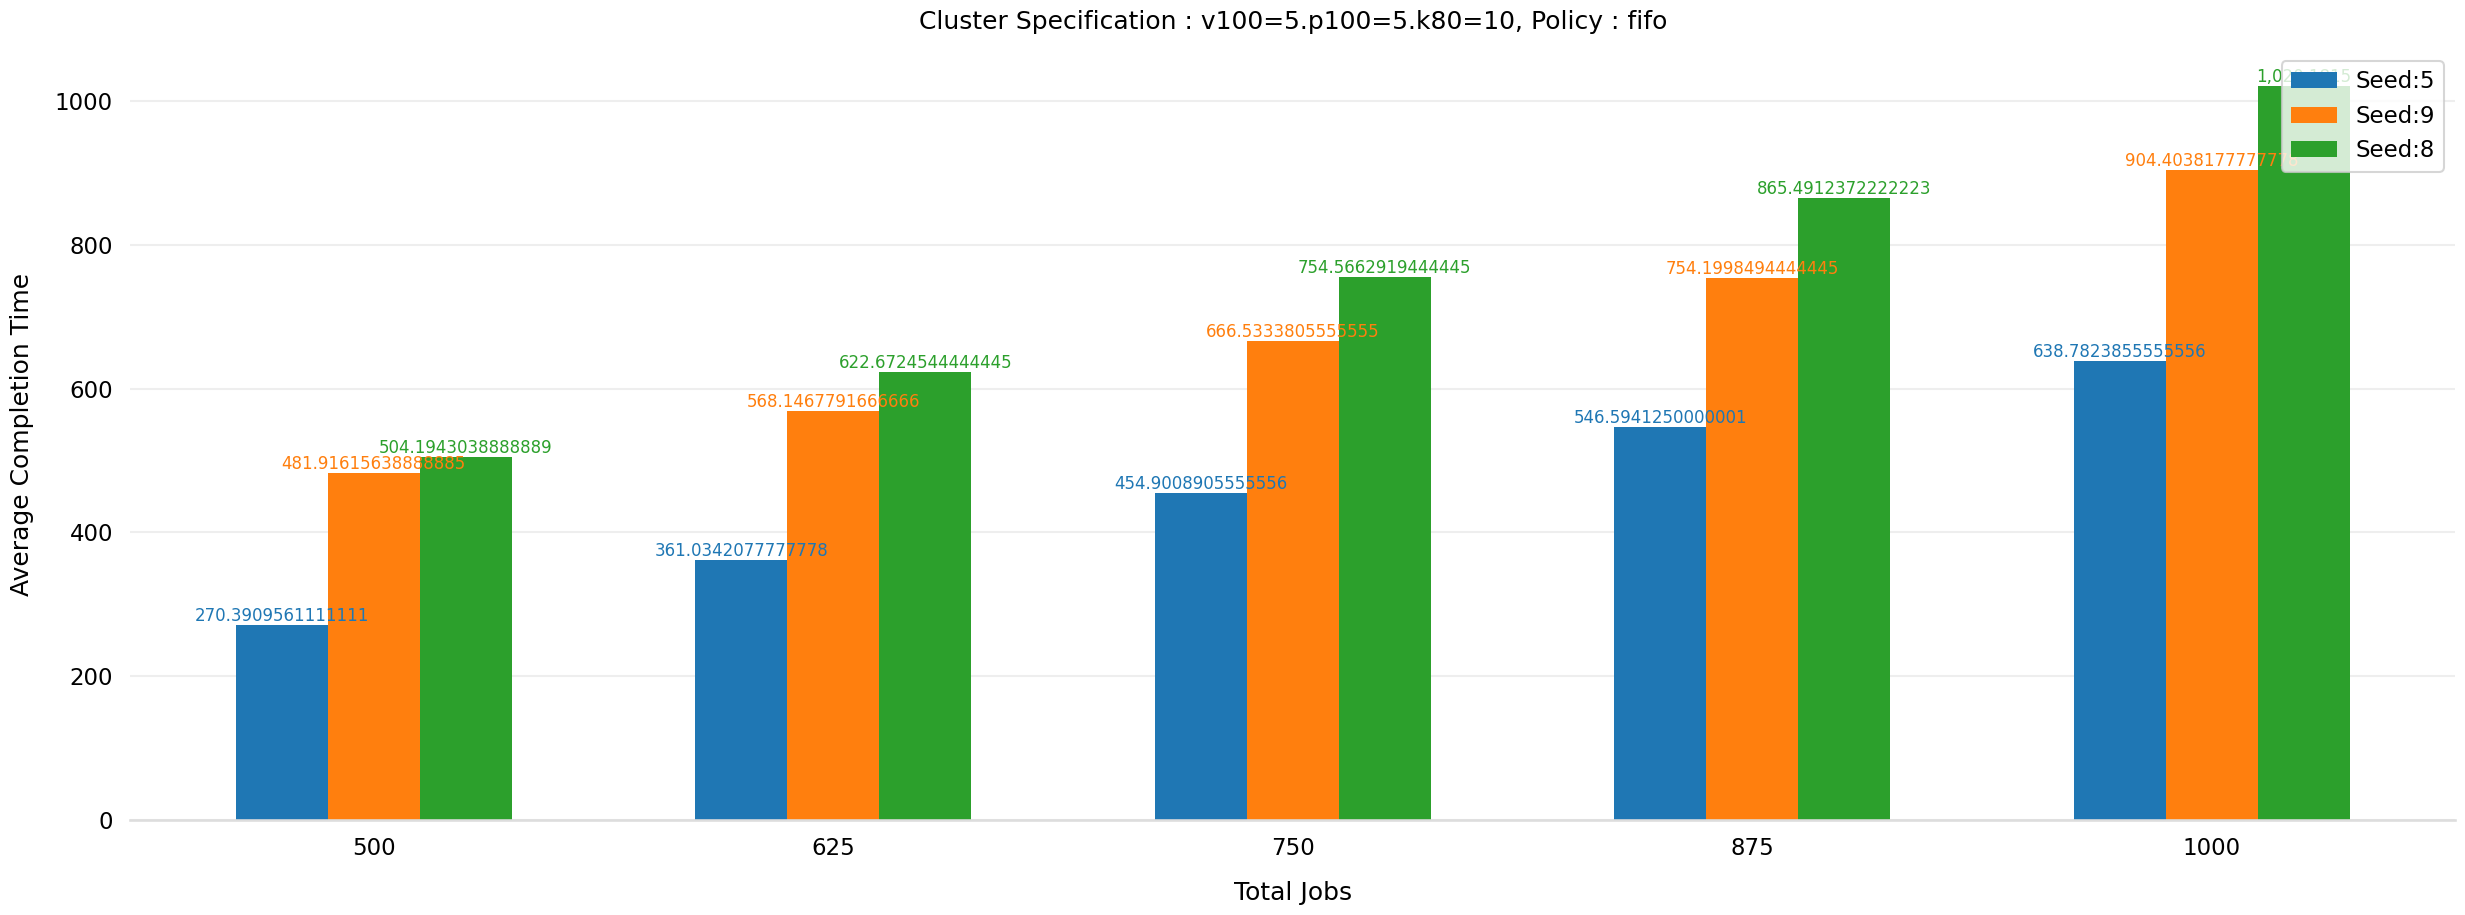

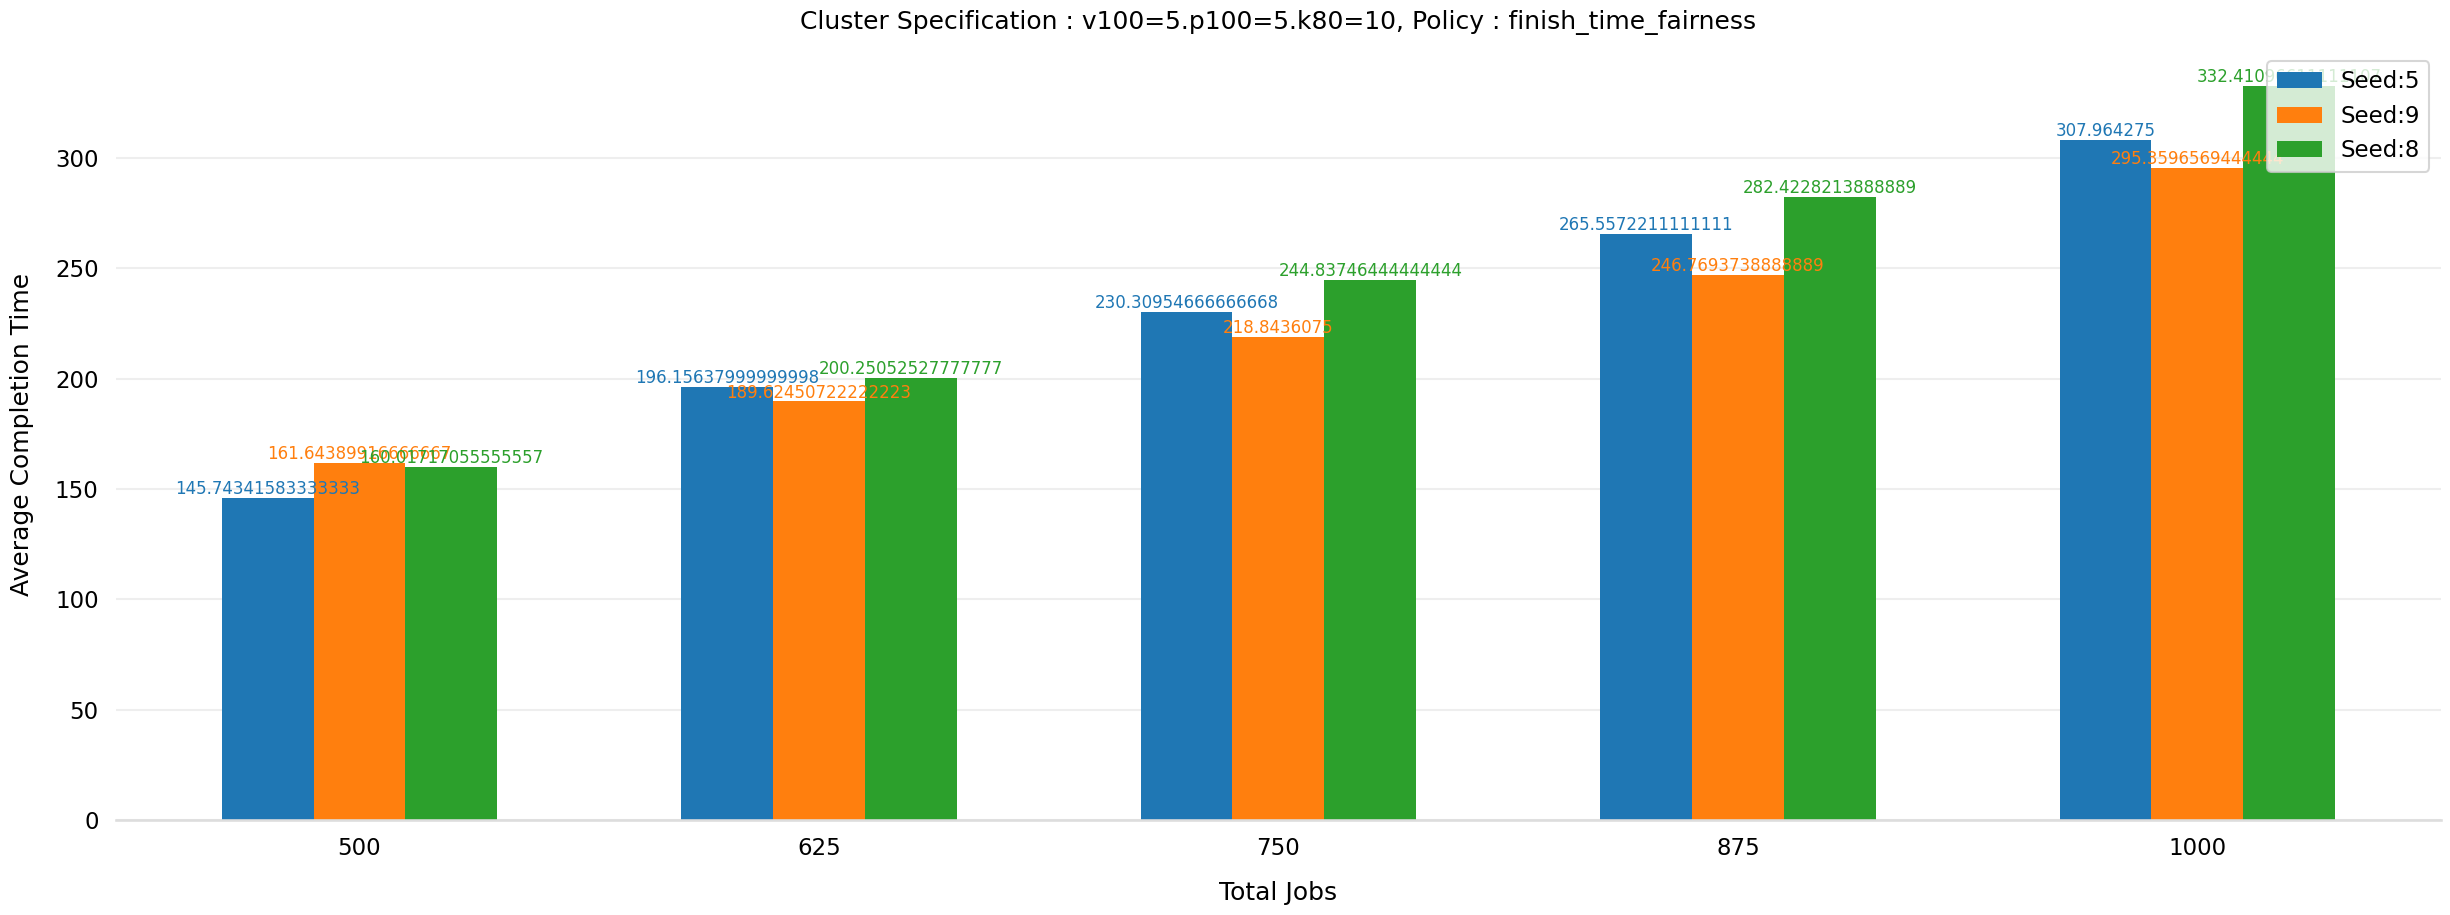

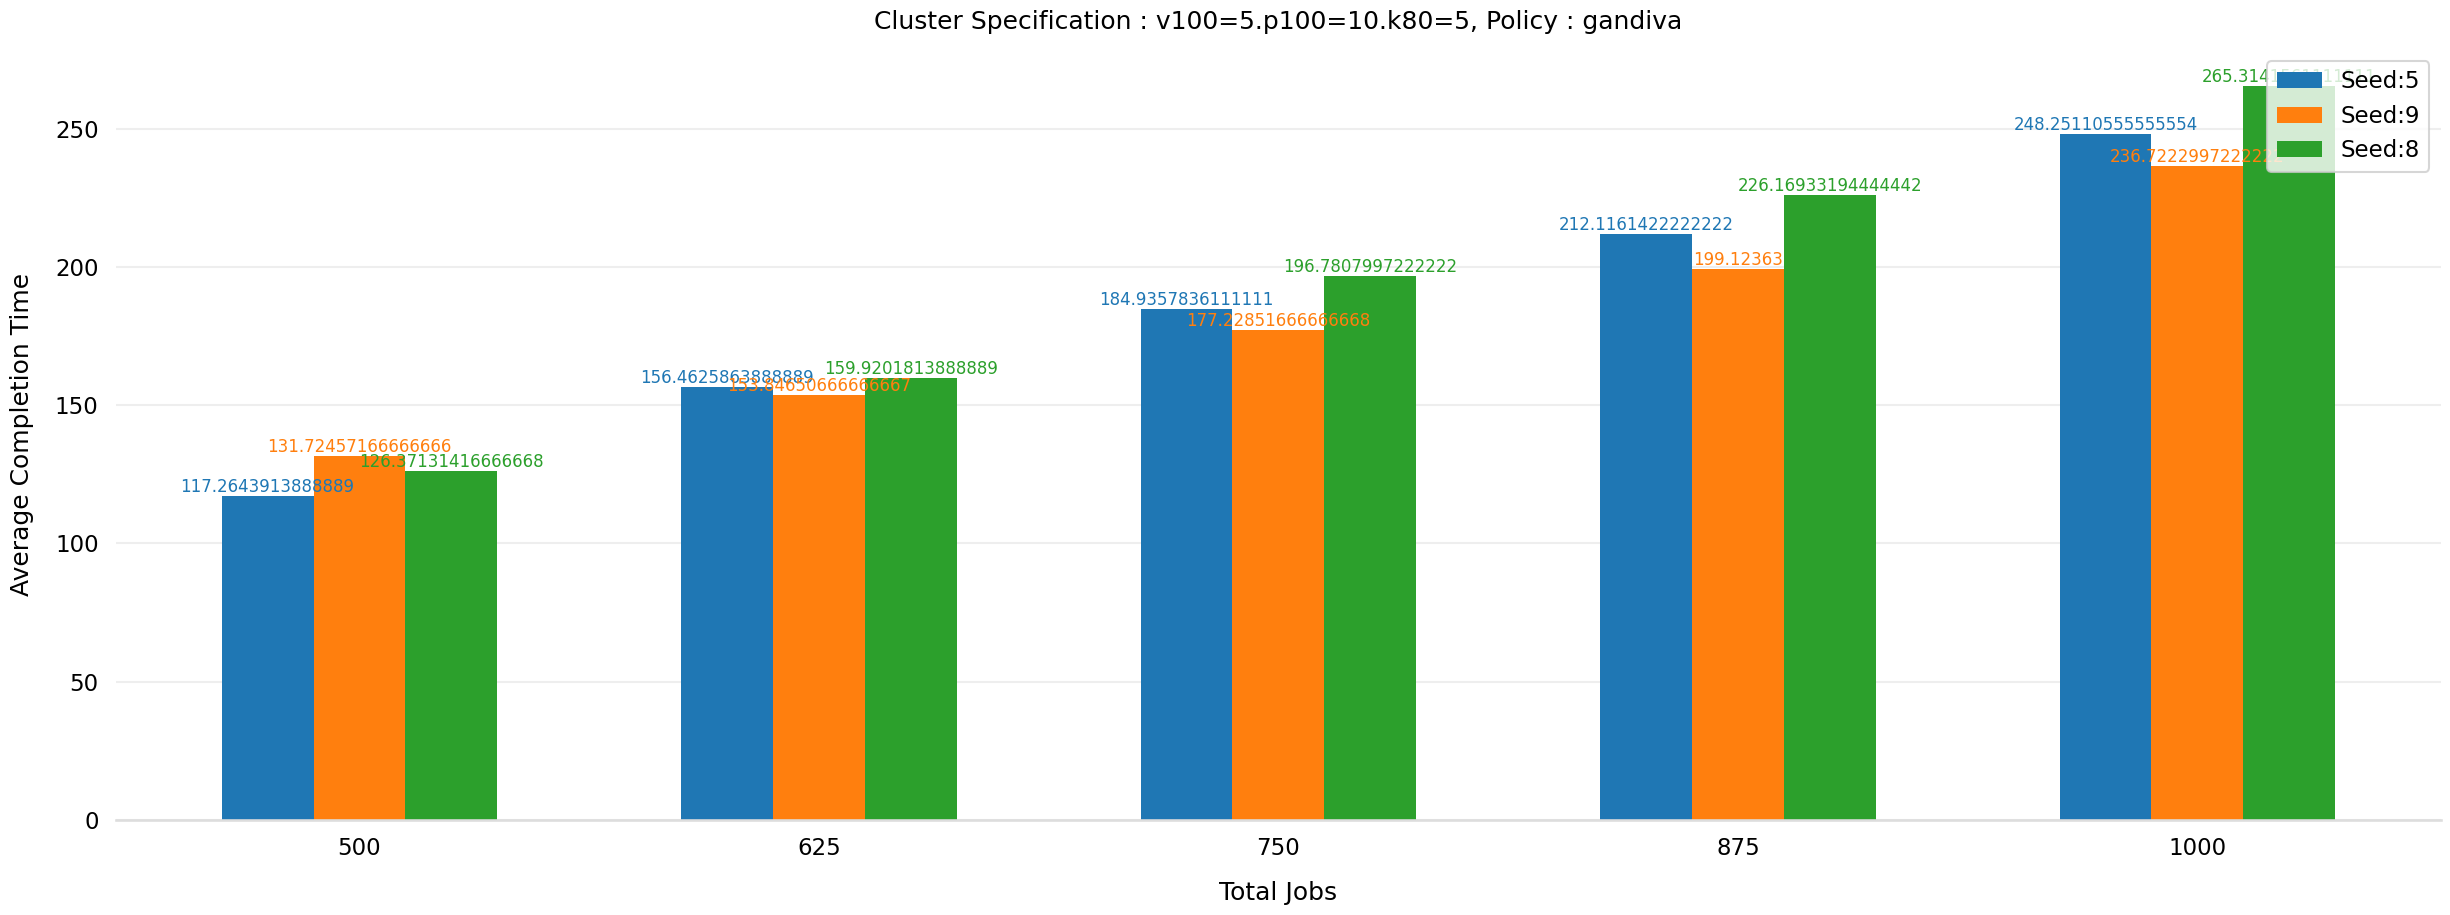

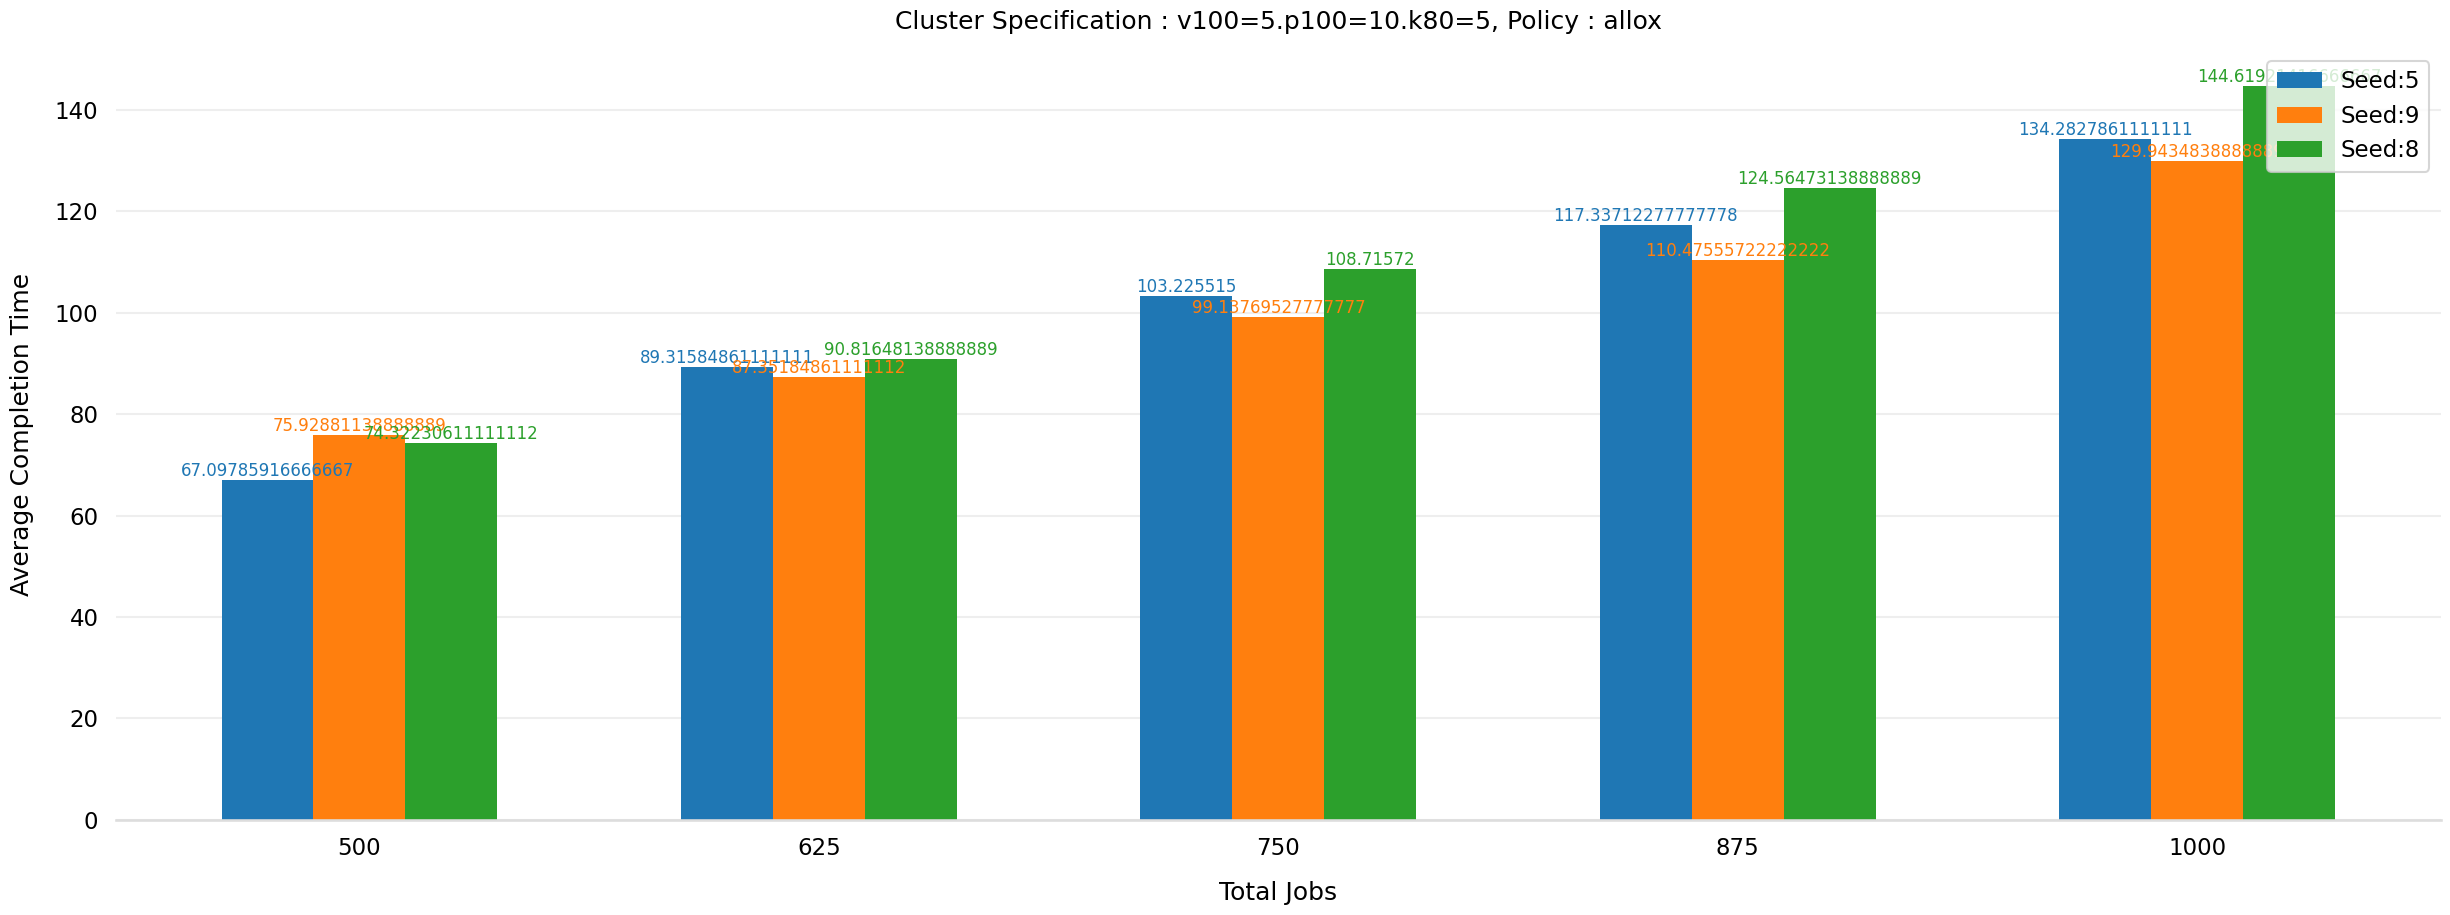

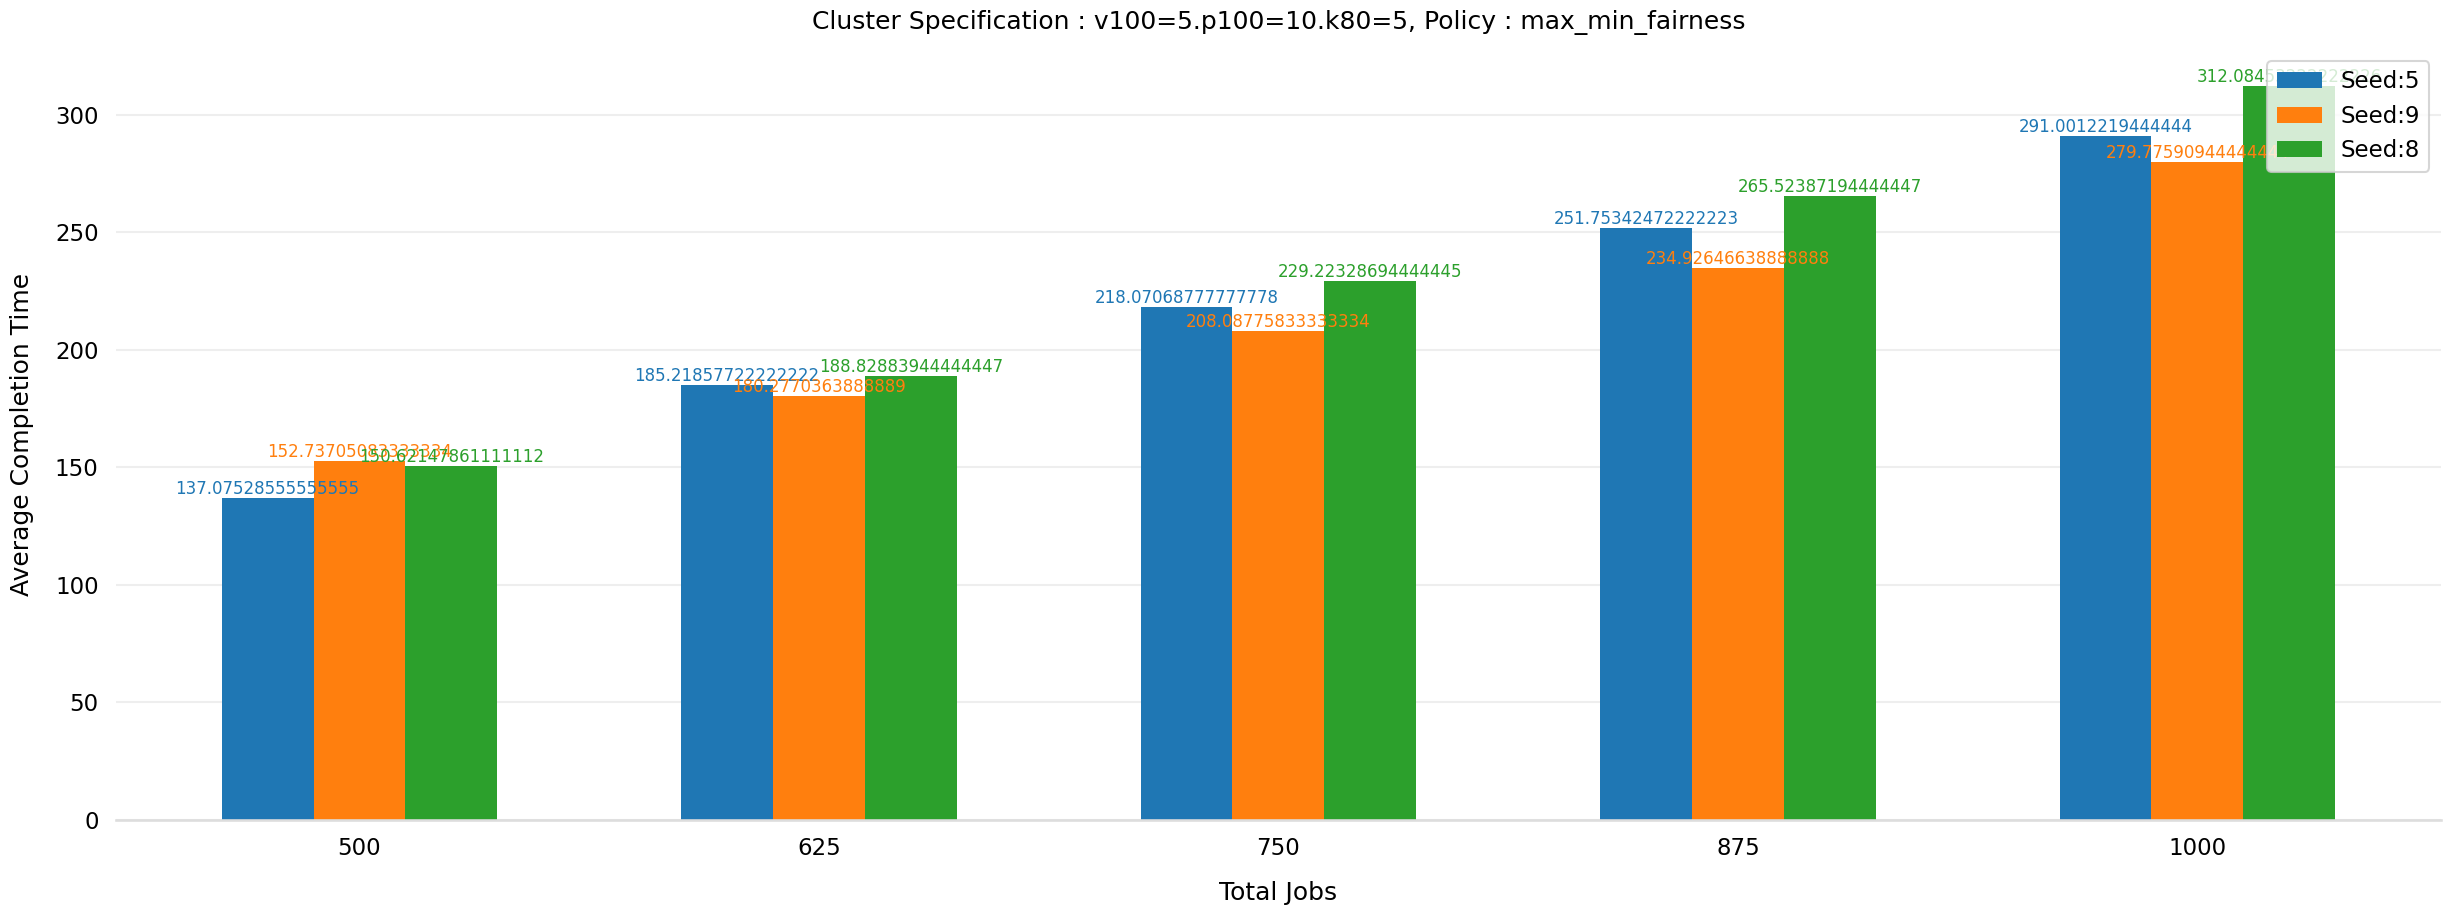

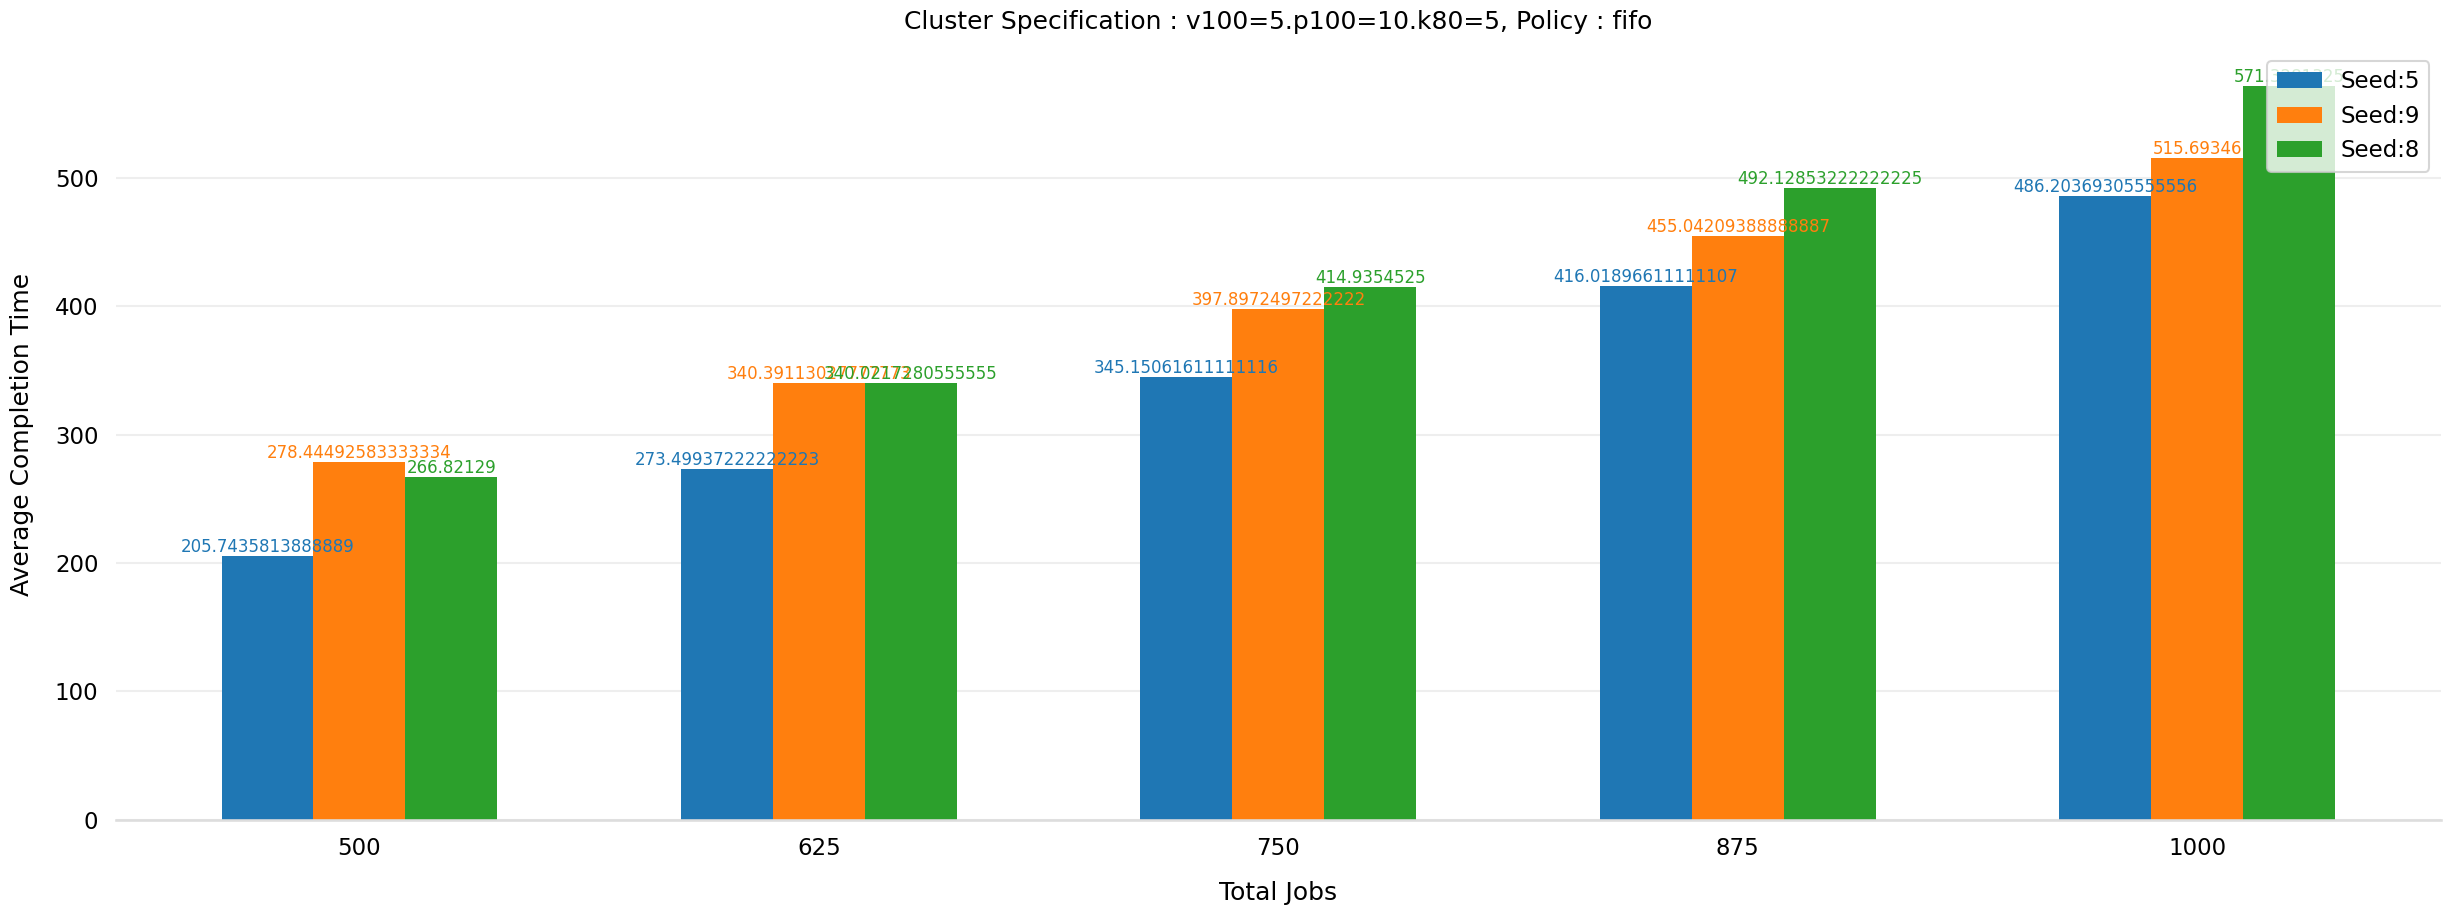

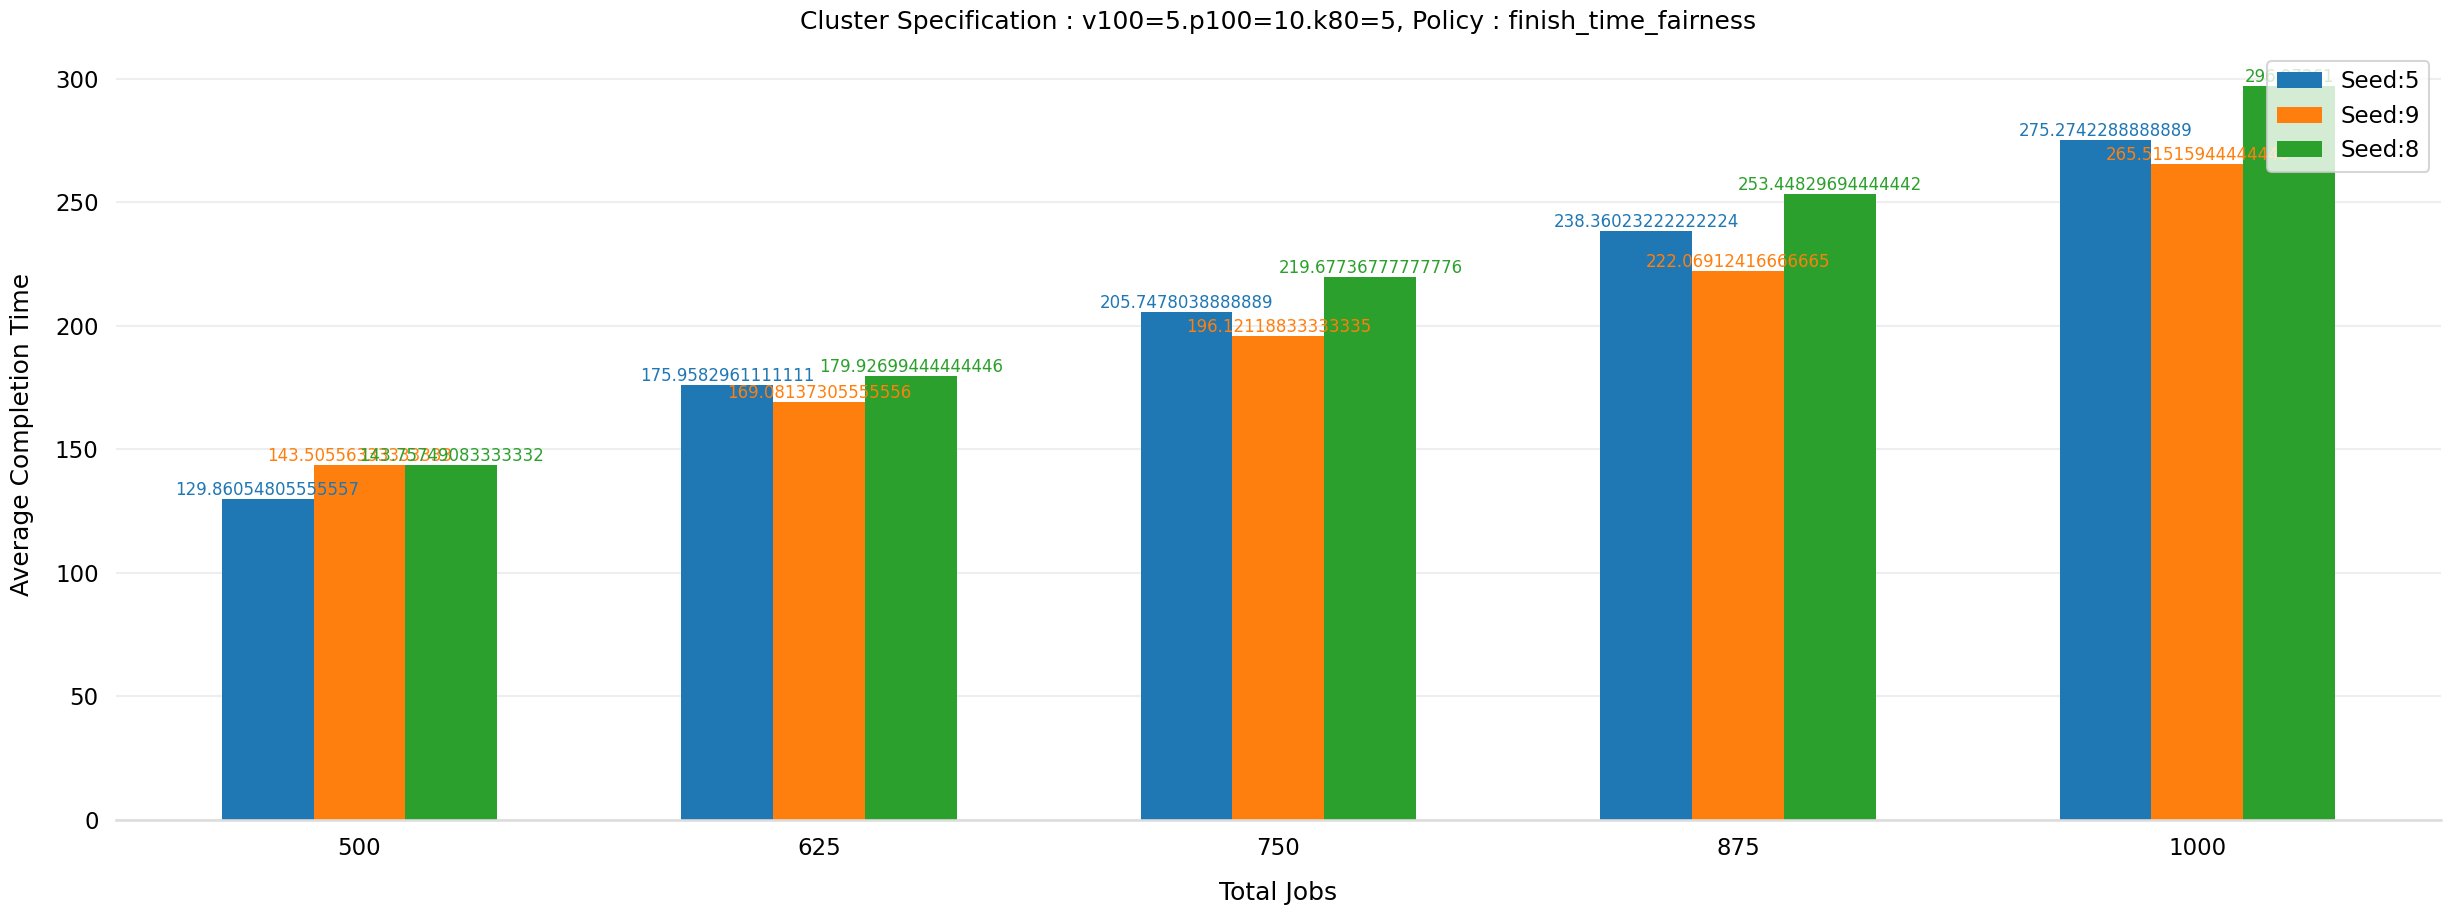

In [7]:
for cluster_spec in df_static["cluster_spec"].unique():
    for policy in df_static["policy"].unique():
        result_int = df_static.query(f'cluster_spec == "{cluster_spec}" & policy == "{policy}"')
        
        no_graphs = len(result_int["seed"].unique())
        
        fig, ax = plt.subplots(figsize=(30,10))
        bar_width = 0.2
        
        for idx, seed in enumerate(result_int["seed"].unique()):
            result = result_int.query(f'seed == {seed}')
            result = result.sort_values("total_jobs")            

            x = np.arange(len(result["total_jobs"].unique()))
            y = [(float(r.strip().split(" ")[0])/3600.0) for r in result["average_completion_time"]]

            ax.bar(x + (bar_width * idx), y, width=bar_width,label=f'Seed:{seed}')
            ax.set_xticks(x + (no_graphs - 1) * (bar_width / 2))
            ax.set_xticklabels(result["total_jobs"].unique())

        ax.legend(loc ="upper right")

        ax.set_xlabel('Total Jobs', labelpad=15)
        ax.set_ylabel('Average Completion Time', labelpad=15)
        ax.set_title(f'Cluster Specification : {cluster_spec}, Policy : {policy}', pad=15)
        
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['bottom'].set_color('#DDDDDD')
        ax.tick_params(bottom=False, left=False)
        ax.set_axisbelow(True)
        
        ax.yaxis.grid(True, color='#EEEEEE')
        ax.xaxis.grid(False)

        # For each bar in the chart, add a text label.
        for bar in ax.patches:
        # The text annotation for each bar should be its height.
            bar_value = bar.get_height()
            # Format the text with commas to separate thousands. You can do
            # any type of formatting here though.
            text = f'{bar_value:,}'
            # This will give the middle of each bar on the x-axis.
            text_x = bar.get_x() + bar.get_width() / 2
            # get_y() is where the bar starts so we add the height to it.
            text_y = bar.get_y() + bar_value
            # If we want the text to be the same color as the bar, we can
            # get the color like so:
            bar_color = bar.get_facecolor()
            # If you want a consistent color, you can just set it as a constant, e.g. #222222
            ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,
                    size=12)

In [10]:
df_static.columns

# for cluster_spec in df_static["cluster_spec"]:
#     print(cluster_spec)

Index(['cluster_spec', '#v100', '#p100', '#k80', 'policy', 'seed',
       'total_jobs', 'utilization', 'average_completion_time',
       'total_completion_time',
       ...
       'Job990', 'Job991', 'Job992', 'Job993', 'Job994', 'Job995', 'Job996',
       'Job997', 'Job998', 'Job999'],
      dtype='object', length=1010)

In [12]:
for cluster_spec in df_static["cluster_spec"]:
    for seed in df_static["seed"].unique():
        for num_jobs in df_static["total_jobs"]:
            result = df_static.query(f'cluster_spec == "{cluster_spec}" & seed == {seed} & total_jobs == {num_jobs}')
            print(result)

            cluster_spec  #v100  #p100  #k80                policy  seed  \
0   v100=10.p100=5.k80=5     10      5     5               gandiva     5   
15  v100=10.p100=5.k80=5     10      5     5                 allox     5   
30  v100=10.p100=5.k80=5     10      5     5      max_min_fairness     5   
45  v100=10.p100=5.k80=5     10      5     5                  fifo     5   
60  v100=10.p100=5.k80=5     10      5     5  finish_time_fairness     5   

    total_jobs  utilization              average_completion_time  \
0         1000        0.911    827094.172 seconds (229.75 hours)   
15        1000        0.884    452189.882 seconds (125.61 hours)   
30        1000        0.950   1004729.690 seconds (279.09 hours)   
45        1000        0.493   1666766.871 seconds (462.99 hours)   
60        1000        0.941    959074.769 seconds (266.41 hours)   

                   total_completion_time  ...       Job990      Job991  \
0     3153379.537 seconds (875.94 hours)  ...  2717949.218  